# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

We should build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

__The company wants to know:__
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

__Business Goal__ 

We should model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Understading the data

In [2]:
# Importing the data 

housing_data_1 = pd.read_csv(r"C:\Users\dell\Desktop\train.csv")
housing_data_1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# Basic sanity checks

housing_data_1.shape

(1460, 81)

In [4]:
# Checking the correctness of the datatypes

housing_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

__All the datatypes are correctly matched. But the following numerical variables are better considered as categorical variables as they have very few distinct values:__
- **MSSubClass**
- **BsmtFullBath**
- **BsmtHalfBath**
- **FullBath**
- **HalfBath**
- **BedroomAbvGr**
- **KitchenAbvGr**
- **TotRmsAbvGrd**
- **Fireplaces**
- **GarageCars**

**Lets change them into categorical variables.**

In [5]:
# Converting from int type to object type to treat these continuous variables as categorical variables

housing_data_1['MSSubClass'] = housing_data_1['MSSubClass'].astype('object')

housing_data_1['BsmtFullBath'] = housing_data_1['BsmtFullBath'].astype('object')

housing_data_1['BsmtHalfBath'] = housing_data_1['BsmtHalfBath'].astype('object')

housing_data_1['FullBath'] = housing_data_1['FullBath'].astype('object')

housing_data_1['HalfBath'] = housing_data_1['HalfBath'].astype('object')

housing_data_1['BedroomAbvGr'] = housing_data_1['BedroomAbvGr'].astype('object')

housing_data_1['KitchenAbvGr'] = housing_data_1['KitchenAbvGr'].astype('object')

housing_data_1['TotRmsAbvGrd'] = housing_data_1['TotRmsAbvGrd'].astype('object')

housing_data_1['Fireplaces'] = housing_data_1['Fireplaces'].astype('object')

housing_data_1['GarageCars'] = housing_data_1['GarageCars'].astype('object')

housing_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

In [6]:
# Checking for duplicates in our data

housing_data_1[housing_data_1.duplicated(['Id'], keep = 'first')]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

**We find that there are no duplicates in our data.**

In [7]:
# Checking for the outliers in our data

housing_data_1.describe()

Id  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    70.049958   10516.828082     6.099315     5.575342   
std     421.610009    24.284752    9981.264932     1.382997     1.112799   
min       1.000000    21.000000    1300.000000     1.000000     1.000000   
25%     365.750000    59.000000    7553.500000     5.000000     5.000000   
50%     730.500000    69.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    80.000000   11601.500000     7.000000     6.000000   
max    1460.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  GarageYrBlt   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000   
mean   1515.463699  1978.506164   472.980137    94.244521    46.660274   
std     525.480383    24.689725   213.804841   125.338794    66.256028   
min     334.000000  1900.000000     0.000000     0.000000     0.000000   
25%    1129.500000  1961.000000   334.500000     0.000000     0.000000   
50%    1464.000000  1980.000000   480.000000     0.000000    25.000000   
75%    1776.750000  2002.000000   576.000000   168.000000    68.000000   
max    5642.000000  2010.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

            MoSold       YrSold      SalePrice  
count  1460.000000  1460.000000    1460.000000  
mean      6.321918  2007.815753  180921.195890  
std       2.703626     1.328095   79442.502883  
min       1.000000  2006.000000   34900.000000  
25%       5.000000  2007.000000  129975.000000  
50%       6.000000  2008.000000  163000.000000  
75%       8.000000  2009.000000  214000.000000  
max      12.000000  2010.000000  755000.000000

**We do find many outliers but, I am not performing outlier analysis for our dataset because, a house worth higher price will be beneficial for the company to make profits. If we perform outlier treatment, we may loose this data and our model may not understand the pattern in that lost data.**

# Identifying and Treating missing values

In [8]:
# .isnull() command by default gives the null values in columns
# .sum() sums up the missing values (column-wise)

housing_data_1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**Many of the categorical variables have a value called 'NaN' which needs to be handled because it is being represented as null value here. But it is another level in those categories which indicates that the house doesnot have that category. It is not a missing value but a meaningful missing. Hence, we need to replace it with some other value so that it remains as another level in that category.**

In [9]:
# List of categorical variables with meaningful missing values

cat_NANs = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
            'GarageFinish','GarageQual','GarageCond','PoolQC','Fence']

In [10]:
# Replacing all 'NaN' values in the above dataframe with 'Not Present'

housing_data_1[['Alley','BsmtQual','BsmtCond',
                'BsmtExposure','BsmtFinType1',
                'BsmtFinType2','FireplaceQu',
                'GarageType','GarageFinish',
                'GarageQual','GarageCond','PoolQC','Fence']] = housing_data_1[['Alley','BsmtQual','BsmtCond',
                                                                               'BsmtExposure','BsmtFinType1',
                                                                               'BsmtFinType2','FireplaceQu',
                                                                               'GarageType','GarageFinish',
                                                                               'GarageQual','GarageCond',
                                                                               'PoolQC','Fence']].fillna(value='Not Present')

housing_data_1.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street        Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  Not Present      Reg   
1   2         20       RL         80.0     9600   Pave  Not Present      Reg   
2   3         60       RL         68.0    11250   Pave  Not Present      IR1   
3   4         70       RL         60.0     9550   Pave  Not Present      IR1   
4   5         60       RL         84.0    14260   Pave  Not Present      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
0       1710            1            0        2        1            3   
1       1262            0            1        2        0            3   
2       1786            1            0        2        1            3   
3       1717            1            0        1        0            3   
4       2198            1            0        2        1            4   

  KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces  FireplaceQu  \
0            1          Gd            8        Typ          0  Not Present   
1            1          TA            6        Typ          1           TA   
2            1          Gd            6        Typ          1           TA   
3            1          Gd            7  

In [11]:
#  Checking the null values in our data again

housing_data_1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
# Checking the % missing values in each column
# Summing up the missing values in columns
# Total missing values in each column is divided by total number of rows 
# Total number of rows is obtained by length of the index column
# The obtained value is multiplied by 100 to get the percentage and rounded off up to 2 decimal points

round(100*(housing_data_1.isnull().sum()/len(housing_data_1.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

**We find some missing values in the following columns:**
- **LotFrontage - Numerical variable**
- **MasVnrType - Categorcal variable**
- **MasVnrArea - Numerical variable**
- **Electrical - Categorcal variable**
- **GarageYrBlt - Numerical variable**
- **MiscFeature - Categorcal variable**

**We can replace the missing in values in categorical variables with MODE. For missing values in numerical variables, we need to check for the presence of outliers and replace them accordingly with MEAN (if there are no outliers) and MEDIAN (if there are any outliers).**

In [13]:
# 'MiscFeature' column has 96% null values so its better we drop it

housing_data_1 = housing_data_1.drop('MiscFeature', axis=1)

In [14]:
# The column 'MiscVal' indicates the dollar value of miscellaneous feature
# As we have removed the 'MiscFeature' column, keeping 'MiscVal' column would be meaningless. Lets drop it too

housing_data_1 = housing_data_1.drop('MiscVal', axis=1)

In [15]:
# Imputing the Categorical Columns null values with Mode

housing_data_1['MasVnrType'].fillna(housing_data_1['MasVnrType'].mode()[0], inplace=True)

housing_data_1['Electrical'].fillna(housing_data_1['Electrical'].mode()[0], inplace=True)

round(100*(housing_data_1.isnull().sum()/len(housing_data_1.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
1stFlrSF   

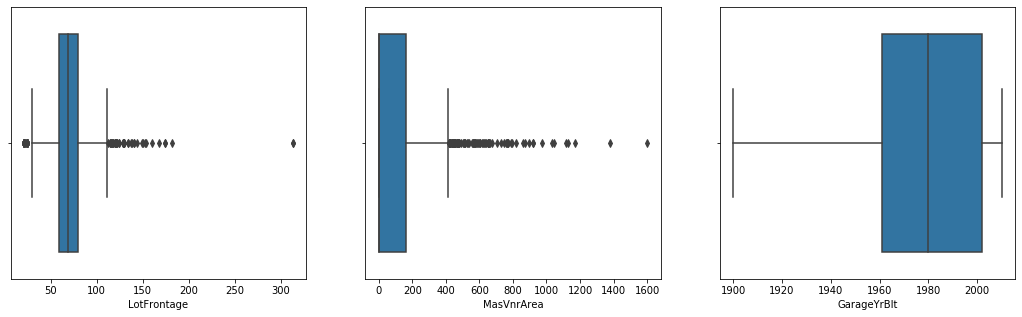

In [16]:
# Lets visualize the three numerical variables to check for the presence of outliers if any

columns = housing_data_1[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'LotFrontage', data = housing_data_1)

plt.subplot(1,3,2)
sns.boxplot(x = 'MasVnrArea', data = housing_data_1)

plt.subplot(1,3,3)
sns.boxplot(x = 'GarageYrBlt', data = housing_data_1)

**We do find outliers in our numerical variables as seen from the plot above. So lets replace the missing values with MEDIAN to prevent any biased results.**

In [17]:
# Imputing the numerical columns null values with Median

housing_data_1['LotFrontage'].fillna(housing_data_1['LotFrontage'].median(), inplace=True)

housing_data_1['MasVnrArea'].fillna(housing_data_1['MasVnrArea'].median(), inplace=True)

housing_data_1['GarageYrBlt'].fillna(housing_data_1['GarageYrBlt'].median(), inplace=True)

round(100*(housing_data_1.isnull().sum()/len(housing_data_1.index)),2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

**Our data looks clean now. Moving on to further analysis.**

In [18]:
housing_data_1.shape

(1460, 79)

**The following 4 columns have year in them:** 
- **YearBuilt**
- **YearRemodAdd**
- **GarageYrBlt**
- **YrSold**

**Using them as such will not be much useful for us. Instead, we can calculate the age by subtracting that value from the current year i.e. 2020. This also reduces the headache of creating dummies to the age columns as they will have a direct impact on the target variable.**

In [19]:
# Subtracting the year in 'YearBuilt' column from the current year to calculate age of the house
# Creating a new column 'House_Age' to store those values

housing_data_1['House_Age'] = [2020 - int(i) for i in housing_data_1['YearBuilt']]

In [20]:
# Subtracting the year in 'YearRemodAdd' column from the current year to calculate age of the remodelled house
# Creating a new column 'Remodelled_Age' to store those values

housing_data_1['Remodelled_Age'] = [2020 - int(i) for i in housing_data_1['YearRemodAdd']]

In [21]:
# Subtracting the year in 'GarageYrBlt' column from the current year to calculate age of the house garage
# Creating a new column 'Garage_Age' to store those values

housing_data_1['Garage_Age'] = [2020 - int(i) for i in housing_data_1['GarageYrBlt']]

In [22]:
# Subtracting the year in 'YrSold' column from the current year to calculate how many years back the house was sold
# Creating a new column 'Sold_Age' to store those values

housing_data_1['Sold_Age'] = [2020 - int(i) for i in housing_data_1['YrSold']]

In [23]:
# We can remove the original 4 columns now as we have created new ones

housing_data_1 = housing_data_1.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 1)
housing_data_1.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street        Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  Not Present      Reg   
1   2         20       RL         80.0     9600   Pave  Not Present      Reg   
2   3         60       RL         68.0    11250   Pave  Not Present      IR1   
3   4         70       RL         60.0     9550   Pave  Not Present      IR1   
4   5         60       RL         84.0    14260   Pave  Not Present      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

  BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr  \
0            1            0        2        1            3            1   
1            0            1        2        0            3            1   
2            1            0        2        1            3            1   
3            1            0        1        0            3            1   
4            1            0        2        1            4            1   

  KitchenQual TotRmsAbvGrd Functional Fireplaces  FireplaceQu GarageType  \
0          Gd            8        Typ          0  Not Present     Attchd   
1          TA            6        Typ          1           TA     Attchd   
2          Gd            6        Typ          1           TA     Attchd   
3          Gd            7        Typ          1           Gd     Detchd   
4          Gd            9        Typ        

In [24]:
housing_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
Id                1460 non-null int64
MSSubClass        1460 non-null object
MSZoning          1460 non-null object
LotFrontage       1460 non-null float64
LotArea           1460 non-null int64
Street            1460 non-null object
Alley             1460 non-null object
LotShape          1460 non-null object
LandContour       1460 non-null object
Utilities         1460 non-null object
LotConfig         1460 non-null object
LandSlope         1460 non-null object
Neighborhood      1460 non-null object
Condition1        1460 non-null object
Condition2        1460 non-null object
BldgType          1460 non-null object
HouseStyle        1460 non-null object
OverallQual       1460 non-null int64
OverallCond       1460 non-null int64
RoofStyle         1460 non-null object
RoofMatl          1460 non-null object
Exterior1st       1460 non-null object
Exterior2nd       1460 non-null object

# Data exploration and visualization

**We find many levels in our categorical variables. Having them as such will generate lot of dummies for each category. Lets check the proportion of those and merge one or two levels which contribute very less into one level.**

**If the column has more than 95% data imbalance, I choose to drop it as it indicates high data imbalance.**

In [25]:
# Getting the list of categorical columns

cat_columns = housing_data_1.select_dtypes(include=['object'])
cat_columns.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [26]:
housing_data_1['MSZoning'] = housing_data_1['MSZoning'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['MSZoning'].value_counts()/len(housing_data_1.index)),2)

RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64

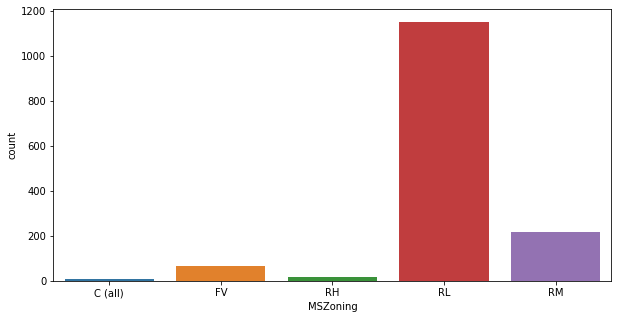

In [27]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['MSZoning'])

**The variable mentioned above 'MSZoning' has total 5 categories of which last three amount to less than 10%. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [28]:
housing_data_1['MSZoning'] = housing_data_1['MSZoning'].replace({'FV':'Other', 'RH':'Other', 'C (all)':'Other'})

round(100*(housing_data_1['MSZoning'].value_counts()/len(housing_data_1.index)),2)

RL       78.84
RM       14.93
Other     6.23
Name: MSZoning, dtype: float64

In [29]:
housing_data_1['Street'] = housing_data_1['Street'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Street'].value_counts()/len(housing_data_1.index)),2)

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64

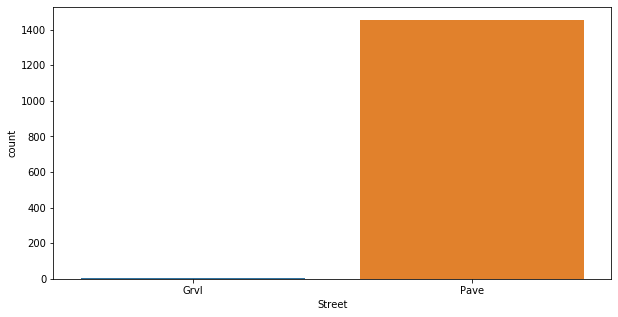

In [30]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Street'])

**The variable mentioned above 'Street' has 2 categories of which one amounts to 99%. It's better we drop this column as it has high data imbalance.**

In [31]:
housing_data_1['Alley'] = housing_data_1['Alley'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Alley'].value_counts()/len(housing_data_1.index)),2)

Not Present    93.77
Grvl            3.42
Pave            2.81
Name: Alley, dtype: float64

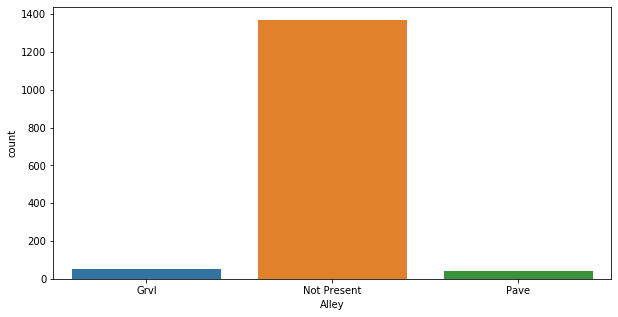

In [32]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Alley'])

**The variable mentioned above 'Alley' has total 3 categories of which last two contribute very less. Lets combine them as one category 'Grvl & Pave' as this will reduce the number of dummies.**

In [33]:
housing_data_1['Alley'] = housing_data_1['Alley'].replace({'Grvl':'Grvl & Pave', 'Pave':'Grvl & Pave'})

round(100*(housing_data_1['Alley'].value_counts()/len(housing_data_1.index)),2)

Not Present    93.77
Grvl & Pave     6.23
Name: Alley, dtype: float64

In [34]:
housing_data_1['LotShape'] = housing_data_1['LotShape'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['LotShape'].value_counts()/len(housing_data_1.index)),2)

Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64

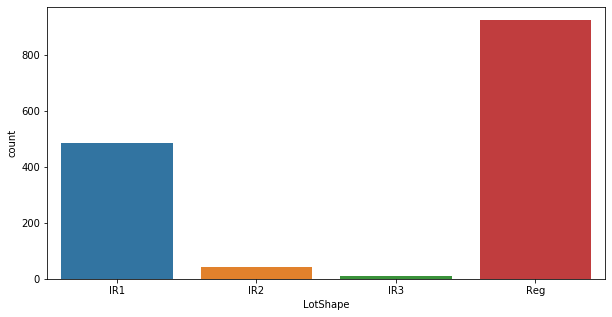

In [35]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['LotShape'])

**The variable mentioned above 'LotShape' has total 4 categories of which last two amount to less than 10%. Lets combine them as one category 'IR2 & IR3' as this will reduce the number of dummies.**

In [36]:
housing_data_1['LotShape'] = housing_data_1['LotShape'].replace({'IR2':'IR2 & IR3', 'IR3':'IR2 & IR3'})

round(100*(housing_data_1['LotShape'].value_counts()/len(housing_data_1.index)),2)

Reg          63.36
IR1          33.15
IR2 & IR3     3.49
Name: LotShape, dtype: float64

In [37]:
housing_data_1['LandContour'] = housing_data_1['LandContour'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['LandContour'].value_counts()/len(housing_data_1.index)),2)

Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64

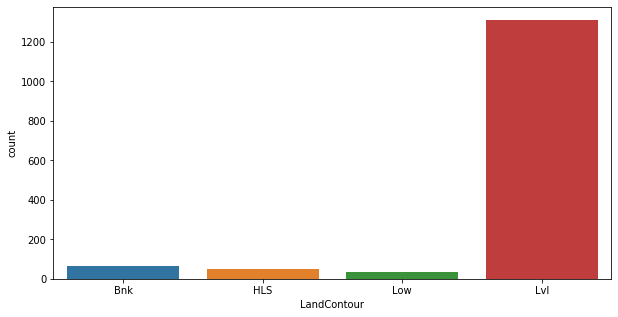

In [38]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['LandContour'])

**The variable mentioned above 'LandContour' has total 4 categories of which last three amount to less than 10%. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [39]:
housing_data_1['LandContour'] = housing_data_1['LandContour'].replace({'Bnk':'Other', 'HLS':'Other', 'Low':'Other'})

round(100*(housing_data_1['LandContour'].value_counts()/len(housing_data_1.index)),2)

Lvl      89.79
Other    10.21
Name: LandContour, dtype: float64

In [40]:
housing_data_1['Utilities'] = housing_data_1['Utilities'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Utilities'].value_counts()/len(housing_data_1.index)),2)

AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64

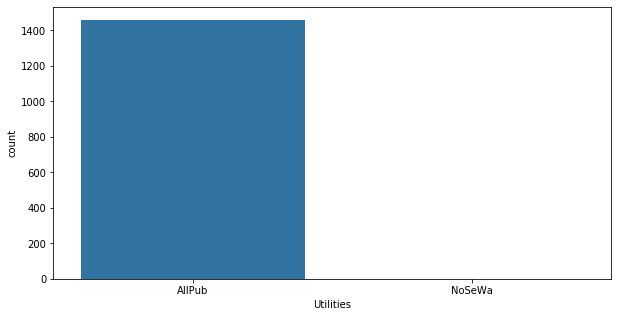

In [41]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Utilities'])

**The variable mentioned above 'Utilities' has 2 categories of which one amounts to 99%. It's better we drop this column as it has high data imbalance.**

In [42]:
housing_data_1['LotConfig'] = housing_data_1['LotConfig'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['LotConfig'].value_counts()/len(housing_data_1.index)),2)

Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64

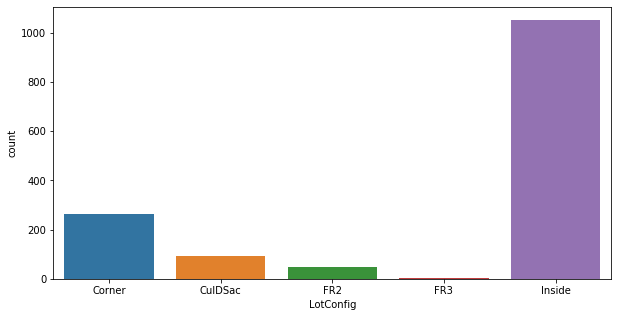

In [43]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['LotConfig'])

**The variable mentioned above 'LotConfig' has total 5 categories of which last two contribute very less. Lets combine them as one category 'FR2 & FR3' as this will reduce the number of dummies.**

In [44]:
housing_data_1['LotConfig'] = housing_data_1['LotConfig'].replace({'FR2':'FR2 & FR3', 'FR3':'FR2 & FR3'})

round(100*(housing_data_1['LotConfig'].value_counts()/len(housing_data_1.index)),2)

Inside       72.05
Corner       18.01
CulDSac       6.44
FR2 & FR3     3.49
Name: LotConfig, dtype: float64

In [45]:
housing_data_1['LandSlope'] = housing_data_1['LandSlope'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['LandSlope'].value_counts()/len(housing_data_1.index)),2)

Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64

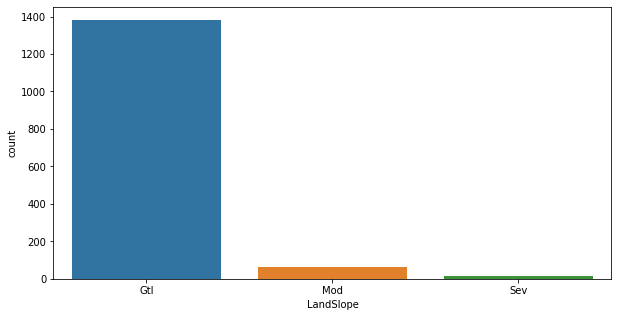

In [46]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['LandSlope'])

**The variable mentioned above 'LandSlope' has total 3 categories of which last two contribute very less. Lets combine them as one category 'Mod & Sev' as this will reduce the number of dummies.**

In [47]:
housing_data_1['LandSlope'] = housing_data_1['LandSlope'].replace({'Mod':'Mod & Sev', 'Sev':'Mod & Sev'})

round(100*(housing_data_1['LandSlope'].value_counts()/len(housing_data_1.index)),2)

Gtl          94.66
Mod & Sev     5.34
Name: LandSlope, dtype: float64

In [48]:
housing_data_1['Neighborhood'] = housing_data_1['Neighborhood'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Neighborhood'].value_counts()/len(housing_data_1.index)),2)

NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
SWISU       1.71
StoneBr     1.71
Blmngtn     1.16
MeadowV     1.16
BrDale      1.10
Veenker     0.75
NPkVill     0.62
Blueste     0.14
Name: Neighborhood, dtype: float64

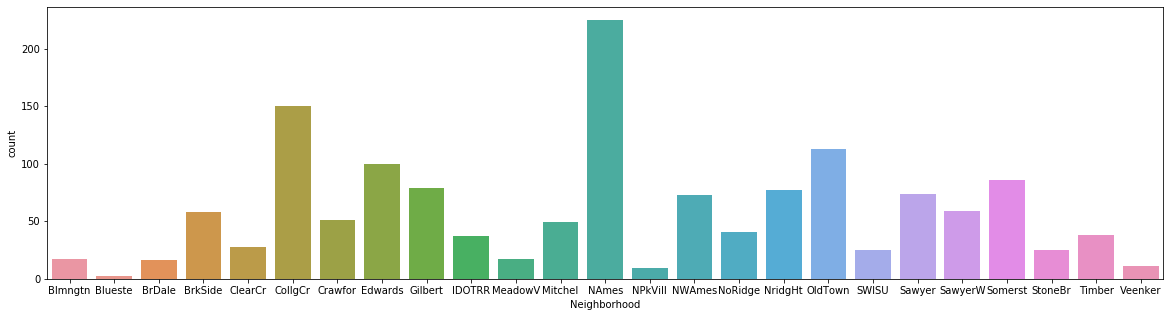

In [49]:
# Plotting the above column

plt.figure(figsize = (20,5))
sns.countplot(housing_data_1['Neighborhood'])

**The variable mentioned above 'Neighborhood' has total 25 categories of which last three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [50]:
housing_data_1['Neighborhood'] = housing_data_1['Neighborhood'].replace({'Veenker':'Other','NPkVill':'Other','Blueste':'Other'})

round(100*(housing_data_1['Neighborhood'].value_counts()/len(housing_data_1.index)),2)

NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
StoneBr     1.71
SWISU       1.71
Other       1.51
MeadowV     1.16
Blmngtn     1.16
BrDale      1.10
Name: Neighborhood, dtype: float64

In [51]:
housing_data_1['Condition1'] = housing_data_1['Condition1'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Condition1'].value_counts()/len(housing_data_1.index)),2)

Norm      86.30
Feedr      5.55
Artery     3.29
RRAn       1.78
PosN       1.30
RRAe       0.75
PosA       0.55
RRNn       0.34
RRNe       0.14
Name: Condition1, dtype: float64

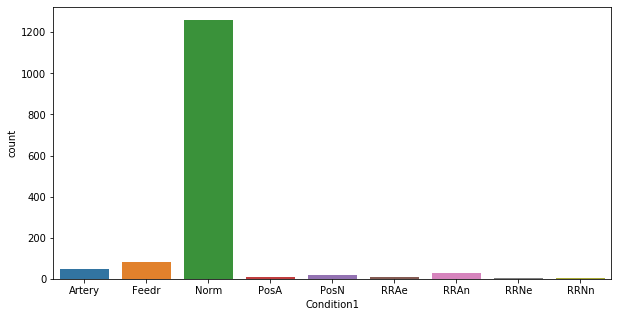

In [52]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Condition1'])

**The variable mentioned above 'Condition1' has total 9 categories of which last six contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [53]:
housing_data_1['Condition1'] = housing_data_1['Condition1'].replace({'RRAn':'Other', 'PosN':'Other', 'RRAe':'Other', 
                                                                     'PosA':'Other', 'RRNn':'Other', 'RRNe':'Other'})

round(100*(housing_data_1['Condition1'].value_counts()/len(housing_data_1.index)),2)

Norm      86.30
Feedr      5.55
Other      4.86
Artery     3.29
Name: Condition1, dtype: float64

In [54]:
housing_data_1['Condition2'] = housing_data_1['Condition2'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Condition2'].value_counts()/len(housing_data_1.index)),2)

Norm      98.97
Feedr      0.41
RRNn       0.14
PosN       0.14
Artery     0.14
RRAn       0.07
RRAe       0.07
PosA       0.07
Name: Condition2, dtype: float64

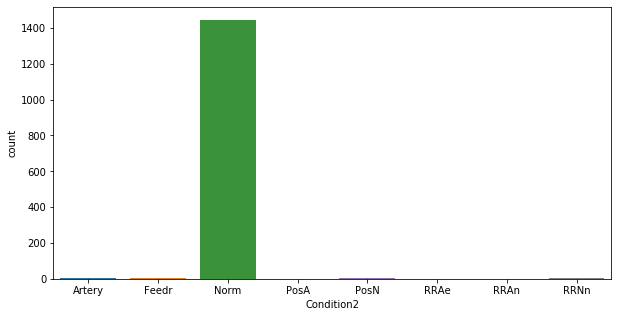

In [55]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Condition2'])

**The variable mentioned above 'Condition2' has 8 categories of which one amounts to 98%. It's better we drop this column as it has high data imbalance.**

In [56]:
housing_data_1['BldgType'] = housing_data_1['BldgType'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['BldgType'].value_counts()/len(housing_data_1.index)),2)

1Fam      83.56
TwnhsE     7.81
Duplex     3.56
Twnhs      2.95
2fmCon     2.12
Name: BldgType, dtype: float64

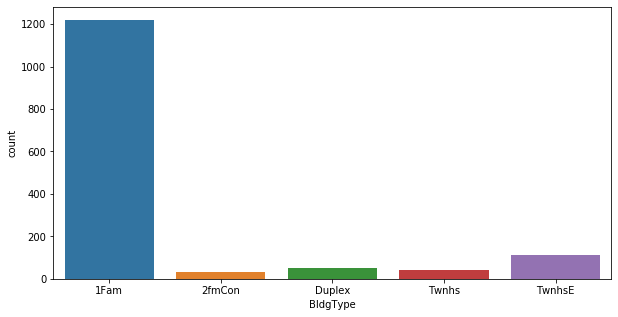

In [57]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['BldgType'])

**The variable mentioned above 'BldgType' has total 5 categories of which two contribute very less. Lets combine them as one category 'Twnhs & 2fmCon' as this will reduce the number of dummies.**

In [58]:
housing_data_1['BldgType'] = housing_data_1['BldgType'].replace({'Twnhs':'Twnhs & 2fmCon', '2fmCon':'Twnhs & 2fmCon'})

round(100*(housing_data_1['BldgType'].value_counts()/len(housing_data_1.index)),2)

1Fam              83.56
TwnhsE             7.81
Twnhs & 2fmCon     5.07
Duplex             3.56
Name: BldgType, dtype: float64

In [59]:
housing_data_1['HouseStyle'] = housing_data_1['HouseStyle'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['HouseStyle'].value_counts()/len(housing_data_1.index)),2)

1Story    49.73
2Story    30.48
1.5Fin    10.55
SLvl       4.45
SFoyer     2.53
1.5Unf     0.96
2.5Unf     0.75
2.5Fin     0.55
Name: HouseStyle, dtype: float64

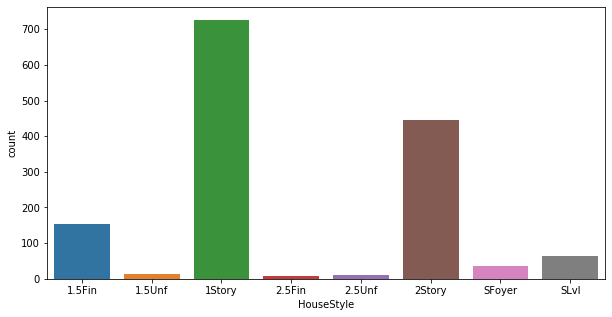

In [60]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['HouseStyle'])

**The variable mentioned above 'HouseStyle' has total 8 categories of which four contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [61]:
housing_data_1['HouseStyle'] = housing_data_1['HouseStyle'].replace({'SFoyer':'Other', '1.5Unf':'Other', '2.5Unf':'Other', 
                                                                     '2.5Fin':'Other'})

round(100*(housing_data_1['HouseStyle'].value_counts()/len(housing_data_1.index)),2)

1Story    49.73
2Story    30.48
1.5Fin    10.55
Other      4.79
SLvl       4.45
Name: HouseStyle, dtype: float64

In [62]:
housing_data_1['RoofStyle'] = housing_data_1['RoofStyle'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['RoofStyle'].value_counts()/len(housing_data_1.index)),2)

Gable      78.15
Hip        19.59
Flat        0.89
Gambrel     0.75
Mansard     0.48
Shed        0.14
Name: RoofStyle, dtype: float64

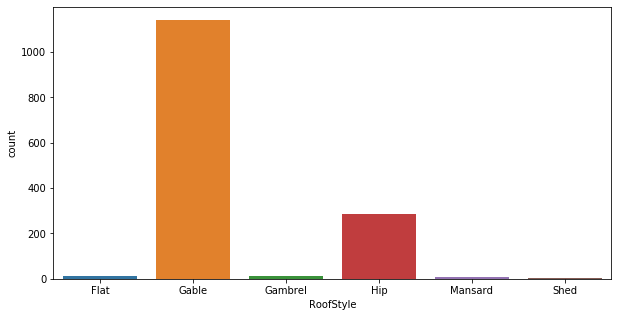

In [63]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['RoofStyle'])

**The variable mentioned above 'RoofStyle' has total 6 categories of which four contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [64]:
housing_data_1['RoofStyle'] = housing_data_1['RoofStyle'].replace({'Flat':'Other', 'Gambrel':'Other', 'Mansard':'Other', 
                                                                   'Shed':'Other'})

round(100*(housing_data_1['RoofStyle'].value_counts()/len(housing_data_1.index)),2)

Gable    78.15
Hip      19.59
Other     2.26
Name: RoofStyle, dtype: float64

In [65]:
housing_data_1['RoofMatl'] = housing_data_1['RoofMatl'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['RoofMatl'].value_counts()/len(housing_data_1.index)),2)

CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Roll        0.07
Metal       0.07
Membran     0.07
ClyTile     0.07
Name: RoofMatl, dtype: float64

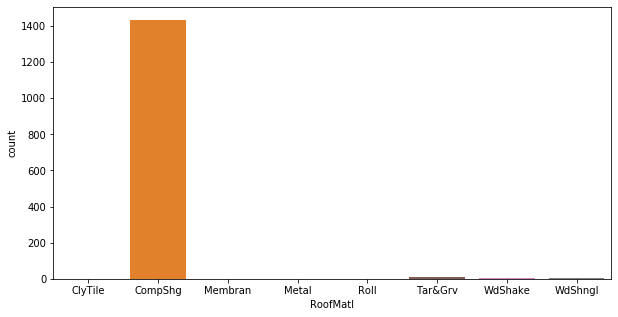

In [66]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['RoofMatl'])

**The variable mentioned above 'RoofMatl' has 8 categories of which one amounts to 98%. It's better we drop this column as it has high data imbalance.**

In [67]:
housing_data_1['Exterior1st'] = housing_data_1['Exterior1st'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Exterior1st'].value_counts()/len(housing_data_1.index)),2)

VinylSd    35.27
HdBoard    15.21
MetalSd    15.07
Wd Sdng    14.11
Plywood     7.40
CemntBd     4.18
BrkFace     3.42
WdShing     1.78
Stucco      1.71
AsbShng     1.37
Stone       0.14
BrkComm     0.14
ImStucc     0.07
CBlock      0.07
AsphShn     0.07
Name: Exterior1st, dtype: float64

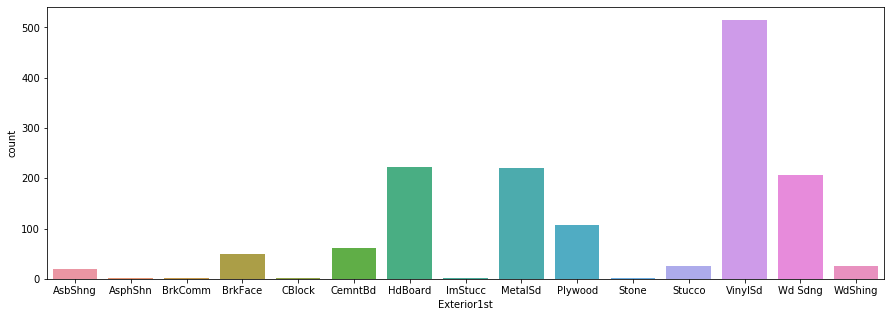

In [68]:
# Plotting the above column

plt.figure(figsize = (15,5))
sns.countplot(housing_data_1['Exterior1st'])

**The variable mentioned above 'Exterior1st' has total 15 categories of which eight contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [69]:
housing_data_1['Exterior1st'] = housing_data_1['Exterior1st'].replace({'WdShing':'Other', 'Stucco':'Other', 'AsbShng':'Other', 
                                                                       'Stone':'Other', 'BrkComm':'Other', 'ImStucc':'Other', 
                                                                       'CBlock':'Other', 'AsphShn':'Other'})

round(100*(housing_data_1['Exterior1st'].value_counts()/len(housing_data_1.index)),2)

VinylSd    35.27
HdBoard    15.21
MetalSd    15.07
Wd Sdng    14.11
Plywood     7.40
Other       5.34
CemntBd     4.18
BrkFace     3.42
Name: Exterior1st, dtype: float64

In [70]:
housing_data_1['Exterior2nd'] = housing_data_1['Exterior2nd'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Exterior2nd'].value_counts()/len(housing_data_1.index)),2)

VinylSd    34.52
MetalSd    14.66
HdBoard    14.18
Wd Sdng    13.49
Plywood     9.73
CmentBd     4.11
Wd Shng     2.60
Stucco      1.78
BrkFace     1.71
AsbShng     1.37
ImStucc     0.68
Brk Cmn     0.48
Stone       0.34
AsphShn     0.21
Other       0.07
CBlock      0.07
Name: Exterior2nd, dtype: float64

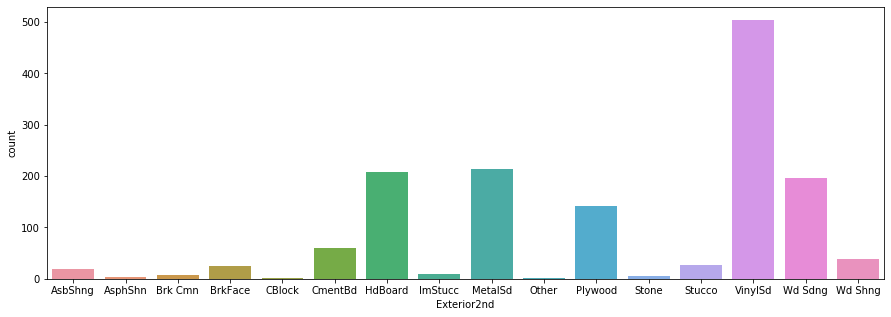

In [71]:
# Plotting the above column

plt.figure(figsize = (15,5))
sns.countplot(housing_data_1['Exterior2nd'])

**The variable mentioned above 'Exterior2nd' has total 16 categories of which ten contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [72]:
housing_data_1['Exterior2nd'] = housing_data_1['Exterior2nd'].replace({'Wd Shng':'Other', 'Stucco':'Other', 'BrkFace':'Other', 
                                                                       'AsbShng':'Other', 'ImStucc':'Other', 'Brk Cmn':'Other', 
                                                                       'Stone':'Other', 'AsphShn':'Other', 'Other':'Other', 
                                                                       'CBlock':'Other'})

round(100*(housing_data_1['Exterior2nd'].value_counts()/len(housing_data_1.index)),2)

VinylSd    34.52
MetalSd    14.66
HdBoard    14.18
Wd Sdng    13.49
Plywood     9.73
Other       9.32
CmentBd     4.11
Name: Exterior2nd, dtype: float64

In [73]:
housing_data_1['MasVnrType'] = housing_data_1['MasVnrType'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['MasVnrType'].value_counts()/len(housing_data_1.index)),2)

None       59.73
BrkFace    30.48
Stone       8.77
BrkCmn      1.03
Name: MasVnrType, dtype: float64

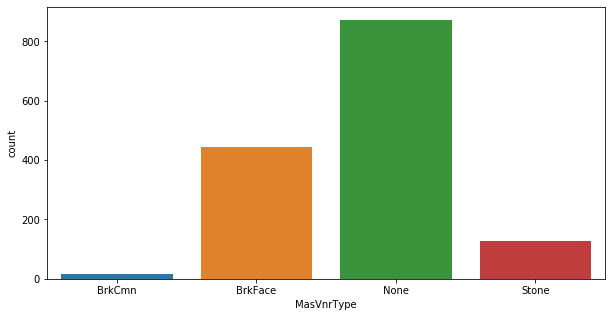

In [74]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['MasVnrType'])

**The variable mentioned above 'MasVnrType' has total 4 categories of which two contribute very less. Lets combine them as one category 'Stone & BrkCmn' as this will reduce the number of dummies.**

In [75]:
housing_data_1['MasVnrType'] = housing_data_1['MasVnrType'].replace({'Stone':'Stone & BrkCmn', 'BrkCmn':'Stone & BrkCmn'})

round(100*(housing_data_1['MasVnrType'].value_counts()/len(housing_data_1.index)),2)

None              59.73
BrkFace           30.48
Stone & BrkCmn     9.79
Name: MasVnrType, dtype: float64

In [76]:
housing_data_1['ExterQual'] = housing_data_1['ExterQual'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['ExterQual'].value_counts()/len(housing_data_1.index)),2)

TA    62.05
Gd    33.42
Ex     3.56
Fa     0.96
Name: ExterQual, dtype: float64

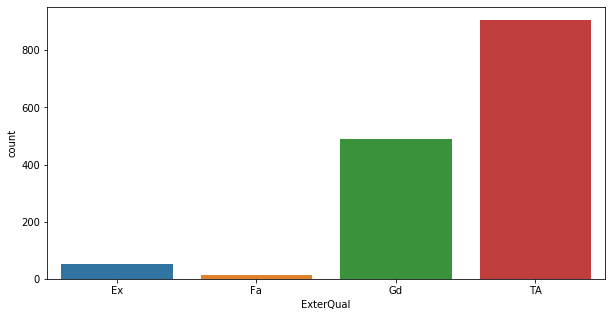

In [77]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['ExterQual'])

**The variable mentioned above 'ExterQual' has total 4 categories of which two contribute very less. Lets combine them as one category 'Ex & Fa' as this will reduce the number of dummies.**

In [78]:
housing_data_1['ExterQual'] = housing_data_1['ExterQual'].replace({'Ex':'Ex & Fa', 'Fa':'Ex & Fa'})

round(100*(housing_data_1['ExterQual'].value_counts()/len(housing_data_1.index)),2)

TA         62.05
Gd         33.42
Ex & Fa     4.52
Name: ExterQual, dtype: float64

In [79]:
housing_data_1['ExterCond'] = housing_data_1['ExterCond'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['ExterCond'].value_counts()/len(housing_data_1.index)),2)

TA    87.81
Gd    10.00
Fa     1.92
Ex     0.21
Po     0.07
Name: ExterCond, dtype: float64

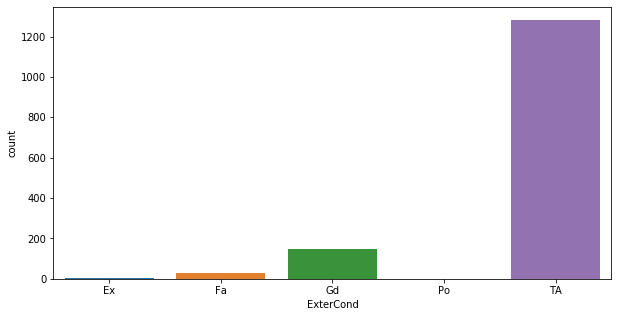

In [80]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['ExterCond'])

**The variable mentioned above 'ExterCond' has total 5 categories of which three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [81]:
housing_data_1['ExterCond'] = housing_data_1['ExterCond'].replace({'Fa':'Other', 'Ex':'Other', 'Po':'Other'})

round(100*(housing_data_1['ExterCond'].value_counts()/len(housing_data_1.index)),2)

TA       87.81
Gd       10.00
Other     2.19
Name: ExterCond, dtype: float64

In [82]:
housing_data_1['Foundation'] = housing_data_1['Foundation'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Foundation'].value_counts()/len(housing_data_1.index)),2)

PConc     44.32
CBlock    43.42
BrkTil    10.00
Slab       1.64
Stone      0.41
Wood       0.21
Name: Foundation, dtype: float64

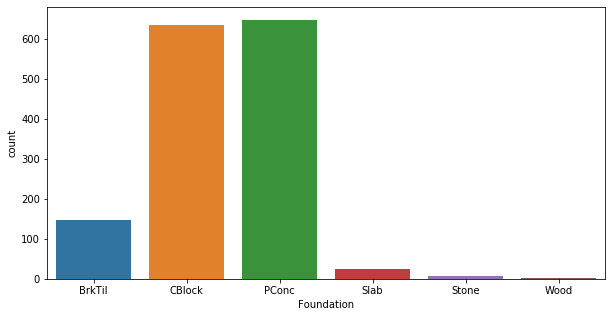

In [83]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Foundation'])

**The variable mentioned above 'Foundation' has total 6 categories of which three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [84]:
housing_data_1['Foundation'] = housing_data_1['Foundation'].replace({'Slab':'Other', 'Stone':'Other', 'Wood':'Other'})

round(100*(housing_data_1['Foundation'].value_counts()/len(housing_data_1.index)),2)

PConc     44.32
CBlock    43.42
BrkTil    10.00
Other      2.26
Name: Foundation, dtype: float64

In [85]:
housing_data_1['BsmtQual'] = housing_data_1['BsmtQual'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['BsmtQual'].value_counts()/len(housing_data_1.index)),2)

TA             44.45
Gd             42.33
Ex              8.29
Not Present     2.53
Fa              2.40
Name: BsmtQual, dtype: float64

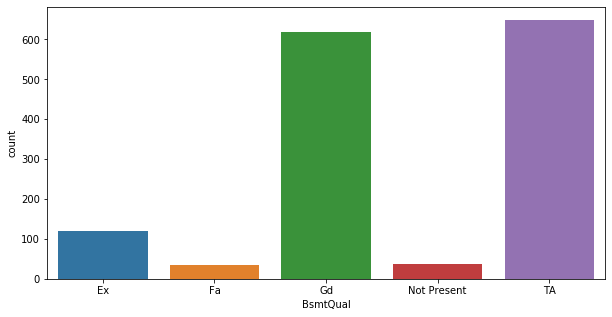

In [86]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['BsmtQual'])

**The variable mentioned above 'BsmtQual' has total 5 categories of which two contribute very less. Lets combine them as one category 'Not Present & Fa' as this will reduce the number of dummies.**

In [87]:
housing_data_1['BsmtQual'] = housing_data_1['BsmtQual'].replace({'Not Present':'Not Present & Fa', 'Fa':'Not Present & Fa'})

round(100*(housing_data_1['BsmtQual'].value_counts()/len(housing_data_1.index)),2)

TA                  44.45
Gd                  42.33
Ex                   8.29
Not Present & Fa     4.93
Name: BsmtQual, dtype: float64

In [88]:
housing_data_1['BsmtCond'] = housing_data_1['BsmtCond'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['BsmtCond'].value_counts()/len(housing_data_1.index)),2)

TA             89.79
Gd              4.45
Fa              3.08
Not Present     2.53
Po              0.14
Name: BsmtCond, dtype: float64

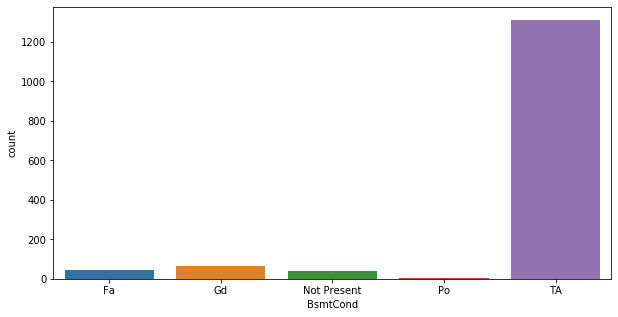

In [89]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['BsmtCond'])

**The variable mentioned above 'BsmtCond' has total 5 categories of which two contribute very less. Lets combine them as one category 'Not Present & Po' as this will reduce the number of dummies.**

In [90]:
housing_data_1['BsmtCond'] = housing_data_1['BsmtCond'].replace({'Not Present':'Not Present & Po', 'Po':'Not Present & Po'})

round(100*(housing_data_1['BsmtCond'].value_counts()/len(housing_data_1.index)),2)

TA                  89.79
Gd                   4.45
Fa                   3.08
Not Present & Po     2.67
Name: BsmtCond, dtype: float64

In [91]:
housing_data_1['BsmtExposure'] = housing_data_1['BsmtExposure'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['BsmtExposure'].value_counts()/len(housing_data_1.index)),2)

No             65.27
Av             15.14
Gd              9.18
Mn              7.81
Not Present     2.60
Name: BsmtExposure, dtype: float64

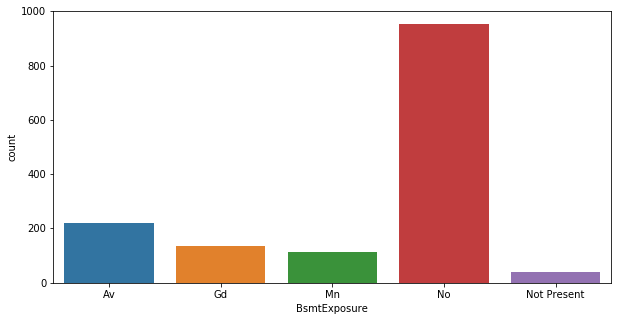

In [92]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['BsmtExposure'])

**The variable mentioned above 'BsmtExposure' has total 5 categories of which two contribute very less. Lets combine them as one category 'Not Present & Mn' as this will reduce the number of dummies.**

In [93]:
housing_data_1['BsmtExposure'] = housing_data_1['BsmtExposure'].replace({'Not Present':'Not Present & Mn', 
                                                                         'Mn':'Not Present & Mn'})

round(100*(housing_data_1['BsmtExposure'].value_counts()/len(housing_data_1.index)),2)

No                  65.27
Av                  15.14
Not Present & Mn    10.41
Gd                   9.18
Name: BsmtExposure, dtype: float64

In [94]:
housing_data_1['BsmtFinType1'] = housing_data_1['BsmtFinType1'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['BsmtFinType1'].value_counts()/len(housing_data_1.index)),2)

Unf            29.45
GLQ            28.63
ALQ            15.07
BLQ            10.14
Rec             9.11
LwQ             5.07
Not Present     2.53
Name: BsmtFinType1, dtype: float64

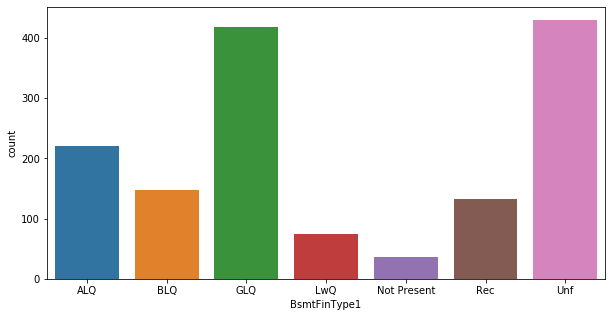

In [95]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['BsmtFinType1'])

**The variable mentioned above 'BsmtFinType1' has total 7 categories of which two contribute very less. Lets combine them as one category 'Not Present & LwQ' as this will reduce the number of dummies.**

In [96]:
housing_data_1['BsmtFinType1'] = housing_data_1['BsmtFinType1'].replace({'Not Present':'Not Present & LwQ', 
                                                                         'LwQ':'Not Present & LwQ'})

round(100*(housing_data_1['BsmtFinType1'].value_counts()/len(housing_data_1.index)),2)

Unf                  29.45
GLQ                  28.63
ALQ                  15.07
BLQ                  10.14
Rec                   9.11
Not Present & LwQ     7.60
Name: BsmtFinType1, dtype: float64

In [97]:
housing_data_1['BsmtFinType2'] = housing_data_1['BsmtFinType2'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['BsmtFinType2'].value_counts()/len(housing_data_1.index)),2)

Unf            86.03
Rec             3.70
LwQ             3.15
Not Present     2.60
BLQ             2.26
ALQ             1.30
GLQ             0.96
Name: BsmtFinType2, dtype: float64

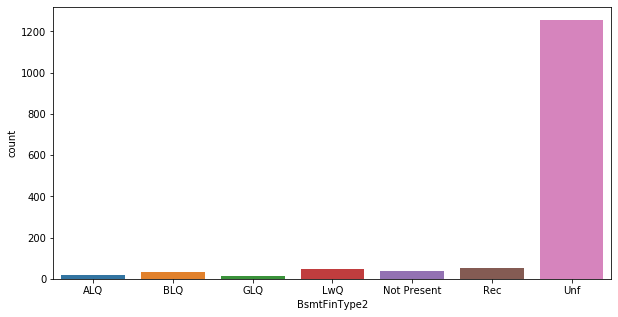

In [98]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['BsmtFinType2'])

**The variable mentioned above 'BsmtFinType2' has total 7 categories of which three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [99]:
housing_data_1['BsmtFinType2'] = housing_data_1['BsmtFinType2'].replace({'BLQ':'Other', 'ALQ':'Other', 'GLQ':'Other'})

round(100*(housing_data_1['BsmtFinType2'].value_counts()/len(housing_data_1.index)),2)

Unf            86.03
Other           4.52
Rec             3.70
LwQ             3.15
Not Present     2.60
Name: BsmtFinType2, dtype: float64

In [100]:
housing_data_1['Heating'] = housing_data_1['Heating'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Heating'].value_counts()/len(housing_data_1.index)),2)

GasA     97.81
GasW      1.23
Grav      0.48
Wall      0.27
OthW      0.14
Floor     0.07
Name: Heating, dtype: float64

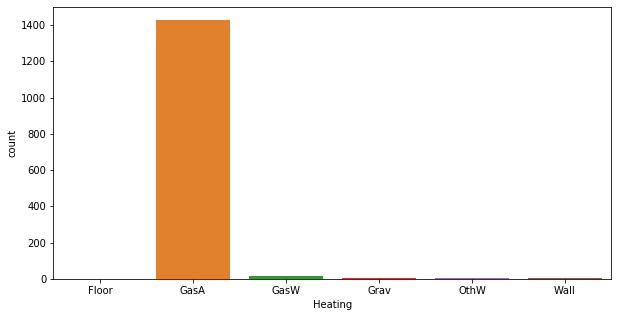

In [101]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Heating'])

**The variable mentioned above 'Heating' has 6 categories of which one amounts to 97%. It's better we drop this column as it has high data imbalance.**

In [102]:
housing_data_1['HeatingQC'] = housing_data_1['HeatingQC'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['HeatingQC'].value_counts()/len(housing_data_1.index)),2)

Ex    50.75
TA    29.32
Gd    16.51
Fa     3.36
Po     0.07
Name: HeatingQC, dtype: float64

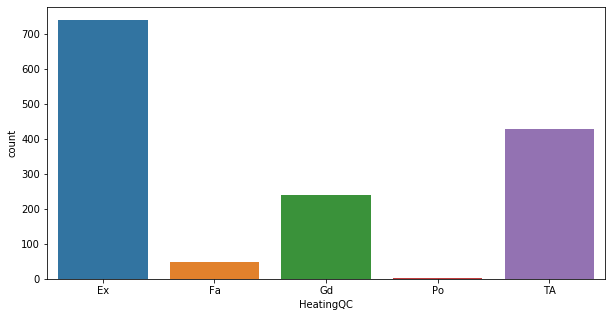

In [103]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['HeatingQC'])

**The variable mentioned above 'HeatingQC' has total 5 categories of which two contribute very less. Lets combine them as one category 'Fa & Po' as this will reduce the number of dummies.**

In [104]:
housing_data_1['HeatingQC'] = housing_data_1['HeatingQC'].replace({'Fa':'Fa & Po', 'Po':'Fa & Po'})

round(100*(housing_data_1['HeatingQC'].value_counts()/len(housing_data_1.index)),2)

Ex         50.75
TA         29.32
Gd         16.51
Fa & Po     3.42
Name: HeatingQC, dtype: float64

In [105]:
housing_data_1['Electrical'] = housing_data_1['Electrical'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Electrical'].value_counts()/len(housing_data_1.index)),2)

SBrkr    91.44
FuseA     6.44
FuseF     1.85
FuseP     0.21
Mix       0.07
Name: Electrical, dtype: float64

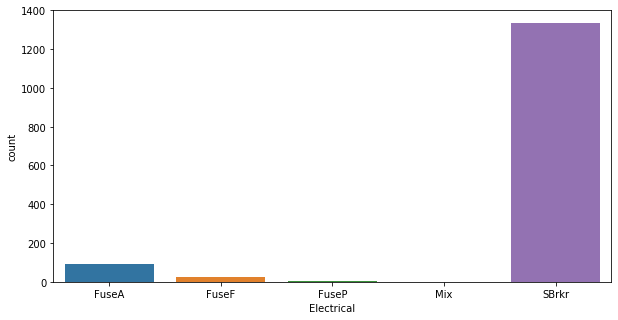

In [106]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Electrical'])

**The variable mentioned above 'Electrical' has total 5 categories of which three contribute very less. Lets combine them as one category 'Fuse_F_P & Mix' as this will reduce the number of dummies.**

In [107]:
housing_data_1['Electrical'] = housing_data_1['Electrical'].replace({'FuseF':'Fuse_F_P & Mix', 'FuseP':'Fuse_F_P & Mix', 
                                                                     'Mix':'Fuse_F_P & Mix'})

round(100*(housing_data_1['Electrical'].value_counts()/len(housing_data_1.index)),2)

SBrkr             91.44
FuseA              6.44
Fuse_F_P & Mix     2.12
Name: Electrical, dtype: float64

In [108]:
housing_data_1['BsmtFullBath'] = housing_data_1['BsmtFullBath'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['BsmtFullBath'].value_counts()/len(housing_data_1.index)),2)

0    58.63
1    40.27
2     1.03
3     0.07
Name: BsmtFullBath, dtype: float64

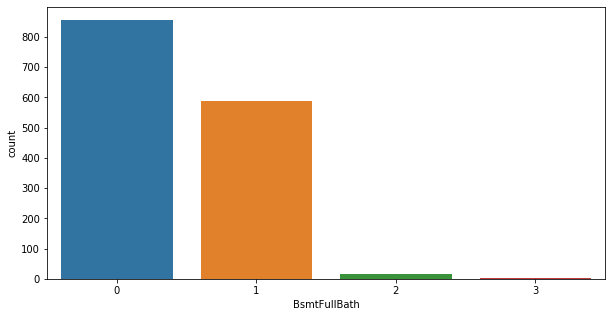

In [109]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['BsmtFullBath'])

**The variable mentioned above 'BsmtFullBath' has total 4 categories of which two contribute very less. Lets combine them as one category '2 & 3' as this will reduce the number of dummies.**

In [110]:
housing_data_1['BsmtFullBath'] = housing_data_1['BsmtFullBath'].replace({2:'2 & 3', 3:'2 & 3'})

round(100*(housing_data_1['BsmtFullBath'].value_counts()/len(housing_data_1.index)),2)

0        58.63
1        40.27
2 & 3     1.10
Name: BsmtFullBath, dtype: float64

In [111]:
housing_data_1['BsmtHalfBath'] = housing_data_1['BsmtHalfBath'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['BsmtHalfBath'].value_counts()/len(housing_data_1.index)),2)

0    94.38
1     5.48
2     0.14
Name: BsmtHalfBath, dtype: float64

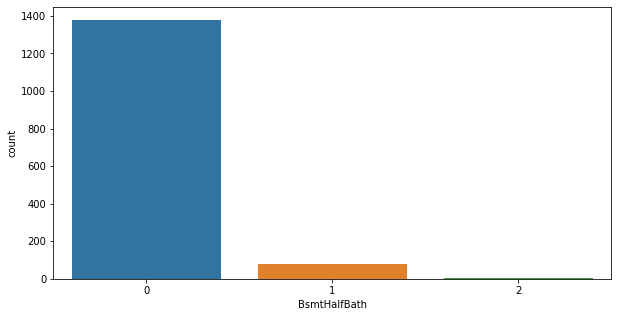

In [112]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['BsmtHalfBath'])

**The variable mentioned above 'BsmtHalfBath' has total 3 categories of which two contribute very less. Lets combine them as one category '1 & 2' as this will reduce the number of dummies.**

In [113]:
housing_data_1['BsmtHalfBath'] = housing_data_1['BsmtHalfBath'].replace({1:'1 & 2', 2:'1 & 2'})

round(100*(housing_data_1['BsmtHalfBath'].value_counts()/len(housing_data_1.index)),2)

0        94.38
1 & 2     5.62
Name: BsmtHalfBath, dtype: float64

In [114]:
housing_data_1['FullBath'] = housing_data_1['FullBath'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['FullBath'].value_counts()/len(housing_data_1.index)),2)

2    52.60
1    44.52
3     2.26
0     0.62
Name: FullBath, dtype: float64

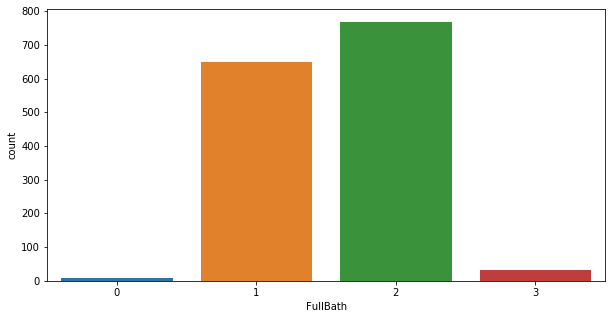

In [115]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['FullBath'])

**The variable mentioned above 'FullBath' has total 4 categories of which two contribute very less. Lets combine them as one category '3 & 0' as this will reduce the number of dummies.**

In [116]:
housing_data_1['FullBath'] = housing_data_1['FullBath'].replace({3:'3 & 0', 0:'3 & 0'})

round(100*(housing_data_1['FullBath'].value_counts()/len(housing_data_1.index)),2)

2        52.60
1        44.52
3 & 0     2.88
Name: FullBath, dtype: float64

In [117]:
housing_data_1['HalfBath'] = housing_data_1['HalfBath'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['HalfBath'].value_counts()/len(housing_data_1.index)),2)

0    62.53
1    36.64
2     0.82
Name: HalfBath, dtype: float64

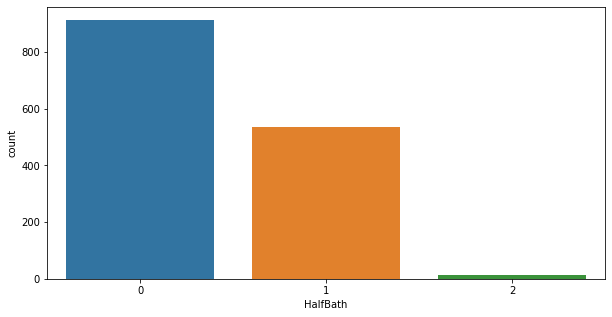

In [118]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['HalfBath'])

**The variable mentioned above 'HalfBath' has total 3 categories of which two contribute very less. Lets combine them as one category '1 & 2' as this will reduce the number of dummies.**

In [119]:
housing_data_1['HalfBath'] = housing_data_1['HalfBath'].replace({1:'1 & 2', 2:'1 & 2'})

round(100*(housing_data_1['HalfBath'].value_counts()/len(housing_data_1.index)),2)

0        62.53
1 & 2    37.47
Name: HalfBath, dtype: float64

In [120]:
housing_data_1['BedroomAbvGr'] = housing_data_1['BedroomAbvGr'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['BedroomAbvGr'].value_counts()/len(housing_data_1.index)),2)

3    55.07
2    24.52
4    14.59
1     3.42
5     1.44
6     0.48
0     0.41
8     0.07
Name: BedroomAbvGr, dtype: float64

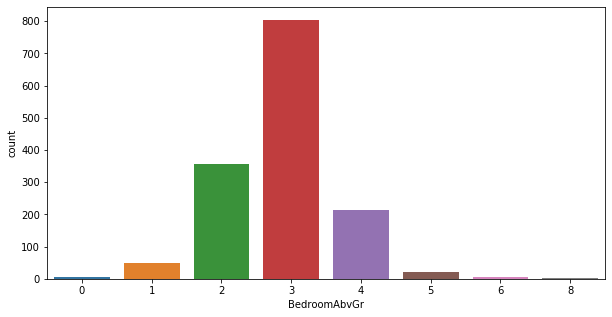

In [121]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['BedroomAbvGr'])

**The variable mentioned above 'BedroomAbvGr' has total 8 categories of which five contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [122]:
housing_data_1['BedroomAbvGr'] = housing_data_1['BedroomAbvGr'].replace({1:'Other', 5:'Other', 6:'Other', 0:'Other', 8:'Other'})

round(100*(housing_data_1['BedroomAbvGr'].value_counts()/len(housing_data_1.index)),2)

3        55.07
2        24.52
4        14.59
Other     5.82
Name: BedroomAbvGr, dtype: float64

In [123]:
housing_data_1['KitchenAbvGr'] = housing_data_1['KitchenAbvGr'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['KitchenAbvGr'].value_counts()/len(housing_data_1.index)),2)

1    95.34
2     4.45
3     0.14
0     0.07
Name: KitchenAbvGr, dtype: float64

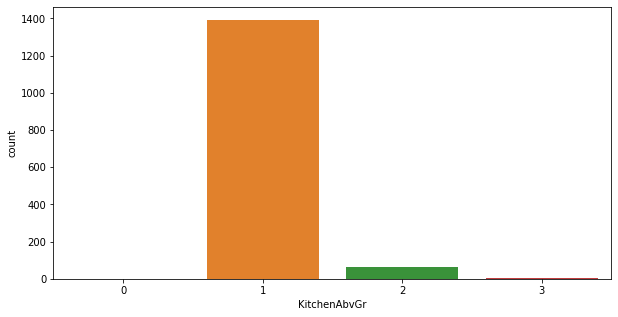

In [124]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['KitchenAbvGr'])

**The variable mentioned above 'KitchenAbvGr' has 4 categories of which one amounts to 95%. It's better we drop this column as it has high data imbalance.**

In [125]:
housing_data_1['KitchenQual'] = housing_data_1['KitchenQual'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['KitchenQual'].value_counts()/len(housing_data_1.index)),2)

TA    50.34
Gd    40.14
Ex     6.85
Fa     2.67
Name: KitchenQual, dtype: float64

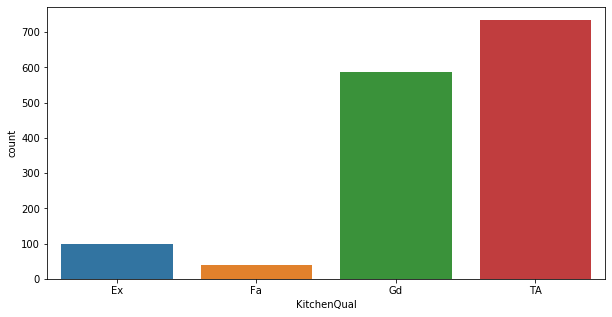

In [126]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['KitchenQual'])

**The variable mentioned above 'KitchenQual' has total 4 categories of which two contribute very less. Lets combine them as one category 'Ex & Fa' as this will reduce the number of dummies.**

In [127]:
housing_data_1['KitchenQual'] = housing_data_1['KitchenQual'].replace({'Ex':'Ex & Fa', 'Fa':'Ex & Fa'})

round(100*(housing_data_1['KitchenQual'].value_counts()/len(housing_data_1.index)),2)

TA         50.34
Gd         40.14
Ex & Fa     9.52
Name: KitchenQual, dtype: float64

In [128]:
housing_data_1['Functional'] = housing_data_1['Functional'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Functional'].value_counts()/len(housing_data_1.index)),2)

Typ     93.15
Min2     2.33
Min1     2.12
Mod      1.03
Maj1     0.96
Maj2     0.34
Sev      0.07
Name: Functional, dtype: float64

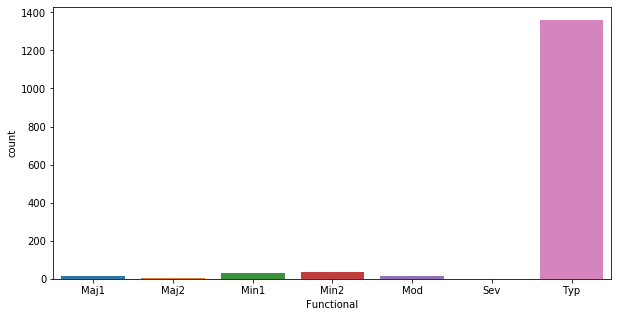

In [129]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Functional'])

**The variable mentioned above 'Functional' has total 7 categories of which six contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [130]:
housing_data_1['Functional'] = housing_data_1['Functional'].replace({'Min2':'Other', 'Min1':'Other', 'Mod':'Other', 
                                                                     'Maj1':'Other', 'Maj2':'Other', 'Sev':'Other'})

round(100*(housing_data_1['Functional'].value_counts()/len(housing_data_1.index)),2)

Typ      93.15
Other     6.85
Name: Functional, dtype: float64

In [131]:
housing_data_1['Fireplaces'] = housing_data_1['Fireplaces'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Fireplaces'].value_counts()/len(housing_data_1.index)),2)

0    47.26
1    44.52
2     7.88
3     0.34
Name: Fireplaces, dtype: float64

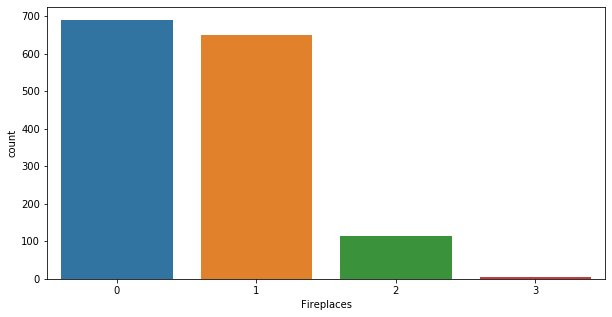

In [132]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Fireplaces'])

**The variable mentioned above 'Fireplaces' has total 4 categories of which two contribute very less. Lets combine them as one category '2 & 3' as this will reduce the number of dummies.**

In [133]:
housing_data_1['Fireplaces'] = housing_data_1['Fireplaces'].replace({2:'2 & 3', 3:'2 & 3'})

round(100*(housing_data_1['Fireplaces'].value_counts()/len(housing_data_1.index)),2)

0        47.26
1        44.52
2 & 3     8.22
Name: Fireplaces, dtype: float64

In [134]:
housing_data_1['FireplaceQu'] = housing_data_1['FireplaceQu'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['FireplaceQu'].value_counts()/len(housing_data_1.index)),2)

Not Present    47.26
Gd             26.03
TA             21.44
Fa              2.26
Ex              1.64
Po              1.37
Name: FireplaceQu, dtype: float64

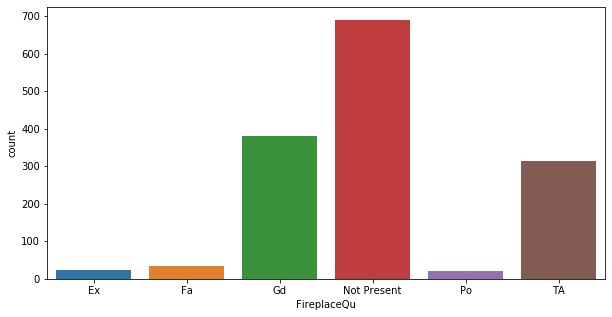

In [135]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['FireplaceQu'])

**The variable mentioned above 'FireplaceQu' has total 6 categories of which three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [136]:
housing_data_1['FireplaceQu'] = housing_data_1['FireplaceQu'].replace({'Fa':'Other', 'Ex':'Other', 'Po':'Other'})

round(100*(housing_data_1['FireplaceQu'].value_counts()/len(housing_data_1.index)),2)

Not Present    47.26
Gd             26.03
TA             21.44
Other           5.27
Name: FireplaceQu, dtype: float64

In [137]:
housing_data_1['GarageType'] = housing_data_1['GarageType'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['GarageType'].value_counts()/len(housing_data_1.index)),2)

Attchd         59.59
Detchd         26.51
BuiltIn         6.03
Not Present     5.55
Basment         1.30
CarPort         0.62
2Types          0.41
Name: GarageType, dtype: float64

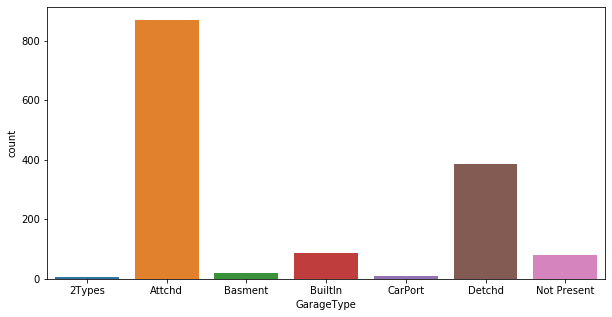

In [138]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['GarageType'])

**The variable mentioned above 'GarageType' has total 7 categories of which three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [139]:
housing_data_1['GarageType'] = housing_data_1['GarageType'].replace({'Basement':'Other', 'CarPort':'Other', '2Types':'Other'})

round(100*(housing_data_1['GarageType'].value_counts()/len(housing_data_1.index)),2)

Attchd         59.59
Detchd         26.51
BuiltIn         6.03
Not Present     5.55
Basment         1.30
Other           1.03
Name: GarageType, dtype: float64

In [140]:
housing_data_1['GarageCars'] = housing_data_1['GarageCars'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['GarageCars'].value_counts()/len(housing_data_1.index)),2)

2    56.44
1    25.27
3    12.40
0     5.55
4     0.34
Name: GarageCars, dtype: float64

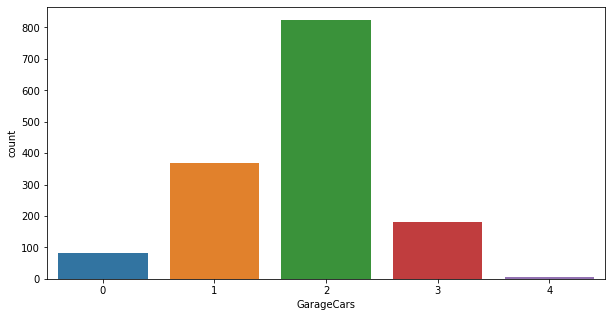

In [141]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['GarageCars'])

**The variable mentioned above 'GarageCars' has total 5 categories of which two contribute very less. Lets combine them as one category '0 & 4' as this will reduce the number of dummies.**

In [142]:
housing_data_1['GarageCars'] = housing_data_1['GarageCars'].replace({0:'0 & 4', 4:'0 & 4'})

round(100*(housing_data_1['GarageCars'].value_counts()/len(housing_data_1.index)),2)

2        56.44
1        25.27
3        12.40
0 & 4     5.89
Name: GarageCars, dtype: float64

In [143]:
housing_data_1['GarageQual'] = housing_data_1['GarageQual'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['GarageQual'].value_counts()/len(housing_data_1.index)),2)

TA             89.79
Not Present     5.55
Fa              3.29
Gd              0.96
Po              0.21
Ex              0.21
Name: GarageQual, dtype: float64

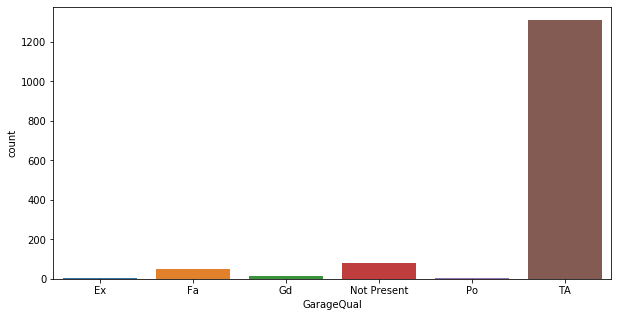

In [144]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['GarageQual'])

**The variable mentioned above 'GarageQual' has total 6 categories of which three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [145]:
housing_data_1['GarageQual'] = housing_data_1['GarageQual'].replace({'Gd':'Other', 'Po':'Other', 'Ex':'Other'})

round(100*(housing_data_1['GarageQual'].value_counts()/len(housing_data_1.index)),2)

TA             89.79
Not Present     5.55
Fa              3.29
Other           1.37
Name: GarageQual, dtype: float64

In [146]:
housing_data_1['GarageCond'] = housing_data_1['GarageCond'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['GarageCond'].value_counts()/len(housing_data_1.index)),2)

TA             90.82
Not Present     5.55
Fa              2.40
Gd              0.62
Po              0.48
Ex              0.14
Name: GarageCond, dtype: float64

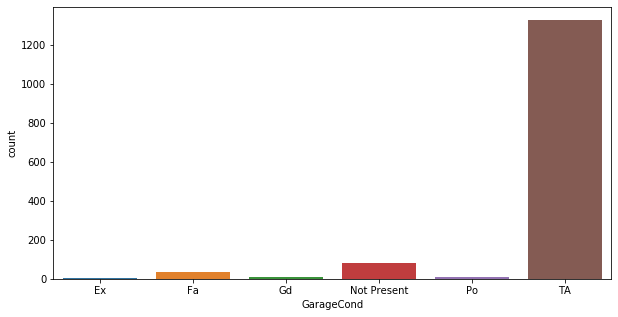

In [147]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['GarageCond'])

**The variable mentioned above 'GarageCond' has total 6 categories of which three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [148]:
housing_data_1['GarageCond'] = housing_data_1['GarageCond'].replace({'Gd':'Other', 'Po':'Other', 'Ex':'Other'})

round(100*(housing_data_1['GarageCond'].value_counts()/len(housing_data_1.index)),2)

TA             90.82
Not Present     5.55
Fa              2.40
Other           1.23
Name: GarageCond, dtype: float64

In [149]:
housing_data_1['PavedDrive'] = housing_data_1['PavedDrive'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['PavedDrive'].value_counts()/len(housing_data_1.index)),2)

Y    91.78
N     6.16
P     2.05
Name: PavedDrive, dtype: float64

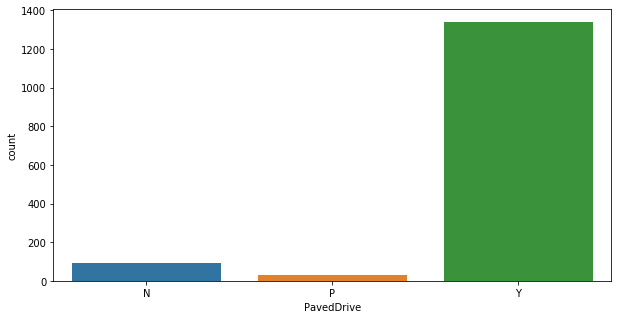

In [150]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['PavedDrive'])

**The variable mentioned above 'PavedDrive' has total 3 categories of which two contribute very less. Lets combine them as one category 'N & P' as this will reduce the number of dummies.**

In [151]:
housing_data_1['PavedDrive'] = housing_data_1['PavedDrive'].replace({'N':'N & P', 'P':'N & P'})

round(100*(housing_data_1['PavedDrive'].value_counts()/len(housing_data_1.index)),2)

Y        91.78
N & P     8.22
Name: PavedDrive, dtype: float64

In [152]:
housing_data_1['PoolQC'] = housing_data_1['PoolQC'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['PoolQC'].value_counts()/len(housing_data_1.index)),2)

Not Present    99.52
Gd              0.21
Fa              0.14
Ex              0.14
Name: PoolQC, dtype: float64

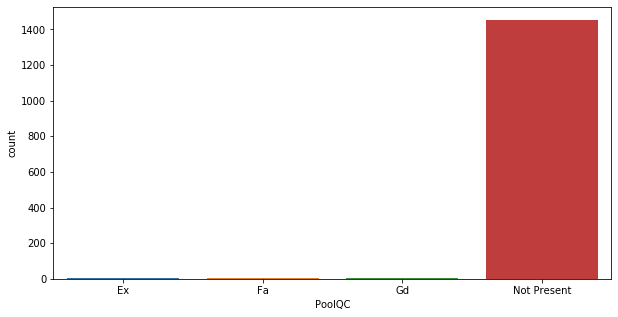

In [153]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['PoolQC'])

**The variable mentioned above 'Condition2' has 4 categories of which one amounts to 99%. It's better we drop this column as it has high data imbalance.**

In [154]:
housing_data_1['Fence'] = housing_data_1['Fence'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['Fence'].value_counts()/len(housing_data_1.index)),2)

Not Present    80.75
MnPrv          10.75
GdPrv           4.04
GdWo            3.70
MnWw            0.75
Name: Fence, dtype: float64

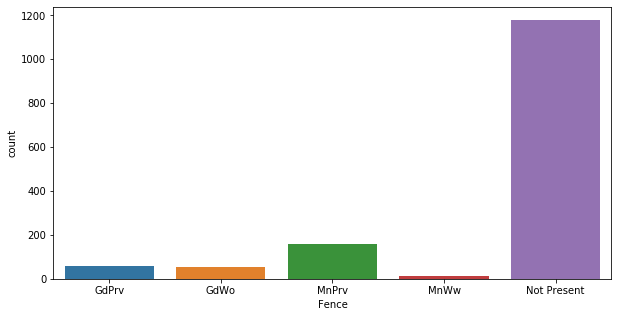

In [155]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['Fence'])

**The variable mentioned above 'Fence' has total 5 categories of which three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [156]:
housing_data_1['Fence'] = housing_data_1['Fence'].replace({'GdPrv':'Other', 'GdWo':'Other', 'MnWw':'Other'})

round(100*(housing_data_1['Fence'].value_counts()/len(housing_data_1.index)),2)

Not Present    80.75
MnPrv          10.75
Other           8.49
Name: Fence, dtype: float64

In [157]:
housing_data_1['SaleType'] = housing_data_1['SaleType'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['SaleType'].value_counts()/len(housing_data_1.index)),2)

WD       86.78
New       8.36
COD       2.95
ConLD     0.62
ConLw     0.34
ConLI     0.34
CWD       0.27
Oth       0.21
Con       0.14
Name: SaleType, dtype: float64

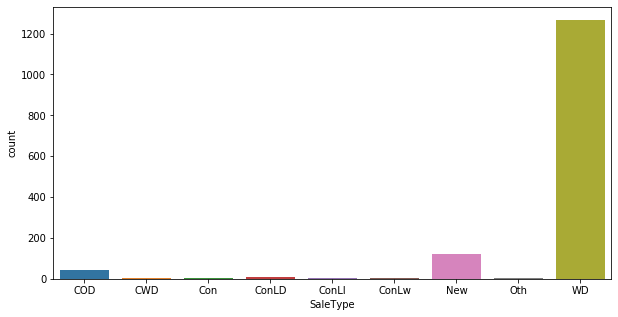

In [158]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['SaleType'])

**The variable mentioned above 'SaleType' has total 9 categories of which six contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [159]:
housing_data_1['SaleType'] = housing_data_1['SaleType'].replace({'ConLD':'Other', 'ConLw':'Other', 'ConLI':'Other', 
                                                                 'CWD':'Other', 'Oth':'Other', 'Con':'Other'})

round(100*(housing_data_1['SaleType'].value_counts()/len(housing_data_1.index)),2)

WD       86.78
New       8.36
COD       2.95
Other     1.92
Name: SaleType, dtype: float64

In [160]:
housing_data_1['SaleCondition'] = housing_data_1['SaleCondition'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(housing_data_1['SaleCondition'].value_counts()/len(housing_data_1.index)),2)

Normal     82.05
Partial     8.56
Abnorml     6.92
Family      1.37
Alloca      0.82
AdjLand     0.27
Name: SaleCondition, dtype: float64

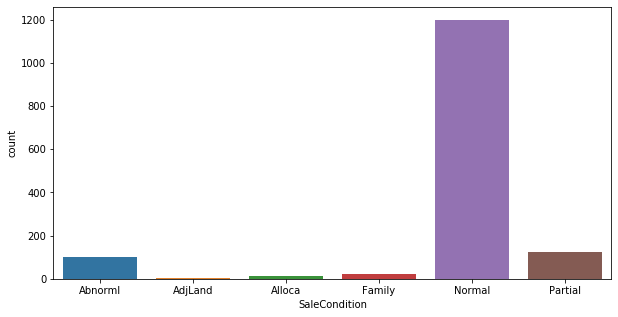

In [161]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(housing_data_1['SaleCondition'])

**The variable mentioned above 'SaleCondition' has total 6 categories of which three contribute very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [162]:
housing_data_1['SaleCondition'] = housing_data_1['SaleCondition'].replace({'Family':'Other','Alloca':'Other','AdjLand':'Other'})

round(100*(housing_data_1['SaleCondition'].value_counts()/len(housing_data_1.index)),2)

Normal     82.05
Partial     8.56
Abnorml     6.92
Other       2.47
Name: SaleCondition, dtype: float64

## Dropping the columns with high data imbalance

**From the above data visualization, the following columns have high data imbalance (>95%). I chose to drop them.**
- **Street** 
- **Utilities**
- **Condition2**
- **RoofMatl**
- **Heating**
- **KitchenAbvGr**
- **PoolQC**

In [163]:
housing_data_1 = housing_data_1.drop(['Street','Utilities','Condition2','RoofMatl','Heating','KitchenAbvGr','PoolQC'], axis = 1)
housing_data_1.head()

Id MSSubClass MSZoning  LotFrontage  LotArea        Alley LotShape  \
0   1         60       RL         65.0     8450  Not Present      Reg   
1   2         20       RL         80.0     9600  Not Present      Reg   
2   3         60       RL         68.0    11250  Not Present      IR1   
3   4         70       RL         60.0     9550  Not Present      IR1   
4   5         60       RL         84.0    14260  Not Present      IR1   

  LandContour  LotConfig LandSlope Neighborhood Condition1 BldgType  \
0         Lvl     Inside       Gtl      CollgCr       Norm     1Fam   
1         Lvl  FR2 & FR3       Gtl        Other      Feedr     1Fam   
2         Lvl     Inside       Gtl      CollgCr       Norm     1Fam   
3         Lvl     Corner       Gtl      Crawfor       Norm     1Fam   
4         Lvl  FR2 & FR3       Gtl      NoRidge       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng       Other   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

       BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0                No          GLQ         706          Unf           0   
1                Gd          ALQ         978          Unf           0   
2  Not Present & Mn          GLQ         486          Unf           0   
3                No          ALQ         216          Unf           0   
4                Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        150          856        Ex          Y      SBrkr       856       854   
1        284         1262        Ex          Y      SBrkr      1262         0   
2        434          920        Ex          Y      SBrkr       920       866   
3        540          756        Gd          Y      SBrkr       961       756   
4        490         1145        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath  \
0             0       1710            1            0        2    1 & 2   
1             0       1262            0        1 & 2        2        0   
2             0       1786            1            0        2    1 & 2   
3             0       1717            1            0        1        0   
4             0       2198            1            0        2    1 & 2   

  BedroomAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces  FireplaceQu  \
0            3          Gd            8        Typ          0  Not Present   
1            3          TA            6        Typ          1           TA   
2            3          Gd            6        Typ          1           TA   
3            3          Gd            7        Typ          1           Gd   
4            4          Gd            9        Typ          1           TA   

  GarageType GarageFinish GarageCars  GarageArea GarageQual GarageCond  \
0     Attchd          RFn          2         548         TA         TA   
1     Attchd          RFn          2         460         TA         TA   
2     Attchd          RFn          2         608         TA         TA   
3     Detchd          Unf          3         642         TA         TA   
4     A

In [164]:
housing_data_1.shape

(1460, 72)

## Correlation plot

**We can plot correlations between variables using a heat map. A heatmap is pretty useful to visualise multiple correlations in one plot.**

**We'll first subset the list of all (independent) numeric variables, and then plot them.**

In [165]:
num_vars = housing_data_1.select_dtypes(include=['float64', 'int64'])
num_vars.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450            7            5       196.0         706   
1   2         80.0     9600            6            8         0.0         978   
2   3         68.0    11250            7            5       162.0         486   
3   4         60.0     9550            7            5         0.0         216   
4   5         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       1710         548           0           61              0          0   
1       1262         460         298            0              0          0   
2       1786         608           0           42              0          0   
3       1717         642           0           35            272          0   
4       2198         836         192           84              0          0   

   ScreenPorch  PoolArea  MoSold  SalePrice  House_Age  Remodelled_Age  \
0            0         0       2     208500         17              17   
1            0         0       5     181500         44              44   
2            0         0       9     223500         19              18   
3            0         0       2     140000        105              50   
4            0         0      12     250000         20              20   

   Garage_Age  Sold_Age  
0          17        12  
1          44        13  
2          19        12  
3          22        14  
4          20        12

In [166]:
num_vars.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'SalePrice', 'House_Age',
       'Remodelled_Age', 'Garage_Age', 'Sold_Age'],
      dtype='object')

In [167]:
# We don't need 'ID' column. Lets drop it

num_vars = num_vars.drop(['Id'], axis=1)
num_vars.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       1710         548           0           61              0          0   
1       1262         460         298            0              0          0   
2       1786         608           0           42              0          0   
3       1717         642           0           35            272          0   
4       2198         836         192           84              0          0   

   ScreenPorch  PoolArea  MoSold  SalePrice  House_Age  Remodelled_Age  \
0            0         0       2     208500         17              17   
1            0         0       5     181500         44              44   
2            0         0       9     223500         19              18   
3            0         0       2     140000        105              50   
4            0         0      12     250000         20              20   

   Garage_Age  Sold_Age  
0          17        12  
1          44        13  
2          19        12  
3          22        14  
4          20        12

In [168]:
# Correlation matrix

corr_matrix = num_vars.corr()
corr_matrix

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
LotFrontage        1.000000  0.304522     0.234812    -0.053281    0.178469   
LotArea            0.304522  1.000000     0.105806    -0.005636    0.103321   
OverallQual        0.234812  0.105806     1.000000    -0.091932    0.407252   
OverallCond       -0.053281 -0.005636    -0.091932     1.000000   -0.125694   
MasVnrArea         0.178469  0.103321     0.407252    -0.125694    1.000000   
BsmtFinSF1         0.214367  0.214103     0.239666    -0.046231    0.261256   
BsmtFinSF2         0.042463  0.111170    -0.059119     0.040229   -0.071330   
BsmtUnfSF          0.124098 -0.002618     0.308159    -0.136841    0.113862   
TotalBsmtSF        0.363472  0.260833     0.537808    -0.171098    0.360067   
1stFlrSF           0.413773  0.299475     0.476224    -0.144203    0.339850   
2ndFlrSF           0.072388  0.050986     0.295493     0.028942    0.173800   
LowQualFinSF       0.037469  0.004779    -0.030429     0.025494   -0.068628   
GrLivArea          0.368007  0.263116     0.593007    -0.079686    0.388052   
GarageArea         0.323511  0.180403     0.562022    -0.151521    0.370884   
WoodDeckSF         0.075542  0.171698     0.238923    -0.003334    0.159991   
OpenPorchSF        0.137014  0.084774     0.308819    -0.032589    0.122528   
EnclosedPorch      0.010287 -0.018340    -0.113937     0.070356   -0.109907   
3SsnPorch          0.061945  0.020423     0.030371     0.025504    0.019144   
ScreenPorch        0.037655  0.043160     0.064886     0.054811    0.062248   
PoolArea           0.180819  0.077672     0.065166    -0.001985    0.011928   
MoSold             0.010451  0.001205     0.070815    -0.003511   -0.006723   
SalePrice          0.334771  0.263843     0.790982    -0.077856    0.472614   
House_Age         -0.116685 -0.014228    -0.572323     0.375983   -0.311600   
Remodelled_Age    -0.083348 -0.013788    -0.550684    -0.073741   -0.176529   
Garage_Age        -0.062996  0.025865    -0.514231     0.306276   -0.244444   
Sold_Age          -0.006380  0.014261     0.027347    -0.043950    0.008317   

                BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
LotFrontage       0.214367    0.042463   0.124098     0.363472  0.413773   
LotArea           0.214103    0.111170  -0.002618     0.260833  0.299475   
OverallQual       0.239666   -0.059119   0.308159     0.537808  0.476224   
OverallCond      -0.046231    0.040229  -0.136841    -0.171098 -0.144203   
MasVnrArea        0.261256   -0.071330   0.113862     0.360067  0.339850   
BsmtFinSF1        1.000000   -0.050117  -0.495251     0.522396  0.445863   
BsmtFinSF2       -0.050117    1.000000  -0.209294     0.104810  0.097117   
BsmtUnfSF        -0.495251   -0.209294   1.000000     0.415360  0.317987   
TotalBsmtSF       0.522396    0.104810   0.415360     1.000000  0.819530   
1stFlrSF          0.445863    0.097117   0.317987     0.819530  1.000000   
2ndFlrSF         -0.137079   -0.099260   0.004469    -0.174512 -0.202646   
LowQualFinSF     -0.064503    0.014807   0.028167    -0.033245 -0.014241   
GrLivArea         0.208171   -0.009640   0.240257     0.454868  0.566024   
GarageArea        0.296970   -0.018227   0.183303     0.486665  0.489782   
WoodDeckSF        0.204306    0.067898  -0.005316     0.232019  0.235459   
OpenPorchSF       0.111761    0.003093   0.129005     0.247264  0.211671   
EnclosedPorch    -0.102303    0.036543  -0.002538    -0.095478 -0.065292   
3SsnPorch         0.026451   -0.029993   0.020764     0.037384  0.056104   
ScreenPorch       0.062021    0.088871  -0.012579     0.084489  0.088758   
PoolArea          0.140491    0.041709  -0.035092     0.126053  0.131525   
MoSold           -0.015727   -0.015211   0.034888     0.013196  0.031372   
SalePrice         0.386420   -0.011378   0.214479     0.613581  0.605852   
House_Age        -0.249503    0.049107  -0.149040    -0.391452 -0.281986   
Remodelled_Age   -0.128451    0.067759  -0.181133    -0.29

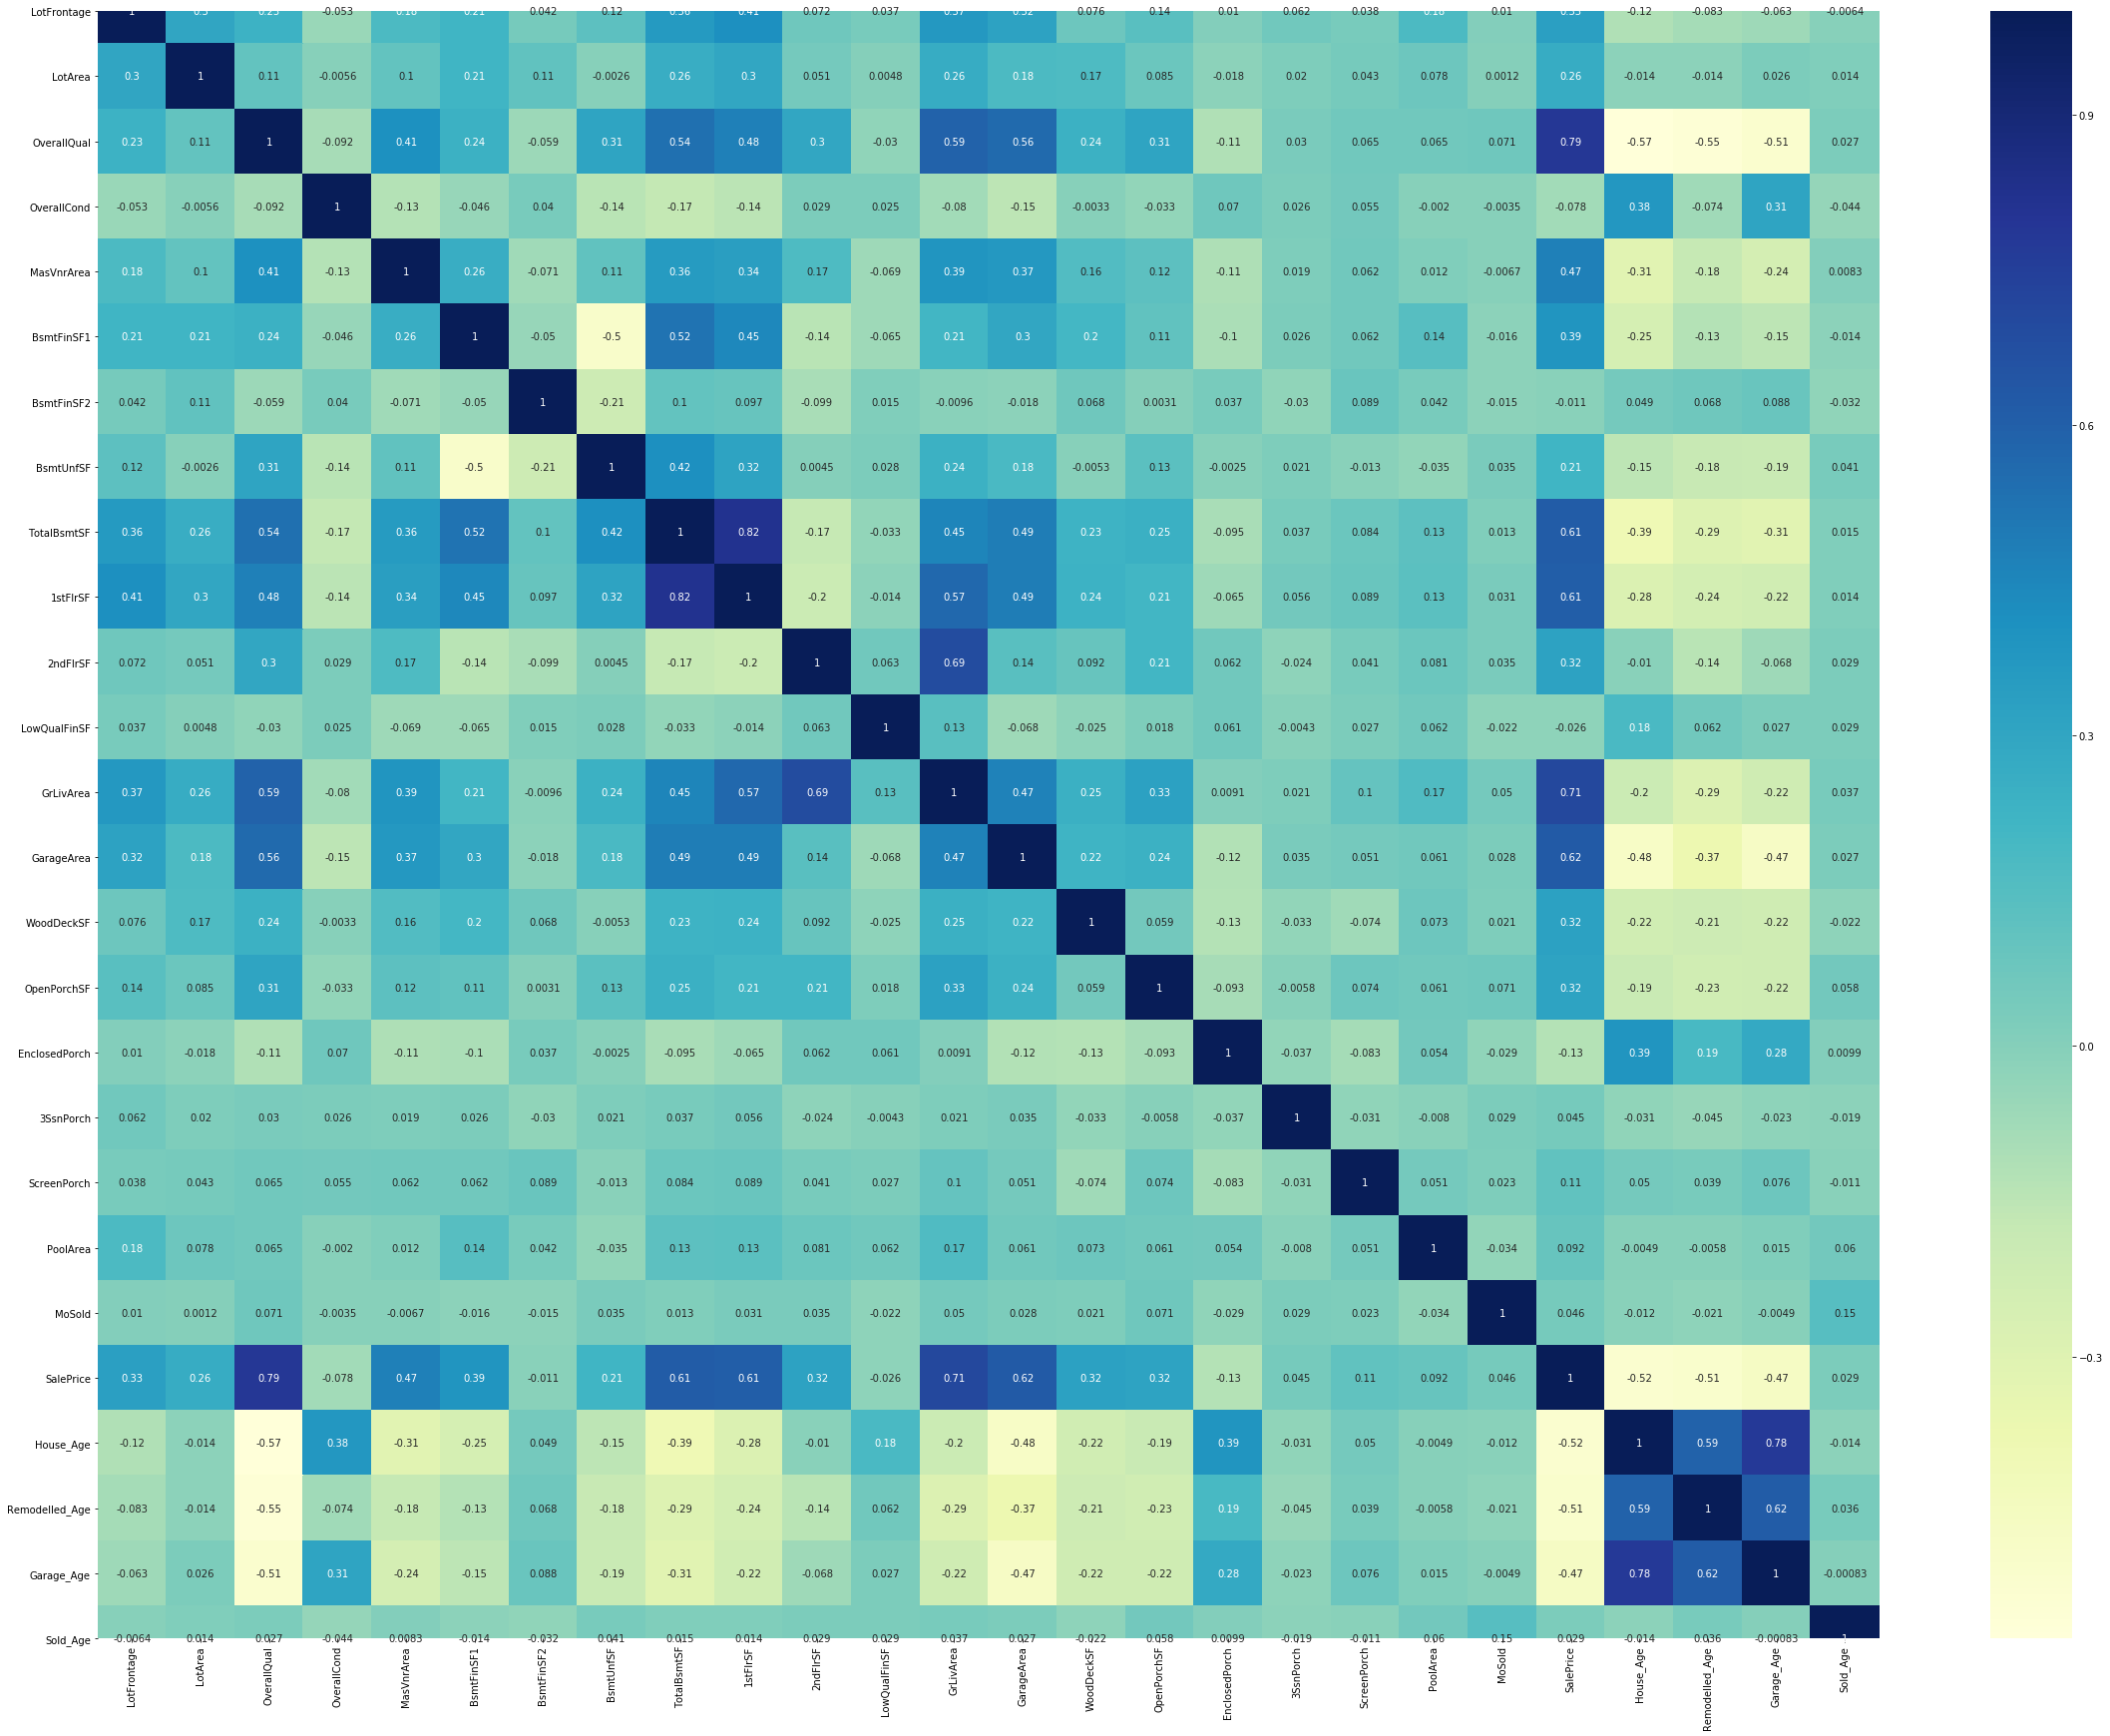

In [169]:
# Plotting correlations on a heatmap

plt.figure(figsize=(40,30))

sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**We find some correlation between the variables. Very light and very dark squares indicate collinearity between the variables.**

<Figure size 2880x2160 with 0 Axes>

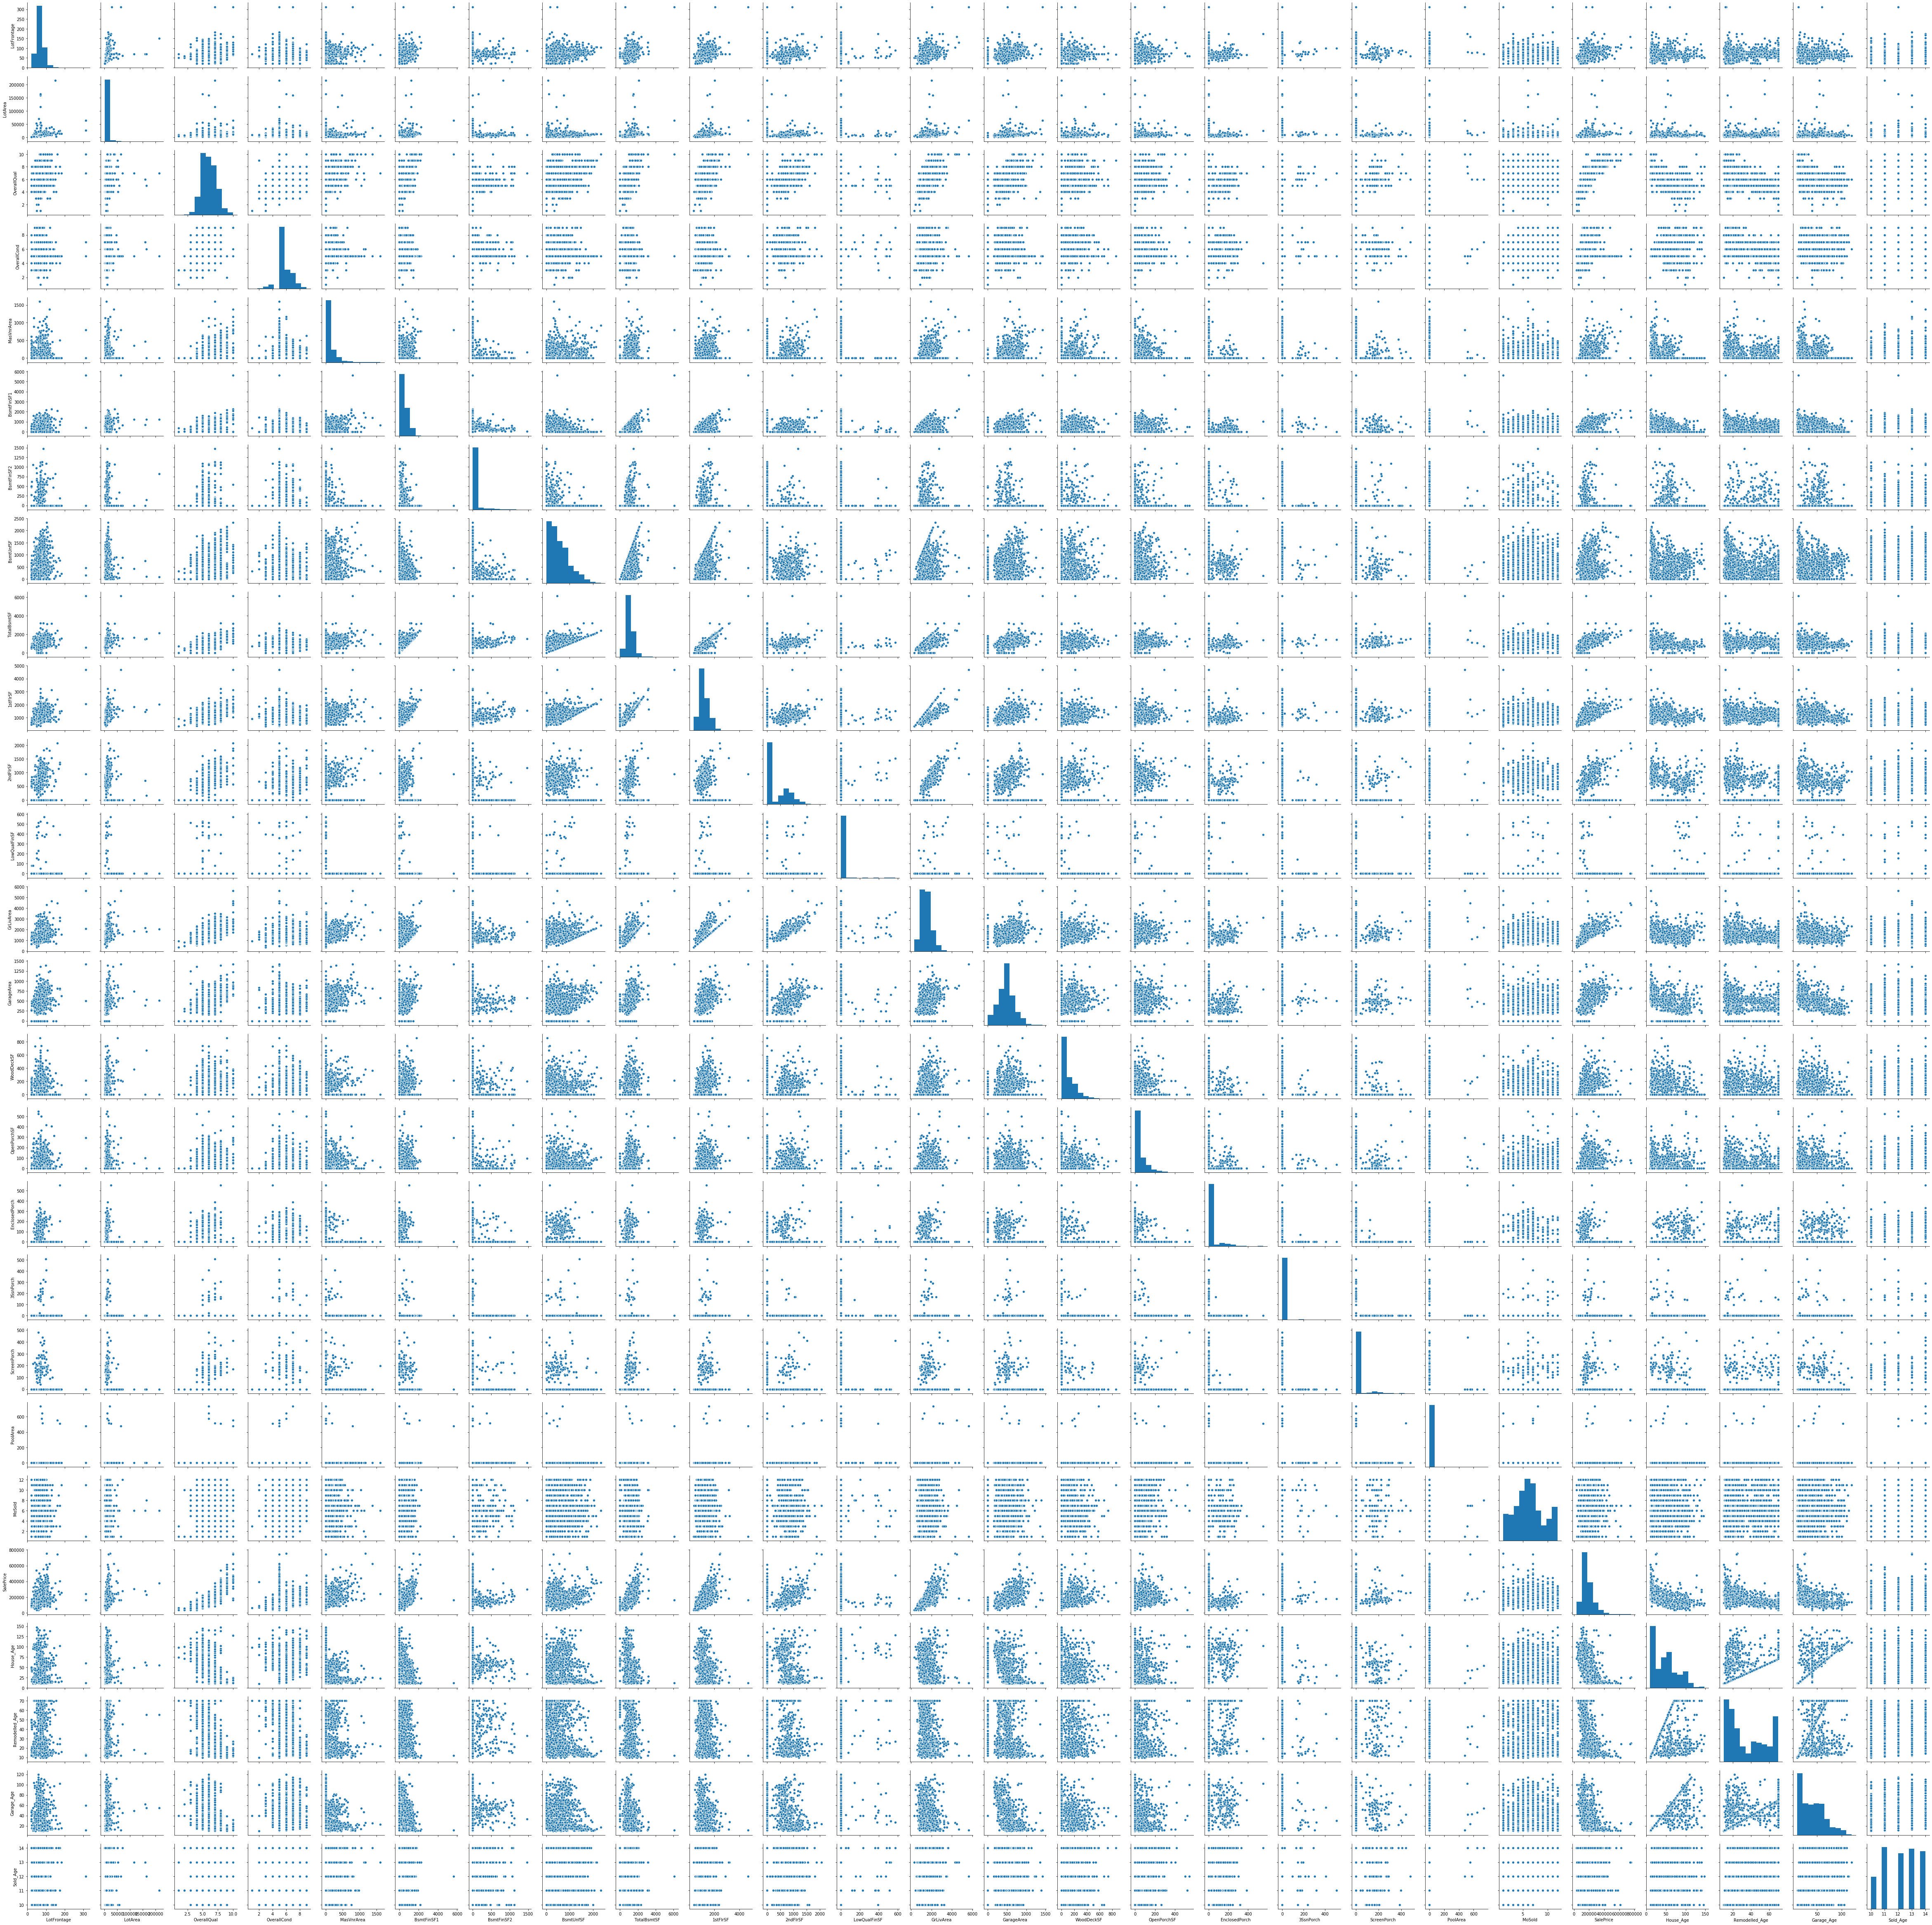

In [170]:
# Lets check for the presence of any linear relationships using pair plot

plt.figure(figsize=(40,30))
sns.pairplot(num_vars)
plt.show()

# Data Preparation

**Let's now prepare the data and build the model.**

In [171]:
# List of categorical columns

cat_vars = housing_data_1.select_dtypes(include=['object'])
cat_vars.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [172]:
# Creating a dummy variables for categorical columns

housing_data_2 = pd.get_dummies(data = housing_data_1, columns = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 
                                                                  'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                                                                  'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 
                                                                  'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
                                                                  'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                                                  'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 
                                                                  'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                                                                  'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 
                                                                  'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 
                                                                  'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 
                                                                  'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'])
housing_data_2.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450            7            5       196.0         706   
1   2         80.0     9600            6            8         0.0         978   
2   3         68.0    11250            7            5       162.0         486   
3   4         60.0     9550            7            5         0.0         216   
4   5         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       1710         548           0           61              0          0   
1       1262         460         298            0              0          0   
2       1786         608           0           42              0          0   
3       1717         642           0           35            272          0   
4       2198         836         192           84              0          0   

   ScreenPorch  PoolArea  MoSold  SalePrice  House_Age  Remodelled_Age  \
0            0         0       2     208500         17              17   
1            0         0       5     181500         44              44   
2            0         0       9     223500         19              18   
3            0         0       2     140000        105              50   
4            0         0      12     250000         20              20   

   Garage_Age  Sold_Age  MSSubClass_20  MSSubClass_30  MSSubClass_40  \
0          17        12              0              0              0   
1          44        13              1              0              0   
2          19        12              0              0              0   
3          22        14              0              0              0   
4          20        12              0              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_Other  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_RL  MSZoning_RM  Alley_Grvl & Pave  Alley_Not Present  \
0            1            0                  0                  1   
1            1            0                  0                  1   
2            1            0                  0                  1   
3            1            0                  0                  1   
4            1            0                  0                  1   

   L

In [173]:
housing_data_2.shape

(1460, 230)

# Dividing the data into Train and Test sets

**I am dividing the data in 70:30 train and test sets.**

In [174]:
# Splitting the data into train and test
# Setting the seed value to a constant so that we get the same output always 

from sklearn.model_selection import train_test_split

housing_data_train, housing_data_test = train_test_split(housing_data_2, train_size = 0.7, random_state = 10)

In [175]:
# Lets check the shape of train and test data 

print(housing_data_train.shape)
print(housing_data_test.shape)

(1021, 230)
(439, 230)


# Scaling the train data

Here, we can see that except for dummy columns that we have created, few other columns have varied integer or float values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

In [176]:
# I'm using Standard scaling
# Applying Standard scaler to all numeric columns except the 'dummy' variables in our train set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_data_train[['LotFrontage', 'LotArea', 
                    'OverallQual', 'OverallCond', 
                    'MasVnrArea', 'BsmtFinSF1', 
                    'BsmtFinSF2', 'BsmtUnfSF', 
                    'TotalBsmtSF', '1stFlrSF', 
                    '2ndFlrSF', 'LowQualFinSF', 
                    'GrLivArea', 'GarageArea', 
                    'WoodDeckSF', 'OpenPorchSF', 
                    'EnclosedPorch', '3SsnPorch', 
                    'ScreenPorch', 'PoolArea', 
                    'MoSold', 'House_Age', 
                    'Remodelled_Age', 
                    'Garage_Age', 'Sold_Age']] = scaler.fit_transform(housing_data_train[['LotFrontage', 'LotArea', 
                                                                                          'OverallQual', 'OverallCond', 
                                                                                          'MasVnrArea', 'BsmtFinSF1', 
                                                                                          'BsmtFinSF2', 'BsmtUnfSF', 
                                                                                          'TotalBsmtSF', '1stFlrSF', 
                                                                                          '2ndFlrSF', 'LowQualFinSF', 
                                                                                          'GrLivArea', 'GarageArea', 
                                                                                          'WoodDeckSF', 'OpenPorchSF', 
                                                                                          'EnclosedPorch', '3SsnPorch', 
                                                                                          'ScreenPorch', 'PoolArea', 'MoSold', 
                                                                                          'House_Age', 'Remodelled_Age', 
                                                                                          'Garage_Age', 'Sold_Age']])

housing_data_train.head()

Id  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
373  374     0.389172 -0.004609    -0.832826     0.403827   -0.571480   
20    21     1.342245  0.312166     1.353075    -0.516502    1.464132   
800  801     0.389172  0.186819    -0.104193    -0.516502   -0.571480   
152  153    -0.044043  0.364181    -0.104193    -0.516502    0.778452   
906  907     1.992068  0.249006     1.353075    -0.516502    0.542749   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
373   -0.041165    0.925579  -1.299892    -1.028179  0.384065 -0.798351   
20    -0.955310   -0.272152   1.315091     0.212471 -0.024777  1.993276   
800    0.031454   -0.272152  -0.952131    -1.010133 -1.401126  1.658647   
152   -0.066795   -0.272152  -0.376293    -0.538686 -0.179680  1.255260   
906   -0.820752   -0.272152   2.222883     1.261385  1.189051 -0.798351   

     LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
373     -0.130937  -0.382618   -0.965246   -0.237765    -0.719179   
20      -0.130937   1.598908    1.735331    1.150242     1.607461   
800     -0.130937   0.309135    0.577279    2.450502     1.003139   
152     -0.130937   0.880910    0.077001   -0.764250     0.277953   
906     -0.130937   0.211652    1.790917   -0.764250     0.187304   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MoSold  SalePrice  \
373      -0.354169  -0.120151    -0.267278 -0.069308  1.712414     123000   
20       -0.354169  -0.120151    -0.267278 -0.069308  1.712414     325300   
800       2.641544  -0.120151    -0.267278 -0.069308 -0.482199     200000   
152      -0.354169  -0.120151    -0.267278 -0.069308 -0.116430     190000   
906      -0.354169  -0.120151    -0.267278 -0.069308 -0.116430     255000   

     House_Age  Remodelled_Age  Garage_Age  Sold_Age  MSSubClass_20  \
373   0.614650        1.551504    1.085483 -0.884655              1   
20   -1.101522       -1.020300   -1.078472  1.400083              0   
800  -0.837495       -0.583579   -0.745556 -0.123076              0   
152   0.020591        0.678061    0.336421  1.400083              0   
906  -1.134525       -1.020300   -1.120087  0.638503              1   

     MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
373              0              0              0              0   
20               0              0              0              0   
800              0              0              0              0   
152              0              0              0              0   
906              0              0              0              0   

     MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
373              0              0              0              0   
20               1              0              0              0   
800              1              0              0              0   
152              1              0              0              0   
906              0              0              0              0   

     MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
373              0              0               0               0   
20               0              0               0               0   
800              0              0               0               0   
152              0              0               0               0   
906              0              0               0               0   

     MSSubClass_180  MSSubClass_190  MSZoning_Other  MSZoning_RL  MSZoning_RM  \
373               0               0               0            1            0   
20                0               0               0            1            0   
800               0               0               0            1            0   
152               0               0               0            1            0   
906               0               0               0            1            0   

     Alley_Grvl & Pave  Alley_Not Present  LotShape_IR1  LotShape_IR2 & IR3  \
373                  0  

# Dividing into X and Y sets for model building

In [177]:
X_train = housing_data_train.drop(['Id', 'SalePrice'], axis=1)

X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
373     0.389172 -0.004609    -0.832826     0.403827   -0.571480   -0.041165   
20      1.342245  0.312166     1.353075    -0.516502    1.464132   -0.955310   
800     0.389172  0.186819    -0.104193    -0.516502   -0.571480    0.031454   
152    -0.044043  0.364181    -0.104193    -0.516502    0.778452   -0.066795   
906     1.992068  0.249006     1.353075    -0.516502    0.542749   -0.820752   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
373    0.925579  -1.299892    -1.028179  0.384065 -0.798351     -0.130937   
20    -0.272152   1.315091     0.212471 -0.024777  1.993276     -0.130937   
800   -0.272152  -0.952131    -1.010133 -1.401126  1.658647     -0.130937   
152   -0.272152  -0.376293    -0.538686 -0.179680  1.255260     -0.130937   
906   -0.272152   2.222883     1.261385  1.189051 -0.798351     -0.130937   

     GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
373  -0.382618   -0.965246   -0.237765    -0.719179      -0.354169  -0.120151   
20    1.598908    1.735331    1.150242     1.607461      -0.354169  -0.120151   
800   0.309135    0.577279    2.450502     1.003139       2.641544  -0.120151   
152   0.880910    0.077001   -0.764250     0.277953      -0.354169  -0.120151   
906   0.211652    1.790917   -0.764250     0.187304      -0.354169  -0.120151   

     ScreenPorch  PoolArea    MoSold  House_Age  Remodelled_Age  Garage_Age  \
373    -0.267278 -0.069308  1.712414   0.614650        1.551504    1.085483   
20     -0.267278 -0.069308  1.712414  -1.101522       -1.020300   -1.078472   
800    -0.267278 -0.069308 -0.482199  -0.837495       -0.583579   -0.745556   
152    -0.267278 -0.069308 -0.116430   0.020591        0.678061    0.336421   
906    -0.267278 -0.069308 -0.116430  -1.134525       -1.020300   -1.120087   

     Sold_Age  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
373 -0.884655              1              0              0              0   
20   1.400083              0              0              0              0   
800 -0.123076              0              0              0              0   
152  1.400083              0              0              0              0   
906  0.638503              1              0              0              0   

     MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
373              0              0              0              0   
20               0              1              0              0   
800              0              1              0              0   
152              0              1              0              0   
906              0              0              0              0   

     MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
373              0              0              0               0   
20               0              0              0               0   
800              0              0              0               0   
152              0              0              0               0   
906              0              0              0               0   

     MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_Other  \
373               0               0               0               0   
20                0               0               0               0   
800               0               0               0               0   
152               0               0               0               0   
906               0               0               0               0   

     MSZoning_RL  MSZoning_RM  Alley_Grvl & Pave  Alley_Not Present  \
373            1            0                  0                  1   
20             1            0                  0                  1   
800            1            0                  0                  1   
152            1            0                  0                  1   
906            1            0             

In [178]:
X_test = housing_data_test.drop(['Id', 'SalePrice'], axis=1)

X_test.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
854        102.0    17920            5            4         0.0         306   
381         60.0     7200            7            5         0.0           0   
816         69.0    11425            5            6         0.0         486   
577         96.0    11777            5            6        97.0         328   
35         108.0    13418            8            5       132.0           0   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
854        1085        372         1763      1779         0             0   
381           0       1293         1293      1301         0             0   
816           0        522         1008      1008         0             0   
577         551        285         1164      1320         0             0   
35            0       1117         1117      1132      1320             0   

     GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
854       1779         454           0          418              0          0   
381       1301         572         216          121              0          0   
816       1008         275           0            0            120          0   
577       1320         564         160           68            240          0   
35        2452         691         113           32              0          0   

     ScreenPorch  PoolArea  MoSold  House_Age  Remodelled_Age  Garage_Age  \
854          312         0       7         65              46          65   
381            0         0       8         14              14          14   
816            0         0       7         66              66          66   
577            0         0       5         54              54          54   
35             0         0       9         16              15          16   

     Sold_Age  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
854        14              1              0              0              0   
381        14              1              0              0              0   
816        14              1              0              0              0   
577        14              0              0              0              0   
35         14              0              0              0              0   

     MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
854              0              0              0              0   
381              0              0              0              0   
816              0              0              0              0   
577              0              0              0              0   
35               0              1              0              0   

     MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
854              0              0              0               0   
381              0              0              0               0   
816              0              0              0               0   
577              1              0              0               0   
35               0              0              0               0   

     MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_Other  \
854               0               0               0               0   
381               0               0               0               1   
816               0               0               0               0   
577               0               0               0               0   
35                0               0               0               0   

     MSZoning_RL  MSZoning_RM  Alley_Grvl & Pave  Alley_Not Present  \
854            1            0                  0                  1   
381            0            0                  1                  0   
816            1            0                  0                  1   
577            1            0                  0                  1   
35             1            0                  0            

## Checking the distribution of target variable

**This is important for two reasons:**
- **To take care of outliers. If the distribution is not normal, it indicates the presence of outliers in that variable and hence, the curve will get skewed in one direction. To overcome this, we need to transform the variable and make it normally distributed.**
- **We will not be able to apply hypothesis testing if it is not normally distributed.**

**We need to transform our target variable using logarithmic function and prevent the skewness.**

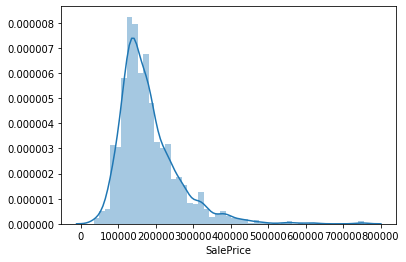

In [179]:
# Checking the distribution of target variable

sns.distplot(housing_data_1['SalePrice'])

**Our target variable is skewed towards right indicating the presence of  outliers. We need to transform it. Therefore, applying logarithmic function to the target variable will be useful to transform the variable before moving on to further analysis.**

In [180]:
# Transforming our train data target variable by applying logarithmic function and assigning it to variable 'y_train'

y_train = np.log(housing_data_train.SalePrice)
y_train.head()

373    11.719940
20     12.692503
800    12.206073
152    12.154779
906    12.449019
Name: SalePrice, dtype: float64

In [181]:
# Transforming our test data target variable by applying logarithmic function and assigning it to variable 'y_test'

y_test = np.log(housing_data_test.SalePrice)
y_test.head()

854    12.043554
381    12.142867
816    11.827736
577    12.010666
35     12.641097
Name: SalePrice, dtype: float64

# Scaling the test data

In [182]:
# Applying Standard scaler to all numeric columns except the 'dummy' variables in our test set

X_test[['LotFrontage', 'LotArea', 
        'OverallQual', 'OverallCond', 
        'MasVnrArea', 'BsmtFinSF1', 
        'BsmtFinSF2', 'BsmtUnfSF', 
        'TotalBsmtSF', '1stFlrSF', 
        '2ndFlrSF', 'LowQualFinSF', 
        'GrLivArea', 'GarageArea', 
        'WoodDeckSF', 'OpenPorchSF', 
        'EnclosedPorch', '3SsnPorch', 
        'ScreenPorch', 'PoolArea', 
        'MoSold', 'House_Age', 
        'Remodelled_Age', 
        'Garage_Age', 'Sold_Age']] = scaler.transform(X_test[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
                                                              'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                                              'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                                                              'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                                                              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                                                              'MoSold', 'House_Age', 'Remodelled_Age','Garage_Age','Sold_Age']])

X_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
854     1.385567  0.639910    -0.832826    -1.436830   -0.571480   -0.301739   
381    -0.433936 -0.308380     0.624441    -0.516502   -0.571480   -0.955310   
816    -0.044043  0.065363    -0.832826     0.403827   -0.571480    0.082715   
577     1.125638  0.096501    -0.832826     0.403827   -0.051864   -0.254750   
35      1.645496  0.241664     1.353075    -0.516502    0.135627   -0.955310   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
854    6.947505  -0.459846     1.577186  1.552184 -0.798351     -0.130937   
381   -0.272152   1.619947     0.516995  0.338356 -0.798351     -0.130937   
816   -0.272152  -0.121117    -0.125888 -0.405686 -0.798351     -0.130937   
577    3.394236  -0.656308     0.226006  0.386604 -0.798351     -0.130937   
35    -0.272152   1.222505     0.119987 -0.090801  2.227057     -0.130937   

     GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
854   0.479730   -0.112920   -0.764250     5.595987      -0.354169  -0.120151   
381  -0.416362    0.433681    0.958793     1.108895      -0.354169  -0.120151   
816  -0.965641   -0.942085   -0.764250    -0.719179       1.588996  -0.120151   
577  -0.380744    0.396623    0.512078     0.308169       3.532162  -0.120151   
35    1.741383    0.984913    0.137157    -0.235721      -0.354169  -0.120151   

     ScreenPorch  PoolArea    MoSold  House_Age  Remodelled_Age  Garage_Age  \
854     5.815586 -0.069308  0.249339   0.548644        0.532488    1.002254   
381    -0.267278 -0.069308  0.615108  -1.134525       -1.020300   -1.120087   
816    -0.267278 -0.069308  0.249339   0.581647        1.502980    1.043868   
577    -0.267278 -0.069308 -0.482199   0.185607        0.920684    0.544494   
35     -0.267278 -0.069308  0.980876  -1.068518       -0.971775   -1.036858   

     Sold_Age  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
854  1.400083              1              0              0              0   
381  1.400083              1              0              0              0   
816  1.400083              1              0              0              0   
577  1.400083              0              0              0              0   
35   1.400083              0              0              0              0   

     MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
854              0              0              0              0   
381              0              0              0              0   
816              0              0              0              0   
577              0              0              0              0   
35               0              1              0              0   

     MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
854              0              0              0               0   
381              0              0              0               0   
816              0              0              0               0   
577              1              0              0               0   
35               0              0              0               0   

     MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_Other  \
854               0               0               0               0   
381               0               0               0               1   
816               0               0               0               0   
577               0               0               0               0   
35                0               0               0               0   

     MSZoning_RL  MSZoning_RM  Alley_Grvl & Pave  Alley_Not Present  \
854            1            0                  0                  1   
381            0            0                  1                  0   
816            1            0                  0                  1   
577            1            0                  0                  1   
35             1            0             

# Ridge Regression

In [183]:
# Let's import the required from sklearn to build Ridge and Lasso regression

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

In [184]:
# List of alphas to tune
# The range alpha values I'm taking is from 0.0001-1000 
# We do this to understand how the model behaves with different values of alpha 
# Monitoring the model based on the score of 'neg_mean_absolute_error'. Larger the score, better  the model
# We get 5 scores for each values of alpha, average values will be calculated

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                    8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross validation

folds = 5
Model_1 = GridSearchCV(estimator = ridge, 
                       param_grid = params, 
                       scoring= 'neg_mean_absolute_error', 
                       cv = folds, 
                       return_train_score=True, 
                       verbose = 1)    

Model_1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [185]:
# Checking the results of our model

Model_1_results = pd.DataFrame(Model_1.cv_results_)
Model_1_results = Model_1_results[Model_1_results['param_alpha']<=200]
Model_1_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.024800      0.029673         0.002392        0.001953      0.0001   
1       0.012000      0.003578         0.002399        0.001959       0.001   
2       0.013601      0.001961         0.002399        0.001959        0.01   
3       0.013600      0.003199         0.002400        0.001960        0.05   
4       0.009601      0.001960         0.000800        0.001600         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.107639          -0.097083          -0.107622   
1   {'alpha': 0.001}          -0.107638          -0.097080          -0.107613   
2    {'alpha': 0.01}          -0.107629          -0.097051          -0.107520   
3    {'alpha': 0.05}          -0.107580          -0.096931          -0.107140   
4     {'alpha': 0.1}          -0.107507          -0.096797          -0.106721   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.104415          -0.104300        -0.104215        0.003853   
1          -0.104408          -0.104296        -0.104210        0.003852   
2          -0.104335          -0.104256        -0.104162        0.003844   
3          -0.104027          -0.104085        -0.103956        0.003812   
4          -0.103697          -0.103885        -0.103725        0.003776   

   rank_test_score  split0_train_score  split1_train_score  \
0               27           -0.074620           -0.076836   
1               26           -0.074619           -0.076836   
2               25           -0.074619           -0.076833   
3               24           -0.074620           -0.076819   
4               23           -0.074620           -0.076812   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.067793           -0.072531           -0.076558   
1           -0.067792           -0.072531           -0.076557   
2           -0.067784           -0.072535           -0.076551   
3           -0.067748           -0.072547           -0.076527   
4           -0.067711           -0.072556           -0.076503   

   mean_train_score  std_train_score  
0         -0.073667         0.003320  
1         -0.073667         0.003320  
2         -0.073664         0.003321  
3         -0.073652         0.003326  
4         -0.073641         0.003333

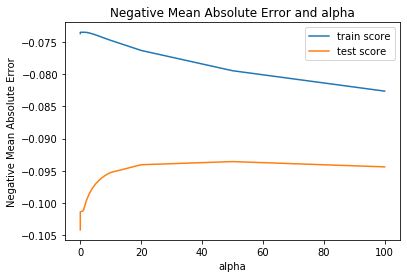

In [186]:
# Plotting mean test and train scores with alpha 

Model_1_results['param_alpha'] = Model_1_results['param_alpha'].astype('int32')

# Plotting

plt.plot(Model_1_results['param_alpha'], Model_1_results['mean_train_score'])
plt.plot(Model_1_results['param_alpha'], Model_1_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [187]:
# Checking the value of optimum alpha

print(Model_1.best_params_)
print(Model_1.best_score_)

{'alpha': 50}
-0.09358941259046387


**We see from the plot that the test negative mean absolute error first increases and then decreases, forming a bell curve. But the training negative mean absolute error keeps on decreasing as we increase the value of the hyperparameter, which is in accordance with the bias-variance trade-off. The alpha value at which the test curve reaches maximum is considered as the optimum alpha value.**

**From the above graph and the bestparam we got optimum lambda to be 50. The alpha parameter in Scikit-Learn is nothing but theory hyperparameter lambda.**

In [188]:
alpha = 50
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.56533133e-03,  2.05748244e-02,  8.57410232e-02,  4.27412028e-02,
        1.85271853e-03, -1.88983375e-03,  5.67995585e-03,  2.18502908e-03,
        2.11225269e-03,  3.50338061e-02,  3.75554246e-02,  5.49695080e-03,
        5.71331566e-02,  2.54014837e-02,  1.94904580e-02,  7.35066320e-03,
        8.93155214e-03,  7.48511894e-03,  1.61840747e-02, -7.98896033e-03,
        2.26384460e-03, -3.60555845e-02, -1.98310342e-02,  4.11531046e-03,
        7.75050879e-03,  2.94003555e-02, -2.64985419e-02,  4.55395916e-04,
        3.12584839e-03,  2.37413560e-03, -7.41392988e-03,  1.60964134e-02,
        4.76762124e-03,  4.82334443e-03,  4.30823981e-03, -8.86066868e-05,
        6.54297182e-03, -2.70837477e-02, -1.13302271e-02,  5.20727023e-04,
        4.80884958e-03,  2.03778209e-02, -2.51866704e-02,  1.53455572e-03,
       -1.53455572e-03,  2.98267149e-03, -5.00172117e-06, -2.97766977e-03,
        8.13963370e-03, -8.13963370e-03, -6.93703789e-04,  2.11399404e-02,
       -1.16786045e-02, -

In [189]:
# Lets predict the R-squared value of train data

y_train_predicted = ridge.predict(X_train)

print(metrics.r2_score(y_true = y_train, y_pred = y_train_predicted))

0.9017845549483919


In [190]:
# Lets predict the R-squared value of test data

y_test_predicted = ridge.predict(X_test)

print(metrics.r2_score(y_true = y_test, y_pred = y_test_predicted))

0.8987783537162957


In [191]:
from sklearn.metrics import mean_squared_error

print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_train_predicted))))

RMSE Train 0.12372226294973095


In [192]:
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_test_predicted))))

RMSE Test 0.13016587337344132


**The R-squared values of train and test are within the range of 5% deviation.** 

In [193]:
# Ridge model parameters

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.913),
 ('LotFrontage', -0.007),
 ('LotArea', 0.021),
 ('OverallQual', 0.086),
 ('OverallCond', 0.043),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', -0.002),
 ('BsmtFinSF2', 0.006),
 ('BsmtUnfSF', 0.002),
 ('TotalBsmtSF', 0.002),
 ('1stFlrSF', 0.035),
 ('2ndFlrSF', 0.038),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.057),
 ('GarageArea', 0.025),
 ('WoodDeckSF', 0.019),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.016),
 ('PoolArea', -0.008),
 ('MoSold', 0.002),
 ('House_Age', -0.036),
 ('Remodelled_Age', -0.02),
 ('Garage_Age', 0.004),
 ('Sold_Age', 0.008),
 ('MSSubClass_20', 0.029),
 ('MSSubClass_30', -0.026),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.003),
 ('MSSubClass_50', 0.002),
 ('MSSubClass_60', -0.007),
 ('MSSubClass_70', 0.016),
 ('MSSubClass_75', 0.005),
 ('MSSubClass_80', 0.005),
 ('MSSubClass_85', 0.004),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', 0.007),
 ('MSSubClass_160', -0.027),
 ('MSSubClass_180', -0.0

In [194]:
# Pulling out the features and coefficients obtained above

ridge_features = []
ridge_coefficients = []
for i in list(zip(cols, model_parameters)):
    a = i[0]
    b = i[1]
    ridge_features.append(a)
    ridge_coefficients.append(b)

In [195]:
# Creating a dataframe for the above mentioned columns

ridge_features_df = pd.DataFrame({'Ridge_Feature':ridge_features})
ridge_coeff_df = pd.DataFrame({'Ridge_Coeff':ridge_coefficients})
ridge_df_1 = pd.concat([ridge_features_df, ridge_coeff_df], axis = 1)
ridge_df_1.head()

Ridge_Feature  Ridge_Coeff
0      constant       11.913
1   LotFrontage       -0.007
2       LotArea        0.021
3   OverallQual        0.086
4   OverallCond        0.043

In [196]:
# Sorting the dataframe to find out the top features which affect the target variable

ridge_df_1.sort_values(by = ('Ridge_Coeff'), ascending = False)

Ridge_Feature  Ridge_Coeff
0                          constant       11.913
3                       OverallQual        0.086
13                        GrLivArea        0.057
62             Neighborhood_Crawfor        0.044
4                       OverallCond        0.043
82                  Condition1_Norm        0.039
11                         2ndFlrSF        0.038
71             Neighborhood_NridgHt        0.036
10                         1stFlrSF        0.035
206                    GarageCars_3        0.033
124                     BsmtQual_Ex        0.033
170             KitchenQual_Ex & Fa        0.033
181                 TotRmsAbvGrd_10        0.032
77             Neighborhood_Somerst        0.032
84                    BldgType_1Fam        0.030
78             Neighborhood_StoneBr        0.029
26                    MSSubClass_20        0.029
157                  BsmtFullBath_1        0.027
168                  BedroomAbvGr_4        0.027
131                     BsmtCond_TA        0.026
163                  FullBath_3 & 0        0.026
14                       GarageArea        0.025
226            SaleCondition_Normal        0.023
133                 BsmtExposure_Gd        0.022
194               GarageType_Attchd        0.022
59             Neighborhood_BrkSide        0.021
2                           LotArea        0.021
52                LotConfig_CulDSac        0.021
152                    CentralAir_Y        0.021
180                  TotRmsAbvGrd_9        0.020
42                      MSZoning_RL        0.020
123                Foundation_PConc        0.020
70             Neighborhood_NoRidge        0.019
96              Exterior1st_BrkFace        0.019
15                       WoodDeckSF        0.019
146                BsmtFinType2_Unf        0.019
186                  Functional_Typ        0.019
147                    HeatingQC_Ex        0.018
189                Fireplaces_2 & 3        0.017
56              LandSlope_Mod & Sev        0.017
19                      ScreenPorch        0.016
32                    MSSubClass_70        0.016
223                  SaleType_Other        0.016
165                  HalfBath_1 & 2        0.016
222                    SaleType_New        0.015
119                    ExterCond_TA        0.014
210                GarageQual_Other        0.014
190                  FireplaceQu_Gd        0.014
136                BsmtFinType1_ALQ        0.013
138                BsmtFinType1_GLQ        0.013
228           SaleCondition_Partial        0.013
178                  TotRmsAbvGrd_7        0.011
115                    ExterQual_Gd        0.011
137                BsmtFinType1_BLQ        0.011
217                    PavedDrive_Y        0.011
215                   GarageCond_TA        0.011
60             Neighborhood_ClearCr        0.011
179                  TotRmsAbvGrd_8        0.010
214                GarageCond_Other        0.010
200                GarageFinish_Fin        0.010
202                GarageFinish_RFn        0.009
17                    EnclosedPorch        0.009
25                         Sold_Age        0.008
102             Exterior1st_VinylSd        0.008
192               FireplaceQu_Other        0.008
49                  LandContour_Lvl        0.008
89                HouseStyle_1Story        0.008
16                      OpenPorchSF        0.007
106             Exterior2nd_MetalSd        0.007
18                        3SsnPorch        0.007
162                      FullBath_2        0.007
37                   MSSubClass_120        0.007
101             Exterior1st_Plywood        0.006
99              Exterior1st_MetalSd        0.006
177                  TotRmsAbvGrd_6        0.006
110             Exterior2nd_Wd Sdng        0.006
7                        BsmtFinSF2        0.006
79              Neighborhood_Timber        0.005
41                   MSZoning_Other        0.005
33                    MSSubClass_75        0.005
12                     LowQualFinSF        0.005
34  

# Lasso Regression

In [197]:
lasso = Lasso()

# Cross validation

Model_2 = GridSearchCV(estimator = lasso, 
                       param_grid = params, 
                       scoring= 'neg_mean_absolute_error', 
                       cv = folds, 
                       return_train_score=True, 
                       verbose = 1)            

Model_2.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [198]:
# Cheking the results of our model

Model_2_results = pd.DataFrame(Model_2.cv_results_)
Model_2_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.229681      0.020327         0.003199        0.001600      0.0001   
1       0.039199      0.004664         0.001600        0.001960       0.001   
2       0.011200      0.001600         0.002400        0.001959        0.01   
3       0.010400      0.001959         0.000800        0.001599        0.05   
4       0.008001      0.000001         0.003199        0.001600         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.105100          -0.094664          -0.101194   
1   {'alpha': 0.001}          -0.099368          -0.095992          -0.088252   
2    {'alpha': 0.01}          -0.108134          -0.116910          -0.102461   
3    {'alpha': 0.05}          -0.148469          -0.147365          -0.128531   
4     {'alpha': 0.1}          -0.192206          -0.174076          -0.163141   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.099966          -0.100292        -0.100248        0.003339   
1          -0.091516          -0.094688        -0.093969        0.003809   
2          -0.100825          -0.096802        -0.105030        0.006965   
3          -0.123582          -0.109846        -0.131575        0.014699   
4          -0.159035          -0.134521        -0.164623        0.018930   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.074457           -0.076557   
1                1           -0.079407           -0.080495   
2                3           -0.103182           -0.100912   
3                4           -0.132443           -0.129976   
4                5           -0.166936           -0.161844   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.067520           -0.072650           -0.076183   
1           -0.073021           -0.078207           -0.080559   
2           -0.091938           -0.099335           -0.103350   
3           -0.119658           -0.128735           -0.133363   
4           -0.156932           -0.161906           -0.164877   

   mean_train_score  std_train_score  
0         -0.073473         0.003285  
1         -0.078338         0.002793  
2         -0.099743         0.004178  
3         -0.128835         0.004879  
4         -0.162499         0.003380

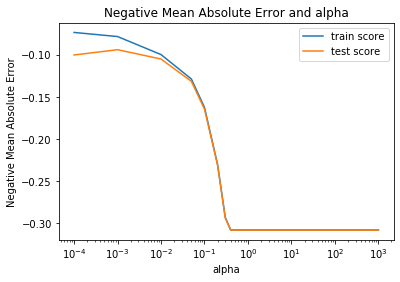

In [199]:
# Plotting mean test and train scores with alpha 

Model_2_results['param_alpha'] = Model_2_results['param_alpha'].astype('float32')

# Plotting

plt.plot(Model_2_results['param_alpha'], Model_2_results['mean_train_score'])
plt.plot(Model_2_results['param_alpha'], Model_2_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xscale('log')
plt.show()

In [200]:
# Checking the value of optimum number of parameters

print(Model_2.best_params_)
print(Model_2.best_score_)

{'alpha': 0.001}
-0.09396858678852005


**From the above graph and the bestparam we got optimum lambda to be 0.001. The alpha parameter in Scikit-Learn is nothing but theory hyperparameter lambda.**

In [201]:
alpha = 0.001
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-5.70819470e-03,  2.29600776e-02,  9.33133564e-02,  4.49530984e-02,
       -1.13109076e-03, -2.39547498e-04,  3.63082865e-03,  3.35146538e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.06768982e-01,  2.30782690e-02,  2.08850283e-02,  6.09455903e-03,
        8.73520778e-03,  6.11859590e-03,  1.61604652e-02, -6.28356717e-03,
        7.00305625e-04, -4.51125637e-02, -1.85250324e-02,  9.05973059e-04,
        7.37600537e-03,  3.16630431e-02, -3.67434416e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -3.60390629e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.12667942e-02, -2.14632228e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        6.57871937e-03, -2.39765152e-18,  0.00000000e+00,  3.11902171e-02,
       -0.00000000e+00, -

In [202]:
# Lets predict the R-squared value of train data

y_train_predicted = lasso.predict(X_train)

print(metrics.r2_score(y_true = y_train, y_pred = y_train_predicted))

0.9016162885227511


In [203]:
# Lets predict the R-squared value of test data

y_test_predicted = lasso.predict(X_test)

print(metrics.r2_score(y_true = y_test, y_pred = y_test_predicted))

0.8987079768344941


In [204]:
from sklearn.metrics import mean_squared_error

print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_train_predicted))))

RMSE Train 0.12382820043187176


In [205]:
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_test_predicted))))

RMSE Test 0.13021111605066812


**The R-squared values of train and test are within the range of 5% deviation.** 

In [206]:
# Lasso model parameters

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.874),
 ('LotFrontage', -0.006),
 ('LotArea', 0.023),
 ('OverallQual', 0.093),
 ('OverallCond', 0.045),
 ('MasVnrArea', -0.001),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.004),
 ('BsmtUnfSF', 0.003),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.107),
 ('GarageArea', 0.023),
 ('WoodDeckSF', 0.021),
 ('OpenPorchSF', 0.006),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.016),
 ('PoolArea', -0.006),
 ('MoSold', 0.001),
 ('House_Age', -0.045),
 ('Remodelled_Age', -0.019),
 ('Garage_Age', 0.001),
 ('Sold_Age', 0.007),
 ('MSSubClass_20', 0.032),
 ('MSSubClass_30', -0.037),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', -0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.036),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', 

In [207]:
# Finding out the number of variables selected by lasso regression

print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))

Number of non-zero Coefficients 100


In [208]:
# Pulling out the features and coefficients obtained above

lasso_features = []
lasso_coefficients = []
for i in list(zip(cols, model_parameters)):
    a = i[0]
    b = i[1]
    lasso_features.append(a)
    lasso_coefficients.append(b)

In [209]:
# Creating a dataframe for the above mentioned columns

lasso_features_df = pd.DataFrame({'Lasso_Feature':lasso_features})
lasso_coeff_df = pd.DataFrame({'Lasso_Coeff':lasso_coefficients})
lasso_df_1 = pd.concat([lasso_features_df, lasso_coeff_df], axis = 1)
lasso_df_1.head()

Lasso_Feature  Lasso_Coeff
0      constant       11.874
1   LotFrontage       -0.006
2       LotArea        0.023
3   OverallQual        0.093
4   OverallCond        0.045

In [210]:
# Sorting the dataframe to find out the top features which affect the target variable

lasso_df_1.sort_values(by = ('Lasso_Coeff'), ascending = False)

Lasso_Feature  Lasso_Coeff
0                          constant       11.874
13                        GrLivArea        0.107
62             Neighborhood_Crawfor        0.101
3                       OverallQual        0.093
71             Neighborhood_NridgHt        0.079
78             Neighborhood_StoneBr        0.073
77             Neighborhood_Somerst        0.069
82                  Condition1_Norm        0.060
170             KitchenQual_Ex & Fa        0.049
157                  BsmtFullBath_1        0.047
4                       OverallCond        0.045
84                    BldgType_1Fam        0.042
168                  BedroomAbvGr_4        0.041
124                     BsmtQual_Ex        0.039
206                    GarageCars_3        0.039
181                 TotRmsAbvGrd_10        0.038
131                     BsmtCond_TA        0.036
133                 BsmtExposure_Gd        0.035
26                    MSSubClass_20        0.032
59             Neighborhood_BrkSide        0.031
52                LotConfig_CulDSac        0.031
123                Foundation_PConc        0.029
194               GarageType_Attchd        0.026
147                    HeatingQC_Ex        0.023
2                           LotArea        0.023
14                       GarageArea        0.023
15                       WoodDeckSF        0.021
42                      MSZoning_RL        0.021
226            SaleCondition_Normal        0.020
163                  FullBath_3 & 0        0.019
146                BsmtFinType2_Unf        0.017
19                      ScreenPorch        0.016
222                    SaleType_New        0.015
115                    ExterQual_Gd        0.015
70             Neighborhood_NoRidge        0.015
96              Exterior1st_BrkFace        0.013
119                    ExterCond_TA        0.012
17                    EnclosedPorch        0.009
102             Exterior1st_VinylSd        0.007
49                  LandContour_Lvl        0.007
180                  TotRmsAbvGrd_9        0.007
25                         Sold_Age        0.007
99              Exterior1st_MetalSd        0.006
16                      OpenPorchSF        0.006
18                        3SsnPorch        0.006
190                  FireplaceQu_Gd        0.006
189                Fireplaces_2 & 3        0.006
7                        BsmtFinSF2        0.004
202                GarageFinish_RFn        0.004
8                         BsmtUnfSF        0.003
200                GarageFinish_Fin        0.003
136                BsmtFinType1_ALQ        0.002
177                  TotRmsAbvGrd_6        0.001
21                           MoSold        0.001
178                  TotRmsAbvGrd_7        0.001
24                       Garage_Age        0.001
150                    HeatingQC_TA       -0.000
149                    HeatingQC_Gd        0.000
148               HeatingQC_Fa & Po       -0.000
143        BsmtFinType2_Not Present       -0.000
153                Electrical_FuseA        0.000
219               Fence_Not Present       -0.000
154       Electrical_Fuse_F_P & Mix       -0.000
145                BsmtFinType2_Rec        0.000
144              BsmtFinType2_Other       -0.000
155                Electrical_SBrkr       -0.000
152                    CentralAir_Y        0.000
199                GarageType_Other       -0.000
142                BsmtFinType2_LwQ        0.000
221                    SaleType_COD       -0.000
227             SaleCondition_Other       -0.000
125                     BsmtQual_Gd        0.000
223                  SaleType_Other        0.000
126       BsmtQual_Not Present & Fa       -0.000
128                     BsmtCond_Fa       -0.000
129                     BsmtCond_Gd        0.000
132                 BsmtExposure_Av        0.000
218                     Fence_MnPrv       -0.000
220                     Fence_Other        0.000
135   BsmtExposure_Not Present & Mn       -0.000
137                BsmtFinType1_BLQ        0.000
138 

# Significant variables in predicting house price

**Checking the top 20 features obtained in both ridge and lasso regression and finalizing the top common features.**

In [211]:
ridge_df_1.sort_values(by = ('Ridge_Coeff'), ascending = False).head(20)

Ridge_Feature  Ridge_Coeff
0                constant       11.913
3             OverallQual        0.086
13              GrLivArea        0.057
62   Neighborhood_Crawfor        0.044
4             OverallCond        0.043
82        Condition1_Norm        0.039
11               2ndFlrSF        0.038
71   Neighborhood_NridgHt        0.036
10               1stFlrSF        0.035
206          GarageCars_3        0.033
124           BsmtQual_Ex        0.033
170   KitchenQual_Ex & Fa        0.033
181       TotRmsAbvGrd_10        0.032
77   Neighborhood_Somerst        0.032
84          BldgType_1Fam        0.030
78   Neighborhood_StoneBr        0.029
26          MSSubClass_20        0.029
157        BsmtFullBath_1        0.027
168        BedroomAbvGr_4        0.027
131           BsmtCond_TA        0.026

In [212]:
lasso_df_1.sort_values(by = ('Lasso_Coeff'), ascending = False).head(20)

Lasso_Feature  Lasso_Coeff
0                constant       11.874
13              GrLivArea        0.107
62   Neighborhood_Crawfor        0.101
3             OverallQual        0.093
71   Neighborhood_NridgHt        0.079
78   Neighborhood_StoneBr        0.073
77   Neighborhood_Somerst        0.069
82        Condition1_Norm        0.060
170   KitchenQual_Ex & Fa        0.049
157        BsmtFullBath_1        0.047
4             OverallCond        0.045
84          BldgType_1Fam        0.042
168        BedroomAbvGr_4        0.041
124           BsmtQual_Ex        0.039
206          GarageCars_3        0.039
181       TotRmsAbvGrd_10        0.038
131           BsmtCond_TA        0.036
133       BsmtExposure_Gd        0.035
26          MSSubClass_20        0.032
59   Neighborhood_BrkSide        0.031

In [213]:
# Creating a dataframe with top common features obtained from ridge and lasso regression
# Sorting the values by Ridge_Coeff

Common_features_1 = pd.concat([ridge_df_1, lasso_df_1], axis = 1)
Common_features_1.sort_values(by = ('Lasso_Coeff'), ascending = False).head(20)

Ridge_Feature  Ridge_Coeff         Lasso_Feature  Lasso_Coeff
0                constant       11.913              constant       11.874
13              GrLivArea        0.057             GrLivArea        0.107
62   Neighborhood_Crawfor        0.044  Neighborhood_Crawfor        0.101
3             OverallQual        0.086           OverallQual        0.093
71   Neighborhood_NridgHt        0.036  Neighborhood_NridgHt        0.079
78   Neighborhood_StoneBr        0.029  Neighborhood_StoneBr        0.073
77   Neighborhood_Somerst        0.032  Neighborhood_Somerst        0.069
82        Condition1_Norm        0.039       Condition1_Norm        0.060
170   KitchenQual_Ex & Fa        0.033   KitchenQual_Ex & Fa        0.049
157        BsmtFullBath_1        0.027        BsmtFullBath_1        0.047
4             OverallCond        0.043           OverallCond        0.045
84          BldgType_1Fam        0.030         BldgType_1Fam        0.042
168        BedroomAbvGr_4        0.027        BedroomAbvGr_4        0.041
124           BsmtQual_Ex        0.033           BsmtQual_Ex        0.039
206          GarageCars_3        0.033          GarageCars_3        0.039
181       TotRmsAbvGrd_10        0.032       TotRmsAbvGrd_10        0.038
131           BsmtCond_TA        0.026           BsmtCond_TA        0.036
133       BsmtExposure_Gd        0.022       BsmtExposure_Gd        0.035
26          MSSubClass_20        0.029         MSSubClass_20        0.032
59   Neighborhood_BrkSide        0.021  Neighborhood_BrkSide        0.031

# Conclusion

**Best alpha/lambda values obtained for our models are:**

- **Ridge regression : 50**
- **Lasso regression : 0.001**

**R-squared values obtained for ridge regression:**

- **R-squared value of train data : 0.9017**
- **R-squared value of test data : 0.8987**

**R-squared values obtained for lasso regression:**

- **R-squared value of train data : 0.9016**
- **R-squared value of test data : 0.8987**

**From the above dataframes, the top features which help in predicting the price of the house are:**

- **OverallQual - Rates the overall material and finish of the house**
- **GrLivArea - Above grade (ground) living area square feet**
- **Neighborhood_Crawfor - Physical locations within Ames city limits, Crawfor**
- **OverallCond - Rates the overall condition of the house**
- **Condition1_Norm - Proximity to various conditions, Normal**
- **Neighborhood_NridgHt - Physical locations within Ames city limits, NridgHt**
- **GarageCars_3 - Size of garage in car capacity, 3**
- **BsmtQual_Ex - Evaluates the height of the basement, Excellent (100+ inches)**
- **KitchenQual_Ex & Fa - Kitchen quality, Excellent & Fair**
- **TotRmsAbvGrd_10 - Total rooms above grade (does not include bathrooms), 10**
- **Neighborhood_Somerst - Physical locations within Ames city limits, Somerst**
- **BldgType_1Fam - Type of dwelling, Single-family Detached**
- **Neighborhood_StoneBr - Physical locations within Ames city limits, StoneBr**
- **MSSubClass_20 - Identifies the type of dwelling involved in the sale, 1-STORY 1946 & NEWER ALL STYLES**
- **BsmtFullBath_1 - Basement full bathrooms, 1**
- **BedroomAbvGr_4 - Bedrooms above grade (does NOT include basement bedrooms), 4**
- **BsmtCond_TA - Evaluates the general condition of the basement, Typical - slight dampness allowed**

# Subjective questions

### **Question : 1**

### **What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

#### **Ridge regression**

In [214]:
# Best alpha/lambda values obtained for our models are:
# Ridge regression : 50
# Lasso regression : 0.001
# We need to build 2 models after choosing double the value of alpha for both ridge and lasso
# Identify the important predictor variabes

# Ridge regression with alpha value as 100

alpha = 100
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.92048111e-03,  2.04837256e-02,  8.42167000e-02,  4.17263201e-02,
        4.18504584e-03,  3.54149202e-03,  4.81123501e-03,  3.63496156e-03,
        9.00226255e-03,  3.45274182e-02,  3.47216947e-02,  4.81209820e-03,
        5.43727266e-02,  2.87686090e-02,  2.00281595e-02,  7.83524510e-03,
        7.81939694e-03,  7.06750321e-03,  1.67229697e-02, -9.35845728e-03,
        3.33554315e-03, -3.42480565e-02, -2.11723534e-02,  1.02260776e-03,
        7.72436785e-03,  2.29663993e-02, -1.95356006e-02,  4.54259557e-04,
        1.48824808e-03,  2.58787508e-03, -2.42951733e-03,  1.11160067e-02,
        3.17599204e-03,  3.39801601e-03,  2.12404338e-03, -1.70472784e-03,
        3.27735526e-03, -1.84110274e-02, -6.85926216e-03, -1.64806005e-03,
        4.44030035e-03,  1.94954320e-02, -2.39357323e-02, -7.51517036e-05,
        7.51517036e-05,  4.92545957e-03, -3.26518169e-04, -4.59894140e-03,
        4.54108026e-03, -4.54108026e-03, -2.20008447e-03,  1.52179194e-02,
       -5.97160658e-03, -

In [215]:
# Lets predict the R-squared value of train data

y_train_predicted = ridge.predict(X_train)

print(metrics.r2_score(y_true = y_train, y_pred = y_train_predicted))

0.8926619161415399


In [216]:
# Lets predict the R-squared value of train data

y_test_predicted = ridge.predict(X_test)

print(metrics.r2_score(y_true = y_test, y_pred = y_test_predicted))

0.8960162666838243


**The R-squared values of train and test are within the range of 5% deviation.** 

In [217]:
# Ridge model parameters

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.933),
 ('LotFrontage', -0.004),
 ('LotArea', 0.02),
 ('OverallQual', 0.084),
 ('OverallCond', 0.042),
 ('MasVnrArea', 0.004),
 ('BsmtFinSF1', 0.004),
 ('BsmtFinSF2', 0.005),
 ('BsmtUnfSF', 0.004),
 ('TotalBsmtSF', 0.009),
 ('1stFlrSF', 0.035),
 ('2ndFlrSF', 0.035),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.054),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.02),
 ('OpenPorchSF', 0.008),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.017),
 ('PoolArea', -0.009),
 ('MoSold', 0.003),
 ('House_Age', -0.034),
 ('Remodelled_Age', -0.021),
 ('Garage_Age', 0.001),
 ('Sold_Age', 0.008),
 ('MSSubClass_20', 0.023),
 ('MSSubClass_30', -0.02),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.001),
 ('MSSubClass_50', 0.003),
 ('MSSubClass_60', -0.002),
 ('MSSubClass_70', 0.011),
 ('MSSubClass_75', 0.003),
 ('MSSubClass_80', 0.003),
 ('MSSubClass_85', 0.002),
 ('MSSubClass_90', -0.002),
 ('MSSubClass_120', 0.003),
 ('MSSubClass_160', -0.018),
 ('MSSubClass_180', -0.00

In [218]:
# Pulling out the features and coefficients obtained above

ridge_features = []
ridge_coefficients = []
for i in list(zip(cols, model_parameters)):
    a = i[0]
    b = i[1]
    ridge_features.append(a)
    ridge_coefficients.append(b)

In [219]:
# Creating a dataframe for the above mentioned columns

ridge_features_df = pd.DataFrame({'Ridge_Feature':ridge_features})
ridge_coeff_df = pd.DataFrame({'Ridge_Coeff':ridge_coefficients})
ridge_df_2 = pd.concat([ridge_features_df, ridge_coeff_df], axis = 1)
ridge_df_2.head()

Ridge_Feature  Ridge_Coeff
0      constant       11.933
1   LotFrontage       -0.004
2       LotArea        0.020
3   OverallQual        0.084
4   OverallCond        0.042

In [220]:
ridge_df_2.sort_values(by = ('Ridge_Coeff'), ascending = False).head(20)

Ridge_Feature  Ridge_Coeff
0                constant       11.933
3             OverallQual        0.084
13              GrLivArea        0.054
4             OverallCond        0.042
10               1stFlrSF        0.035
11               2ndFlrSF        0.035
82        Condition1_Norm        0.032
62   Neighborhood_Crawfor        0.029
14             GarageArea        0.029
206          GarageCars_3        0.027
124           BsmtQual_Ex        0.026
170   KitchenQual_Ex & Fa        0.025
71   Neighborhood_NridgHt        0.025
84          BldgType_1Fam        0.025
157        BsmtFullBath_1        0.024
168        BedroomAbvGr_4        0.023
26          MSSubClass_20        0.023
77   Neighborhood_Somerst        0.021
181       TotRmsAbvGrd_10        0.021
15             WoodDeckSF        0.020

#### **Lasso regression**

In [221]:
# Lasso regression with alpha value 0.002

alpha = 0.002
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-2.29830788e-03,  2.47696074e-02,  1.08358340e-01,  4.65331814e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.71164429e-04,
        3.94874940e-03,  5.57294102e-03,  0.00000000e+00, -0.00000000e+00,
        1.11052435e-01,  3.45827502e-02,  2.15221197e-02,  4.66384711e-03,
        6.22096236e-03,  4.78729329e-03,  1.72876592e-02, -1.02124434e-02,
        1.43746257e-03, -5.92162773e-02, -1.88625659e-02,  0.00000000e+00,
        7.69193457e-03,  2.12223465e-02, -6.50409605e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -2.14287230e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.61051191e-03, -4.86826970e-02,  0.00000000e+00,
       -0.00000000e+00,  3.47963360e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.32675143e-02,
       -0.00000000e+00, -

In [222]:
# Finding out the number of variables selected by lasso regression

print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))

Number of non-zero Coefficients 69


In [223]:
# Lets predict the R-squared value of train data

y_train_predicted = lasso.predict(X_train)

print(metrics.r2_score(y_true = y_train, y_pred = y_train_predicted))

0.8853309952863044


In [224]:
# Lets predict the R-squared value of train data

y_test_predicted = lasso.predict(X_test)

print(metrics.r2_score(y_true = y_test, y_pred = y_test_predicted))

0.8903836099192662


In [225]:
# Lasso model parameters

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.908),
 ('LotFrontage', -0.002),
 ('LotArea', 0.025),
 ('OverallQual', 0.108),
 ('OverallCond', 0.047),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.004),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.111),
 ('GarageArea', 0.035),
 ('WoodDeckSF', 0.022),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.006),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.017),
 ('PoolArea', -0.01),
 ('MoSold', 0.001),
 ('House_Age', -0.059),
 ('Remodelled_Age', -0.019),
 ('Garage_Age', 0.0),
 ('Sold_Age', 0.008),
 ('MSSubClass_20', 0.021),
 ('MSSubClass_30', -0.007),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', -0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.021),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', -0.0)

In [226]:
# Pulling out the features and coefficients obtained above

lasso_features = []
lasso_coefficients = []
for i in list(zip(cols, model_parameters)):
    a = i[0]
    b = i[1]
    lasso_features.append(a)
    lasso_coefficients.append(b)

In [227]:
# Creating a dataframe for the above mentioned columns

lasso_features_df = pd.DataFrame({'Lasso_Feature':lasso_features})
lasso_coeff_df = pd.DataFrame({'Lasso_Coeff':lasso_coefficients})
lasso_df_2 = pd.concat([lasso_features_df, lasso_coeff_df], axis = 1)
lasso_df_2.head()

Lasso_Feature  Lasso_Coeff
0      constant       11.908
1   LotFrontage       -0.002
2       LotArea        0.025
3   OverallQual        0.108
4   OverallCond        0.047

In [228]:
lasso_df_2.sort_values(by = ('Lasso_Coeff'), ascending = False).head(20)

Lasso_Feature  Lasso_Coeff
0                constant       11.908
13              GrLivArea        0.111
3             OverallQual        0.108
62   Neighborhood_Crawfor        0.065
82        Condition1_Norm        0.050
4             OverallCond        0.047
157        BsmtFullBath_1        0.047
84          BldgType_1Fam        0.039
71   Neighborhood_NridgHt        0.037
14             GarageArea        0.035
124           BsmtQual_Ex        0.034
168        BedroomAbvGr_4        0.032
170   KitchenQual_Ex & Fa        0.032
123      Foundation_PConc        0.029
131           BsmtCond_TA        0.027
2                 LotArea        0.025
147          HeatingQC_Ex        0.024
206          GarageCars_3        0.024
194     GarageType_Attchd        0.022
15             WoodDeckSF        0.022

In [229]:
# Creating a dataframe with top common features obtained from ridge and lasso regression for doubled alpha values
# Sorting the values by Ridge_Coeff

Common_features_2 = pd.concat([ridge_df_2, lasso_df_2], axis = 1)
Common_features_2.sort_values(by = ('Lasso_Coeff'), ascending = False).head(20)

Ridge_Feature  Ridge_Coeff         Lasso_Feature  Lasso_Coeff
0                constant       11.933              constant       11.908
13              GrLivArea        0.054             GrLivArea        0.111
3             OverallQual        0.084           OverallQual        0.108
62   Neighborhood_Crawfor        0.029  Neighborhood_Crawfor        0.065
82        Condition1_Norm        0.032       Condition1_Norm        0.050
4             OverallCond        0.042           OverallCond        0.047
157        BsmtFullBath_1        0.024        BsmtFullBath_1        0.047
84          BldgType_1Fam        0.025         BldgType_1Fam        0.039
71   Neighborhood_NridgHt        0.025  Neighborhood_NridgHt        0.037
14             GarageArea        0.029            GarageArea        0.035
124           BsmtQual_Ex        0.026           BsmtQual_Ex        0.034
168        BedroomAbvGr_4        0.023        BedroomAbvGr_4        0.032
170   KitchenQual_Ex & Fa        0.025   KitchenQual_Ex & Fa        0.032
123      Foundation_PConc        0.018      Foundation_PConc        0.029
131           BsmtCond_TA        0.019           BsmtCond_TA        0.027
2                 LotArea        0.020               LotArea        0.025
147          HeatingQC_Ex        0.018          HeatingQC_Ex        0.024
206          GarageCars_3        0.027          GarageCars_3        0.024
194     GarageType_Attchd        0.017     GarageType_Attchd        0.022
15             WoodDeckSF        0.020            WoodDeckSF        0.022

**Alpha/lambda values chosen for our models are:**

- **Ridge regression : 100**
- **Lasso regression : 0.002**

**R-squared values obtained for ridge regression:**

- **R-squared value of train data : 0.8926**
- **R-squared value of test data : 0.8960**

**R-squared values obtained for lasso regression:**

- **R-squared value of train data : 0.8853**
- **R-squared value of test data : 0.8903**

**From the above dataframes, the top features which help in predicting the price of the house are:**

- **OverallQual - Rates the overall material and finish of the house** 
- **GrLivArea - Above grade (ground) living area square feet** 
- **OverallCond - Rates the overall condition of the house** 
- **Condition1_Norm - Proximity to various conditions, Normal** 
- **Neighborhood_Crawfor - Physical locations within Ames city limits, Crawfor** 
- **GarageArea - Size of garage in square feet** 
- **GarageCars_3 - Size of garage in car capacity, 3**
- **BsmtQual_Ex - Evaluates the height of the basement, Excellent (100+ inches)** 
- **KitchenQual_Ex & Fa - Kitchen quality, Excellent & Fair**
- **Neighborhood_NridgHt - Physical locations within Ames city limits, NridgHt** 
- **BldgType_1Fam - Type of dwelling, Single-family Detached** 
- **BsmtFullBath_1 - Basement full bathrooms, 1** 
- **BedroomAbvGr_4 - Bedrooms above grade (does NOT include basement bedrooms), 4**
- **WoodDeckSF - Wood deck area in square feet**

### **Question : 3**

### **After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

**Five most important variables obtained in our lasso model with alpha value of 0.001 are:**

1. **GrLivArea - Above grade (ground) living area square feet**
2. **Neighborhood: Physical locations within Ames city limits**
3. **OverallQual - Rates the overall material and finish of the house**
4. **Condition1: Proximity to various conditions**
5. **KitchenQual: Kitchen quality**

**Now we need to remove these variables and rebuild our model to check for the top predictor variables.**

In [230]:
housing_data_3 = housing_data_1.drop(['GrLivArea','Neighborhood','OverallQual','Condition1','KitchenQual'], axis = 1)
housing_data_3.head()

Id MSSubClass MSZoning  LotFrontage  LotArea        Alley LotShape  \
0   1         60       RL         65.0     8450  Not Present      Reg   
1   2         20       RL         80.0     9600  Not Present      Reg   
2   3         60       RL         68.0    11250  Not Present      IR1   
3   4         70       RL         60.0     9550  Not Present      IR1   
4   5         60       RL         84.0    14260  Not Present      IR1   

  LandContour  LotConfig LandSlope BldgType HouseStyle  OverallCond RoofStyle  \
0         Lvl     Inside       Gtl     1Fam     2Story            5     Gable   
1         Lvl  FR2 & FR3       Gtl     1Fam     1Story            8     Gable   
2         Lvl     Inside       Gtl     1Fam     2Story            5     Gable   
3         Lvl     Corner       Gtl     1Fam     2Story            5     Gable   
4         Lvl  FR2 & FR3       Gtl     1Fam     2Story            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng       Other       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond      BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA                No          GLQ         706   
1     CBlock       Gd       TA                Gd          ALQ         978   
2      PConc       Gd       TA  Not Present & Mn          GLQ         486   
3     BrkTil       TA       Gd                No          ALQ         216   
4      PConc       Gd       TA                Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir  \
0          Unf           0        150          856        Ex          Y   
1          Unf           0        284         1262        Ex          Y   
2          Unf           0        434          920        Ex          Y   
3          Unf           0        540          756        Gd          Y   
4          Unf           0        490         1145        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF BsmtFullBath BsmtHalfBath  \
0      SBrkr       856       854             0            1            0   
1      SBrkr      1262         0             0            0        1 & 2   
2      SBrkr       920       866             0            1            0   
3      SBrkr       961       756             0            1            0   
4      SBrkr      1145      1053             0            1            0   

  FullBath HalfBath BedroomAbvGr TotRmsAbvGrd Functional Fireplaces  \
0        2    1 & 2            3            8        Typ          0   
1        2        0            3            6        Typ          1   
2        2    1 & 2            3            6        Typ          1   
3        1        0            3            7        Typ          1   
4        2    1 & 2            4            9        Typ          1   

   FireplaceQu GarageType GarageFinish GarageCars  GarageArea GarageQual  \
0  Not Present     Attchd          RFn          2         548         TA   
1           TA     Attchd          RFn          2         460         TA   
2           TA     Attchd          RFn          2         608         TA   
3           Gd     Detchd          Unf          3         642         TA   
4           TA     Attchd          RFn          3         836         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   
3         TA          Y           0           35            272          0   

In [231]:
housing_data_3.shape

(1460, 67)

In [232]:
# List of categorical columns

cats = housing_data_3.select_dtypes(include=['object'])
cats.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [233]:
# Creating a dummy variables for categorical columns

housing_data_4 = pd.get_dummies(data = housing_data_3, columns = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
                                                                  'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 
                                                                  'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                                                                  'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                                                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                                                  'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 
                                                                  'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                                                  'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 
                                                                  'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 
                                                                  'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 
                                                                  'SaleCondition'])
housing_data_4.head()

Id  LotFrontage  LotArea  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0   1         65.0     8450            5       196.0         706           0   
1   2         80.0     9600            8         0.0         978           0   
2   3         68.0    11250            5       162.0         486           0   
3   4         60.0     9550            5         0.0         216           0   
4   5         84.0    14260            5       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GarageArea  \
0        150          856       856       854             0         548   
1        284         1262      1262         0             0         460   
2        434          920       920       866             0         608   
3        540          756       961       756             0         642   
4        490         1145      1145      1053             0         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MoSold  SalePrice  House_Age  Remodelled_Age  Garage_Age  Sold_Age  \
0       2     208500         17              17          17        12   
1       5     181500         44              44          44        13   
2       9     223500         19              18          19        12   
3       2     140000        105              50          22        14   
4      12     250000         20              20          20        12   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_Other  MSZoning_RL  MSZoning_RM  \
0               0               0            1            0   
1               0               0            1            0   
2               0               0            1            0   
3               0               0            1            0   
4               0               0            1            0   

   Alley_Grvl & Pave  Alley_Not Present  LotShape_IR1  LotShape_IR2 & IR3  \
0                  0                  1             0                   0   
1                  0                  1             0                   0   
2                  0                  1             1                   0   
3                  0                  1             1                   0   
4                  0  

In [234]:
housing_data_4.shape

(1460, 198)

In [235]:
# Splitting the data into train and test
# Setting the seed value to a constant so that we get the same output always 

train, test = train_test_split(housing_data_4, train_size = 0.7, random_state = 10)

In [236]:
# Lets check the shape of train and test data 

print(train.shape)
print(test.shape)

(1021, 198)
(439, 198)


In [237]:
# List of numeric columns

nums = housing_data_3.select_dtypes(include=['float64', 'int64'])
nums.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'SalePrice', 'House_Age', 'Remodelled_Age', 'Garage_Age', 'Sold_Age'],
      dtype='object')

In [238]:
# Scaling the train data
# I'm using Standard scaling
# Applying Standard scaler to all numeric columns except the 'dummy' variables in our train set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train[['LotFrontage', 'LotArea', 'OverallCond', 
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 
       'House_Age', 'Remodelled_Age', 'Garage_Age', 'Sold_Age']] = scaler.fit_transform(train[['LotFrontage', 'LotArea', 
                                                                                               'OverallCond', 'MasVnrArea', 
                                                                                               'BsmtFinSF1', 'BsmtFinSF2', 
                                                                                               'BsmtUnfSF', 'TotalBsmtSF', 
                                                                                               '1stFlrSF', '2ndFlrSF', 
                                                                                               'LowQualFinSF', 'GarageArea', 
                                                                                               'WoodDeckSF', 'OpenPorchSF', 
                                                                                               'EnclosedPorch', '3SsnPorch', 
                                                                                               'ScreenPorch', 'PoolArea', 
                                                                                               'MoSold', 'House_Age', 
                                                                                               'Remodelled_Age', 'Garage_Age', 
                                                                                               'Sold_Age']])

train.head()

Id  LotFrontage   LotArea  OverallCond  MasVnrArea  BsmtFinSF1  \
373  374     0.389172 -0.004609     0.403827   -0.571480   -0.041165   
20    21     1.342245  0.312166    -0.516502    1.464132   -0.955310   
800  801     0.389172  0.186819    -0.516502   -0.571480    0.031454   
152  153    -0.044043  0.364181    -0.516502    0.778452   -0.066795   
906  907     1.992068  0.249006    -0.516502    0.542749   -0.820752   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
373    0.925579  -1.299892    -1.028179  0.384065 -0.798351     -0.130937   
20    -0.272152   1.315091     0.212471 -0.024777  1.993276     -0.130937   
800   -0.272152  -0.952131    -1.010133 -1.401126  1.658647     -0.130937   
152   -0.272152  -0.376293    -0.538686 -0.179680  1.255260     -0.130937   
906   -0.272152   2.222883     1.261385  1.189051 -0.798351     -0.130937   

     GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
373   -0.965246   -0.237765    -0.719179      -0.354169  -0.120151   
20     1.735331    1.150242     1.607461      -0.354169  -0.120151   
800    0.577279    2.450502     1.003139       2.641544  -0.120151   
152    0.077001   -0.764250     0.277953      -0.354169  -0.120151   
906    1.790917   -0.764250     0.187304      -0.354169  -0.120151   

     ScreenPorch  PoolArea    MoSold  SalePrice  House_Age  Remodelled_Age  \
373    -0.267278 -0.069308  1.712414     123000   0.614650        1.551504   
20     -0.267278 -0.069308  1.712414     325300  -1.101522       -1.020300   
800    -0.267278 -0.069308 -0.482199     200000  -0.837495       -0.583579   
152    -0.267278 -0.069308 -0.116430     190000   0.020591        0.678061   
906    -0.267278 -0.069308 -0.116430     255000  -1.134525       -1.020300   

     Garage_Age  Sold_Age  MSSubClass_20  MSSubClass_30  MSSubClass_40  \
373    1.085483 -0.884655              1              0              0   
20    -1.078472  1.400083              0              0              0   
800   -0.745556 -0.123076              0              0              0   
152    0.336421  1.400083              0              0              0   
906   -1.120087  0.638503              1              0              0   

     MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
373              0              0              0              0   
20               0              0              1              0   
800              0              0              1              0   
152              0              0              1              0   
906              0              0              0              0   

     MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
373              0              0              0              0   
20               0              0              0              0   
800              0              0              0              0   
152              0              0              0              0   
906              0              0              0              0   

     MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
373               0               0               0               0   
20                0               0               0               0   
800               0               0               0               0   
152               0               0               0               0   
906               0               0               0               0   

     MSZoning_Other  MSZoning_RL  MSZoning_RM  Alley_Grvl & Pave  \
373               0            1            0                  0   
20                0            1            0                  0   
800               0            1            0                  0   
152               0            1            0                  0   
906               0            1            0                  0   

     Alley_Not Present  LotShape_IR1  LotShape_IR2 & IR3  LotShape_Reg  \
373                  1             0                   0   

In [239]:
# Dividing into X and y 

train_X = train.drop(['Id', 'SalePrice'], axis=1)

train_X.head()

LotFrontage   LotArea  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
373     0.389172 -0.004609     0.403827   -0.571480   -0.041165    0.925579   
20      1.342245  0.312166    -0.516502    1.464132   -0.955310   -0.272152   
800     0.389172  0.186819    -0.516502   -0.571480    0.031454   -0.272152   
152    -0.044043  0.364181    -0.516502    0.778452   -0.066795   -0.272152   
906     1.992068  0.249006    -0.516502    0.542749   -0.820752   -0.272152   

     BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GarageArea  \
373  -1.299892    -1.028179  0.384065 -0.798351     -0.130937   -0.965246   
20    1.315091     0.212471 -0.024777  1.993276     -0.130937    1.735331   
800  -0.952131    -1.010133 -1.401126  1.658647     -0.130937    0.577279   
152  -0.376293    -0.538686 -0.179680  1.255260     -0.130937    0.077001   
906   2.222883     1.261385  1.189051 -0.798351     -0.130937    1.790917   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
373   -0.237765    -0.719179      -0.354169  -0.120151    -0.267278 -0.069308   
20     1.150242     1.607461      -0.354169  -0.120151    -0.267278 -0.069308   
800    2.450502     1.003139       2.641544  -0.120151    -0.267278 -0.069308   
152   -0.764250     0.277953      -0.354169  -0.120151    -0.267278 -0.069308   
906   -0.764250     0.187304      -0.354169  -0.120151    -0.267278 -0.069308   

       MoSold  House_Age  Remodelled_Age  Garage_Age  Sold_Age  MSSubClass_20  \
373  1.712414   0.614650        1.551504    1.085483 -0.884655              1   
20   1.712414  -1.101522       -1.020300   -1.078472  1.400083              0   
800 -0.482199  -0.837495       -0.583579   -0.745556 -0.123076              0   
152 -0.116430   0.020591        0.678061    0.336421  1.400083              0   
906 -0.116430  -1.134525       -1.020300   -1.120087  0.638503              1   

     MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
373              0              0              0              0   
20               0              0              0              0   
800              0              0              0              0   
152              0              0              0              0   
906              0              0              0              0   

     MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
373              0              0              0              0   
20               1              0              0              0   
800              1              0              0              0   
152              1              0              0              0   
906              0              0              0              0   

     MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
373              0              0               0               0   
20               0              0               0               0   
800              0              0               0               0   
152              0              0               0               0   
906              0              0               0               0   

     MSSubClass_180  MSSubClass_190  MSZoning_Other  MSZoning_RL  MSZoning_RM  \
373               0               0               0            1            0   
20                0               0               0            1            0   
800               0               0               0            1            0   
152               0               0               0            1            0   
906               0               0               0            1            0   

     Alley_Grvl & Pave  Alley_Not Present  LotShape_IR1  LotShape_IR2 & IR3  \
373                  0                  1             0                   0   
20                   0                  1             1                   0   
800                  0                  1             1                   0   
152                  0                  1             1              

In [240]:
test_X = test.drop(['Id', 'SalePrice'], axis=1)

test_X.head()

LotFrontage  LotArea  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
854        102.0    17920            4         0.0         306        1085   
381         60.0     7200            5         0.0           0           0   
816         69.0    11425            6         0.0         486           0   
577         96.0    11777            6        97.0         328         551   
35         108.0    13418            5       132.0           0           0   

     BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GarageArea  \
854        372         1763      1779         0             0         454   
381       1293         1293      1301         0             0         572   
816        522         1008      1008         0             0         275   
577        285         1164      1320         0             0         564   
35        1117         1117      1132      1320             0         691   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
854           0          418              0          0          312         0   
381         216          121              0          0            0         0   
816           0            0            120          0            0         0   
577         160           68            240          0            0         0   
35          113           32              0          0            0         0   

     MoSold  House_Age  Remodelled_Age  Garage_Age  Sold_Age  MSSubClass_20  \
854       7         65              46          65        14              1   
381       8         14              14          14        14              1   
816       7         66              66          66        14              1   
577       5         54              54          54        14              0   
35        9         16              15          16        14              0   

     MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
854              0              0              0              0   
381              0              0              0              0   
816              0              0              0              0   
577              0              0              0              0   
35               0              0              0              0   

     MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
854              0              0              0              0   
381              0              0              0              0   
816              0              0              0              0   
577              0              0              0              1   
35               1              0              0              0   

     MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
854              0              0               0               0   
381              0              0               0               0   
816              0              0               0               0   
577              0              0               0               0   
35               0              0               0               0   

     MSSubClass_180  MSSubClass_190  MSZoning_Other  MSZoning_RL  MSZoning_RM  \
854               0               0               0            1            0   
381               0               0               1            0            0   
816               0               0               0            1            0   
577               0               0               0            1            0   
35                0               0               0            1            0   

     Alley_Grvl & Pave  Alley_Not Present  LotShape_IR1  LotShape_IR2 & IR3  \
854                  0                  1             0                   0   
381                  1                  0             0                   0   
816                  0                  1             1                   0   
577                  0                  1             1                   0   
35      

In [241]:
# Transforming our train data target variable by applying logarithmic function and assigning it to variable 'train_y'

train_y = np.log(train.SalePrice)
train_y.head()

373    11.719940
20     12.692503
800    12.206073
152    12.154779
906    12.449019
Name: SalePrice, dtype: float64

In [242]:
# Transforming our test data target variable by applying logarithmic function and assigning it to variable 'test_y'

test_y = np.log(test.SalePrice)
test_y.head()

854    12.043554
381    12.142867
816    11.827736
577    12.010666
35     12.641097
Name: SalePrice, dtype: float64

In [243]:
# Scaling our test data

# Applying Standard scaler to all numeric columns except the 'dummy' variables in our test set

test_X[['LotFrontage', 'LotArea', 'OverallCond', 
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 
        'House_Age', 'Remodelled_Age', 'Garage_Age', 'Sold_Age']] = scaler.transform(test_X[['LotFrontage', 'LotArea', 
                                                                                             'OverallCond', 'MasVnrArea', 
                                                                                             'BsmtFinSF1', 'BsmtFinSF2', 
                                                                                             'BsmtUnfSF', 'TotalBsmtSF', 
                                                                                             '1stFlrSF', '2ndFlrSF', 
                                                                                             'LowQualFinSF', 'GarageArea', 
                                                                                             'WoodDeckSF', 'OpenPorchSF', 
                                                                                             'EnclosedPorch', '3SsnPorch', 
                                                                                             'ScreenPorch', 'PoolArea', 
                                                                                             'MoSold', 'House_Age', 
                                                                                             'Remodelled_Age', 'Garage_Age', 
                                                                                             'Sold_Age']])

test_X.head()

LotFrontage   LotArea  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
854     1.385567  0.639910    -1.436830   -0.571480   -0.301739    6.947505   
381    -0.433936 -0.308380    -0.516502   -0.571480   -0.955310   -0.272152   
816    -0.044043  0.065363     0.403827   -0.571480    0.082715   -0.272152   
577     1.125638  0.096501     0.403827   -0.051864   -0.254750    3.394236   
35      1.645496  0.241664    -0.516502    0.135627   -0.955310   -0.272152   

     BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GarageArea  \
854  -0.459846     1.577186  1.552184 -0.798351     -0.130937   -0.112920   
381   1.619947     0.516995  0.338356 -0.798351     -0.130937    0.433681   
816  -0.121117    -0.125888 -0.405686 -0.798351     -0.130937   -0.942085   
577  -0.656308     0.226006  0.386604 -0.798351     -0.130937    0.396623   
35    1.222505     0.119987 -0.090801  2.227057     -0.130937    0.984913   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
854   -0.764250     5.595987      -0.354169  -0.120151     5.815586 -0.069308   
381    0.958793     1.108895      -0.354169  -0.120151    -0.267278 -0.069308   
816   -0.764250    -0.719179       1.588996  -0.120151    -0.267278 -0.069308   
577    0.512078     0.308169       3.532162  -0.120151    -0.267278 -0.069308   
35     0.137157    -0.235721      -0.354169  -0.120151    -0.267278 -0.069308   

       MoSold  House_Age  Remodelled_Age  Garage_Age  Sold_Age  MSSubClass_20  \
854  0.249339   0.548644        0.532488    1.002254  1.400083              1   
381  0.615108  -1.134525       -1.020300   -1.120087  1.400083              1   
816  0.249339   0.581647        1.502980    1.043868  1.400083              1   
577 -0.482199   0.185607        0.920684    0.544494  1.400083              0   
35   0.980876  -1.068518       -0.971775   -1.036858  1.400083              0   

     MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
854              0              0              0              0   
381              0              0              0              0   
816              0              0              0              0   
577              0              0              0              0   
35               0              0              0              0   

     MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
854              0              0              0              0   
381              0              0              0              0   
816              0              0              0              0   
577              0              0              0              1   
35               1              0              0              0   

     MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
854              0              0               0               0   
381              0              0               0               0   
816              0              0               0               0   
577              0              0               0               0   
35               0              0               0               0   

     MSSubClass_180  MSSubClass_190  MSZoning_Other  MSZoning_RL  MSZoning_RM  \
854               0               0               0            1            0   
381               0               0               1            0            0   
816               0               0               0            1            0   
577               0               0               0            1            0   
35                0               0               0            1            0   

     Alley_Grvl & Pave  Alley_Not Present  LotShape_IR1  LotShape_IR2 & IR3  \
854                  0                  1             0                   0   
381                  1                  0             0                   0   
816                  0                  1             1                   0   
577                  0                  1             1              

In [244]:
# Ridge regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                    8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_new = Ridge()

# Cross validation

folds = 5
Model_3 = GridSearchCV(estimator = ridge_new, 
                       param_grid = params, 
                       scoring= 'neg_mean_absolute_error', 
                       cv = folds, 
                       return_train_score=True, 
                       verbose = 1)    

Model_3.fit(train_X, train_y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [245]:
# Checking the results of our model

Model_3_results = pd.DataFrame(Model_3.cv_results_)
Model_3_results = Model_3_results[Model_3_results['param_alpha']<=200]
Model_3_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.010401      0.006974         0.005540        0.005312      0.0001   
1       0.011200      0.001600         0.000000        0.000000       0.001   
2       0.012000      0.002529         0.002400        0.001959        0.01   
3       0.014399      0.003199         0.000800        0.001599        0.05   
4       0.012001      0.002529         0.002399        0.001959         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.121065          -0.119520          -0.116128   
1   {'alpha': 0.001}          -0.121063          -0.119515          -0.116122   
2    {'alpha': 0.01}          -0.121047          -0.119465          -0.116061   
3    {'alpha': 0.05}          -0.120973          -0.119251          -0.115803   
4     {'alpha': 0.1}          -0.120882          -0.119000          -0.115508   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.117499          -0.112119        -0.117270        0.003078   
1          -0.117487          -0.112115        -0.117264        0.003079   
2          -0.117378          -0.112074        -0.117209        0.003084   
3          -0.116928          -0.111897        -0.116974        0.003110   
4          -0.116436          -0.111685        -0.116706        0.003145   

   rank_test_score  split0_train_score  split1_train_score  \
0               27           -0.086558           -0.089677   
1               26           -0.086559           -0.089677   
2               25           -0.086559           -0.089673   
3               24           -0.086562           -0.089659   
4               23           -0.086562           -0.089650   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.079687           -0.083466           -0.089414   
1           -0.079686           -0.083468           -0.089414   
2           -0.079678           -0.083479           -0.089413   
3           -0.079647           -0.083527           -0.089408   
4           -0.079618           -0.083577           -0.089402   

   mean_train_score  std_train_score  
0         -0.085761         0.003781  
1         -0.085761         0.003781  
2         -0.085761         0.003781  
3         -0.085761         0.003782  
4         -0.085762         0.003782

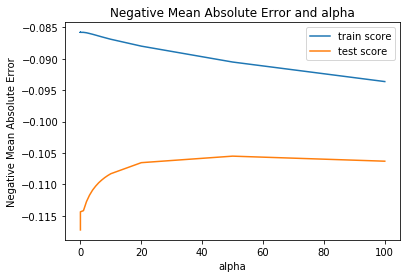

In [246]:
# Plotting mean test and train scores with alpha 

Model_3_results['param_alpha'] = Model_3_results['param_alpha'].astype('int32')

# Plotting

plt.plot(Model_3_results['param_alpha'], Model_3_results['mean_train_score'])
plt.plot(Model_3_results['param_alpha'], Model_3_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [247]:
# Checking the value of optimum alpha

print(Model_3.best_params_)
print(Model_3.best_score_)

{'alpha': 50}
-0.1055109921008445


In [248]:
alpha = 50
ridge_new = Ridge(alpha = alpha)

ridge_new.fit(train_X, train_y)
ridge_new.coef_

array([-8.38828460e-03,  2.01689270e-02,  5.21675313e-02,  1.03091857e-02,
        3.65828286e-04,  6.80517865e-03,  1.19705176e-02,  1.46507815e-02,
        7.84862801e-02,  8.55163900e-02,  1.30883404e-02,  3.57438492e-02,
        1.76409117e-02,  8.13712012e-03,  1.24846892e-02,  7.44819651e-03,
        1.96026791e-02, -1.01198689e-02,  7.09820650e-03, -5.06137866e-02,
       -2.40704718e-02,  2.15358348e-03,  6.73623810e-03,  2.64994835e-02,
       -3.32135540e-02,  4.46974599e-04,  6.22890373e-03,  2.65730911e-04,
       -1.30280980e-02,  3.05298326e-02,  1.25456019e-02,  5.99625099e-03,
       -2.34752576e-03, -1.21088313e-02,  1.84550224e-02, -2.24382244e-02,
       -1.53690648e-02, -2.46250227e-03,  1.35493964e-02,  1.84777253e-02,
       -3.20271217e-02,  1.68883431e-03, -1.68883431e-03,  3.17037512e-03,
       -3.55863276e-03,  3.88257641e-04,  4.06533346e-03, -4.06533346e-03,
       -6.57747860e-04,  1.68044795e-02, -1.08738644e-02, -5.27286726e-03,
       -1.28386098e-02,  

In [249]:
# Lets predict the R-squared value of train data

train_y_predicted = ridge_new.predict(train_X)

print(metrics.r2_score(y_true = train_y, y_pred = train_y_predicted))

0.8755953922044288


In [250]:
# Lets predict the R-squared value of train data

test_y_predicted = ridge_new.predict(test_X)

print(metrics.r2_score(y_true = test_y, y_pred = test_y_predicted))

0.876586273788502


In [251]:
# Ridge model parameters

model_parameters = list(ridge_new.coef_)
model_parameters.insert(0, ridge_new.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = train_X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.946),
 ('LotFrontage', -0.008),
 ('LotArea', 0.02),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.01),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.007),
 ('BsmtUnfSF', 0.012),
 ('TotalBsmtSF', 0.015),
 ('1stFlrSF', 0.078),
 ('2ndFlrSF', 0.086),
 ('LowQualFinSF', 0.013),
 ('GarageArea', 0.036),
 ('WoodDeckSF', 0.018),
 ('OpenPorchSF', 0.008),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.02),
 ('PoolArea', -0.01),
 ('MoSold', 0.007),
 ('House_Age', -0.051),
 ('Remodelled_Age', -0.024),
 ('Garage_Age', 0.002),
 ('Sold_Age', 0.007),
 ('MSSubClass_20', 0.026),
 ('MSSubClass_30', -0.033),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.006),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', -0.013),
 ('MSSubClass_70', 0.031),
 ('MSSubClass_75', 0.013),
 ('MSSubClass_80', 0.006),
 ('MSSubClass_85', -0.002),
 ('MSSubClass_90', -0.012),
 ('MSSubClass_120', 0.018),
 ('MSSubClass_160', -0.022),
 ('MSSubClass_180', -0.015),
 ('MSSubClass_190', -0.002),
 ('MSZoning_Other',

In [252]:
# Pulling out the features and coefficients obtained above

ridge_features = []
ridge_coefficients = []
for i in list(zip(cols, model_parameters)):
    a = i[0]
    b = i[1]
    ridge_features.append(a)
    ridge_coefficients.append(b)

In [253]:
# Creating a dataframe for the above mentioned columns

ridge_features_df = pd.DataFrame({'Ridge_Feature':ridge_features})
ridge_coeff_df = pd.DataFrame({'Ridge_Coeff':ridge_coefficients})
ridge_new_df = pd.concat([ridge_features_df, ridge_coeff_df], axis = 1)
ridge_new_df.head()

Ridge_Feature  Ridge_Coeff
0      constant       11.946
1   LotFrontage       -0.008
2       LotArea        0.020
3   OverallCond        0.052
4    MasVnrArea        0.010

In [254]:
# Sorting the dataframe to find out the top features which affect the target variable

ridge_new_df.sort_values(by = ('Ridge_Coeff'), ascending = False).head(20)

Ridge_Feature  Ridge_Coeff
0            constant       11.946
10           2ndFlrSF        0.086
9            1stFlrSF        0.078
95        BsmtQual_Ex        0.056
3         OverallCond        0.052
174      GarageCars_3        0.047
149   TotRmsAbvGrd_10        0.040
12         GarageArea        0.036
55      BldgType_1Fam        0.035
134    FullBath_3 & 0        0.032
30      MSSubClass_70        0.031
102       BsmtCond_TA        0.030
104   BsmtExposure_Gd        0.029
157  Fireplaces_2 & 3        0.028
128    BsmtFullBath_1        0.028
109  BsmtFinType1_GLQ        0.026
24      MSSubClass_20        0.026
94   Foundation_PConc        0.026
154    Functional_Typ        0.025
148    TotRmsAbvGrd_9        0.025

In [255]:
# Lasso regression

lasso_new = Lasso()

# Cross validation

folds = 5
Model_4 = GridSearchCV(estimator = lasso_new, 
                       param_grid = params, 
                       scoring= 'neg_mean_absolute_error', 
                       cv = folds, 
                       return_train_score=True, 
                       verbose = 1)    

Model_4.fit(train_X, train_y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [256]:
# Cheking the results of our model

Model_4_results = pd.DataFrame(Model_4.cv_results_)
Model_4_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.053598  8.236273e-03         0.000800        0.001600      0.0001   
1       0.030400  8.979323e-03         0.002400        0.001960       0.001   
2       0.012000  2.529714e-03         0.003200        0.001600        0.01   
3       0.012000  2.528810e-03         0.000799        0.001599        0.05   
4       0.007999  7.893059e-07         0.000800        0.001600         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.119397          -0.116009          -0.110792   
1   {'alpha': 0.001}          -0.113518          -0.109989          -0.098702   
2    {'alpha': 0.01}          -0.119585          -0.114622          -0.111302   
3    {'alpha': 0.05}          -0.167894          -0.144556          -0.156246   
4     {'alpha': 0.1}          -0.219386          -0.192131          -0.206311   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.113327          -0.109030        -0.113716        0.003695   
1          -0.112458          -0.104384        -0.107816        0.005543   
2          -0.118865          -0.102311        -0.113343        0.006276   
3          -0.151984          -0.119498        -0.148055        0.016152   
4          -0.199004          -0.157821        -0.194955        0.020640   

   rank_test_score  split0_train_score  split1_train_score  \
0                3           -0.086140           -0.089315   
1                1           -0.089787           -0.092274   
2                2           -0.110334           -0.108738   
3                4           -0.149425           -0.147706   
4                5           -0.196989           -0.191578   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.079235           -0.083871           -0.089412   
1           -0.083950           -0.087325           -0.093844   
2           -0.099899           -0.105178           -0.110419   
3           -0.136391           -0.143882           -0.150662   
4           -0.185378           -0.191248           -0.194562   

   mean_train_score  std_train_score  
0         -0.085595         0.003798  
1         -0.089436         0.003526  
2         -0.106914         0.003988  
3         -0.145613         0.005147  
4         -0.191951         0.003900

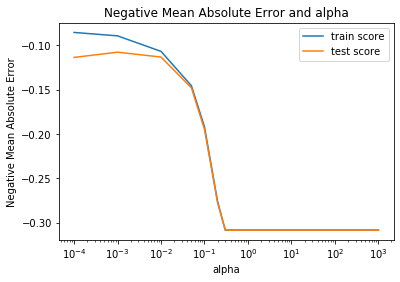

In [257]:
# Plotting mean test and train scores with alpha 

Model_4_results['param_alpha'] = Model_4_results['param_alpha'].astype('float32')

# Plotting

plt.plot(Model_4_results['param_alpha'], Model_4_results['mean_train_score'])
plt.plot(Model_4_results['param_alpha'], Model_4_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xscale('log')
plt.show()

In [258]:
# Checking the value of optimum number of parameters

print(Model_4.best_params_)
print(Model_4.best_score_)

{'alpha': 0.001}
-0.10781587885186507


In [259]:
alpha = 0.001
lasso_new = Lasso(alpha = alpha)

lasso_new.fit(train_X, train_y)
lasso_new.coef_

array([-1.06792218e-02,  2.11718831e-02,  5.61553796e-02,  4.80417899e-03,
       -0.00000000e+00,  6.39304862e-03,  1.42181255e-02,  0.00000000e+00,
        9.62521450e-02,  9.95174197e-02,  1.20764189e-02,  3.18203934e-02,
        1.67220115e-02,  5.17443375e-03,  1.38985009e-02,  6.20926988e-03,
        2.01480329e-02, -9.34675860e-03,  5.88114313e-03, -6.76554186e-02,
       -1.98433147e-02,  9.32303270e-04,  7.44305360e-03,  1.67059556e-02,
       -4.78075418e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -3.55072706e-02,  3.22660712e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  5.09575613e-02, -1.57149974e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.15031339e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.08370522e-02, -0.00000000e+00, -0.00000000e+00,
       -1.89330851e-03,  

In [260]:
# Lets predict the R-squared value of train data

train_y_predicted = lasso_new.predict(train_X)

print(metrics.r2_score(y_true = train_y, y_pred = train_y_predicted))

0.8752286428404247


In [261]:
# Lets predict the R-squared value of train data

test_y_predicted = lasso_new.predict(test_X)

print(metrics.r2_score(y_true = test_y, y_pred = test_y_predicted))

0.878694076072342


In [262]:
# Lasso model parameters

model_parameters = list(lasso_new.coef_)
model_parameters.insert(0, lasso_new.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = train_X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.923),
 ('LotFrontage', -0.011),
 ('LotArea', 0.021),
 ('OverallCond', 0.056),
 ('MasVnrArea', 0.005),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.006),
 ('BsmtUnfSF', 0.014),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.096),
 ('2ndFlrSF', 0.1),
 ('LowQualFinSF', 0.012),
 ('GarageArea', 0.032),
 ('WoodDeckSF', 0.017),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.014),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.02),
 ('PoolArea', -0.009),
 ('MoSold', 0.006),
 ('House_Age', -0.068),
 ('Remodelled_Age', -0.02),
 ('Garage_Age', 0.001),
 ('Sold_Age', 0.007),
 ('MSSubClass_20', 0.017),
 ('MSSubClass_30', -0.048),
 ('MSSubClass_40', -0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', -0.036),
 ('MSSubClass_70', 0.032),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', -0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', 0.051),
 ('MSSubClass_160', -0.016),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', 0.0),
 ('MSZoning_Other', 0.0),
 ('MSZo

In [263]:
# Finding out the number of variables selected by lasso regression

print("Number of non-zero Coefficients {}".format(np.sum(lasso_new.coef_!=0)))

Number of non-zero Coefficients 104


In [264]:
# Pulling out the features and coefficients obtained above

lasso_features = []
lasso_coefficients = []
for i in list(zip(cols, model_parameters)):
    a = i[0]
    b = i[1]
    lasso_features.append(a)
    lasso_coefficients.append(b)

In [265]:
# Creating a dataframe for the above mentioned columns

lasso_features_df = pd.DataFrame({'Lasso_Feature':lasso_features})
lasso_coeff_df = pd.DataFrame({'Lasso_Coeff':lasso_coefficients})
lasso_new_df = pd.concat([lasso_features_df, lasso_coeff_df], axis = 1)
lasso_new_df.head()

Lasso_Feature  Lasso_Coeff
0      constant       11.923
1   LotFrontage       -0.011
2       LotArea        0.021
3   OverallCond        0.056
4    MasVnrArea        0.005

In [266]:
# Sorting the dataframe to find out the top features which affect the target variable

lasso_new_df.sort_values(by = ('Lasso_Coeff'), ascending = False).head(20)

Lasso_Feature  Lasso_Coeff
0             constant       11.923
95         BsmtQual_Ex        0.117
10            2ndFlrSF        0.100
9             1stFlrSF        0.096
55       BldgType_1Fam        0.088
174       GarageCars_3        0.079
3          OverallCond        0.056
149    TotRmsAbvGrd_10        0.053
35      MSSubClass_120        0.051
104    BsmtExposure_Gd        0.050
102        BsmtCond_TA        0.048
128     BsmtFullBath_1        0.045
178   GarageQual_Other        0.038
12          GarageArea        0.032
30       MSSubClass_70        0.032
94    Foundation_PConc        0.028
148     TotRmsAbvGrd_9        0.028
157   Fireplaces_2 & 3        0.026
117   BsmtFinType2_Unf        0.026
162  GarageType_Attchd        0.024

In [267]:
# Creating a dataframe with top common features obtained from ridge and lasso regression
# Sorting the values by Ridge_Coeff

Common_features_3 = pd.concat([ridge_new_df, lasso_new_df], axis = 1)
Common_features_3.sort_values(by = ('Lasso_Coeff'), ascending = False).head(20)

Ridge_Feature  Ridge_Coeff      Lasso_Feature  Lasso_Coeff
0             constant       11.946           constant       11.923
95         BsmtQual_Ex        0.056        BsmtQual_Ex        0.117
10            2ndFlrSF        0.086           2ndFlrSF        0.100
9             1stFlrSF        0.078           1stFlrSF        0.096
55       BldgType_1Fam        0.035      BldgType_1Fam        0.088
174       GarageCars_3        0.047       GarageCars_3        0.079
3          OverallCond        0.052        OverallCond        0.056
149    TotRmsAbvGrd_10        0.040    TotRmsAbvGrd_10        0.053
35      MSSubClass_120        0.018     MSSubClass_120        0.051
104    BsmtExposure_Gd        0.029    BsmtExposure_Gd        0.050
102        BsmtCond_TA        0.030        BsmtCond_TA        0.048
128     BsmtFullBath_1        0.028     BsmtFullBath_1        0.045
178   GarageQual_Other        0.019   GarageQual_Other        0.038
12          GarageArea        0.036         GarageArea        0.032
30       MSSubClass_70        0.031      MSSubClass_70        0.032
94    Foundation_PConc        0.026   Foundation_PConc        0.028
148     TotRmsAbvGrd_9        0.025     TotRmsAbvGrd_9        0.028
157   Fireplaces_2 & 3        0.028   Fireplaces_2 & 3        0.026
117   BsmtFinType2_Unf        0.023   BsmtFinType2_Unf        0.026
162  GarageType_Attchd        0.024  GarageType_Attchd        0.024

**R-squared values obtained for ridge regression:**

- **R-squared value of train data : 0.8755**
- **R-squared value of test data : 0.8765**

**R-squared values obtained for lasso regression:**

- **R-squared value of train data : 0.8752**
- **R-squared value of test data : 0.8786**

**From the above dataframe, the top 5 features which help in predicting the price of the house are:**

1. **BsmtQual_Ex - Evaluates the height of the basement, Excellent (100+ inches)**
2. **2ndFlrSF - Second floor square feet**
3. **1stFlrSF - First Floor square feet**
4. **BldgType_1Fam - Type of dwelling, Single-family Detached**
5. **GarageCars_3 - Size of garage in car capacity, 3**